In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load dataset
error_kc_grade_df = pd.read_csv("./error_kc_grade.csv")
error_kc_grade_df

Student ID  Exercise ID  Feedback #                         Error Label  \
0             1          547           1  Logical, Syntax, Understandability   
1             1          547           2       Understandability, Efficiency   
2             1          568           1          Logical, Understandability   
3             1          568           2          Logical, Understandability   
4             1          568           3                 Logical, Efficiency   
..          ...          ...         ...                                 ...   
366          19          760           1                     Logical, Syntax   
367          19         1949           1                     Logical, Syntax   
368          19         2135           1                     Logical, Syntax   
369          19         2135           2                     Logical, Syntax   
370          19         2171           1                     Logical, Syntax   

                                              KC Label Compiler output  Grade  \
0    Looping Constructs, Using Clear Method And Var...        compiled     25   
1    Using Docstrings and Comments, Testing Code an...        compiled    100   
2     Recursion Concepts, Recursive Formula, Using ...        compiled     60   
3    Recursion Concepts, Testing Code and Validatin...        compiled     30   
4    Recursion Concepts, Recursive Formula, Testing...        compiled     30   
..                                                 ...             ...    ...   
366  String Indexing and Slicing, String Methods, L...        compiled    100   
367  Defining a Class, Initializing and Storing Obj...        compiled     70   
368  Using the time Module, Defining a Class, Insta...           error     40   
369  Using the time Module, Defining a Class, Insta...        compiled    100   
370  Defining a Class, Initializing and Storing Obj...        compiled     95   

     Unnamed: 7 Unnamed: 8  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
..          ...        ...  
366         NaN        NaN  
367         NaN        NaN  
368         NaN        NaN  
369         NaN        NaN  
370         NaN        NaN  

[371 rows x 9 columns]

In [3]:
error_kc_grade_df = error_kc_grade_df.drop(['Unnamed: 7', 'Unnamed: 8'], axis=1)
error_kc_grade_df

Student ID  Exercise ID  Feedback #                         Error Label  \
0             1          547           1  Logical, Syntax, Understandability   
1             1          547           2       Understandability, Efficiency   
2             1          568           1          Logical, Understandability   
3             1          568           2          Logical, Understandability   
4             1          568           3                 Logical, Efficiency   
..          ...          ...         ...                                 ...   
366          19          760           1                     Logical, Syntax   
367          19         1949           1                     Logical, Syntax   
368          19         2135           1                     Logical, Syntax   
369          19         2135           2                     Logical, Syntax   
370          19         2171           1                     Logical, Syntax   

                                              KC Label Compiler output  Grade  
0    Looping Constructs, Using Clear Method And Var...        compiled     25  
1    Using Docstrings and Comments, Testing Code an...        compiled    100  
2     Recursion Concepts, Recursive Formula, Using ...        compiled     60  
3    Recursion Concepts, Testing Code and Validatin...        compiled     30  
4    Recursion Concepts, Recursive Formula, Testing...        compiled     30  
..                                                 ...             ...    ...  
366  String Indexing and Slicing, String Methods, L...        compiled    100  
367  Defining a Class, Initializing and Storing Obj...        compiled     70  
368  Using the time Module, Defining a Class, Insta...           error     40  
369  Using the time Module, Defining a Class, Insta...        compiled    100  
370  Defining a Class, Initializing and Storing Obj...        compiled     95  

[371 rows x 7 columns]

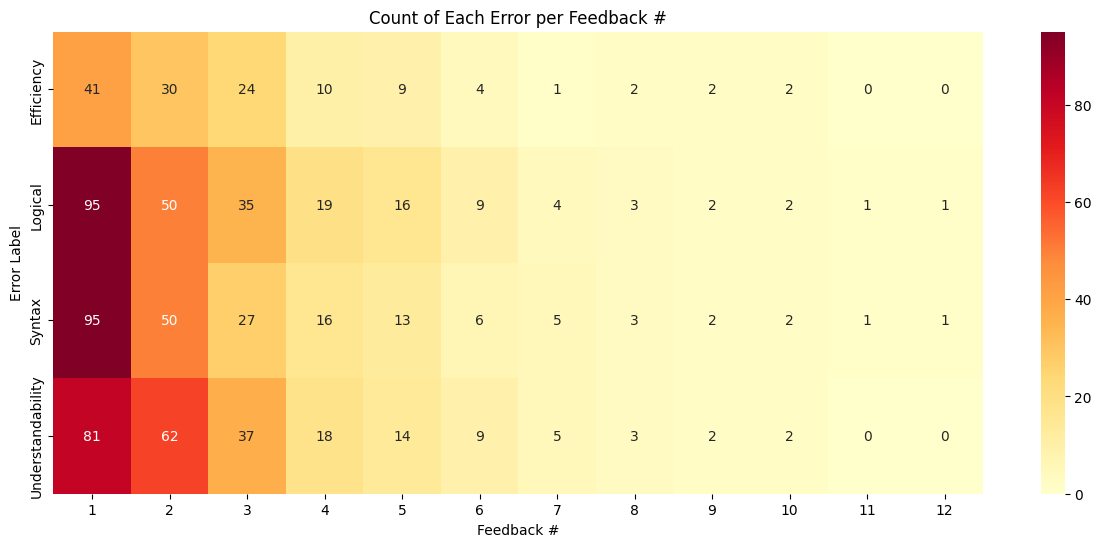

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split multiple Error labels per cell
error_feedback_data = error_kc_grade_df.assign(
    **{"Error Label": error_kc_grade_df["Error Label"].str.split(r"[,;/]")}
).explode("Error Label")

# Strip spaces and normalize case
error_feedback_data["Error Label"] = error_feedback_data["Error Label"].str.strip().str.title()

error_feedback_data = error_feedback_data[error_feedback_data["Error Label"].notna() & (error_feedback_data["Error Label"] != "")]

error_counts = error_feedback_data.groupby(["Error Label", "Feedback #"]).size().unstack(fill_value=0)

plt.figure(figsize=(15,6))
sns.heatmap(error_counts, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Count of Each Error per Feedback #")
plt.ylabel("Error Label")
plt.xlabel("Feedback #")
plt.show()


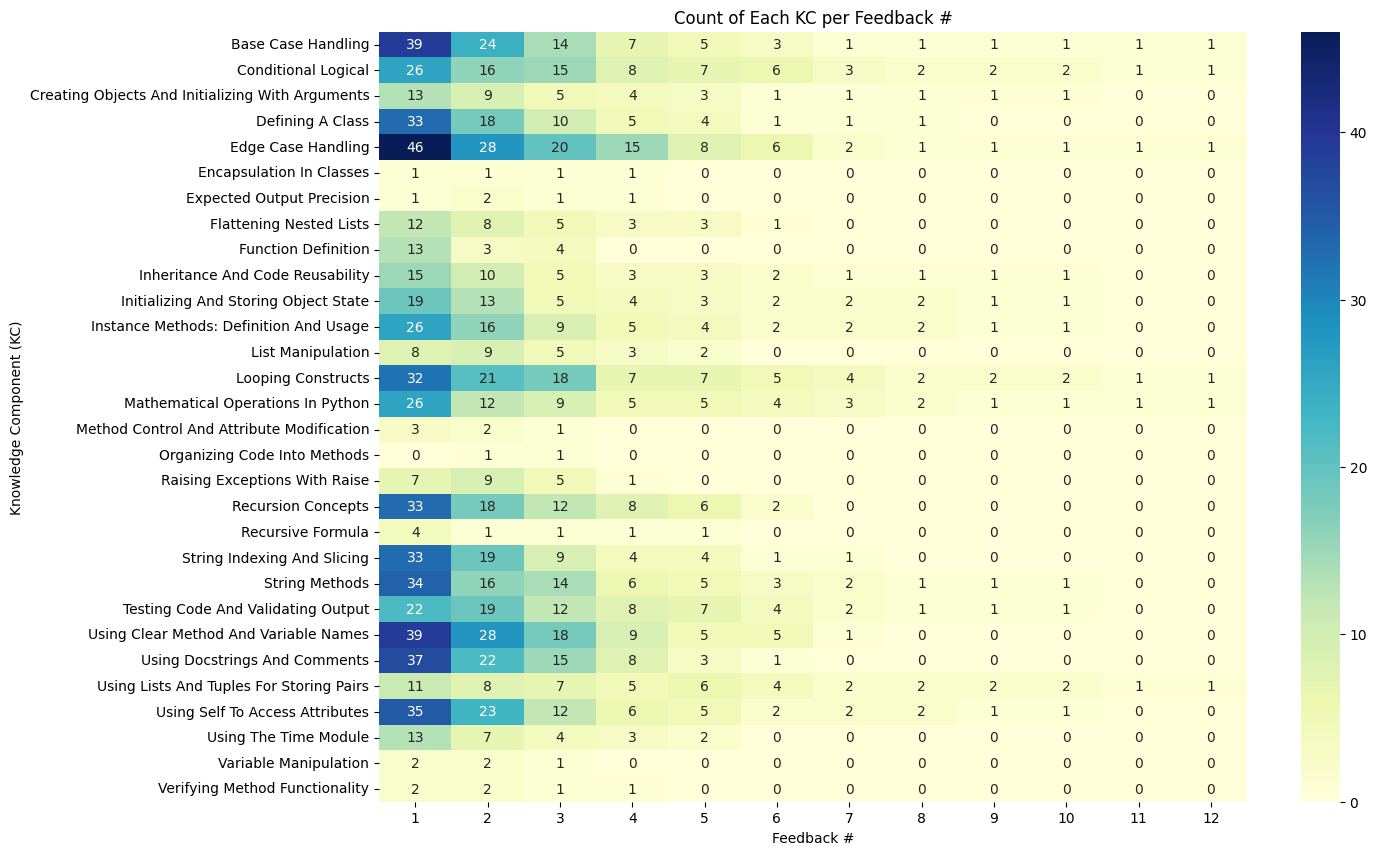

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split multiple KC labels per cell
kc_feedback_data = error_kc_grade_df.assign(
    **{"KC Label": error_kc_grade_df["KC Label"].str.split(r"[,;/]")}
).explode("KC Label")

# Strip spaces and normalize case
kc_feedback_data["KC Label"] = kc_feedback_data["KC Label"].str.strip().str.title()

df_expanded = kc_feedback_data[kc_feedback_data["KC Label"].notna() & (kc_feedback_data["KC Label"] != "")]

kc_counts = df_expanded.groupby(["KC Label", "Feedback #"]).size().unstack(fill_value=0)

plt.figure(figsize=(14,10))
sns.heatmap(kc_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Count of Each KC per Feedback #")
plt.ylabel("Knowledge Component (KC)")
plt.xlabel("Feedback #")
plt.show()


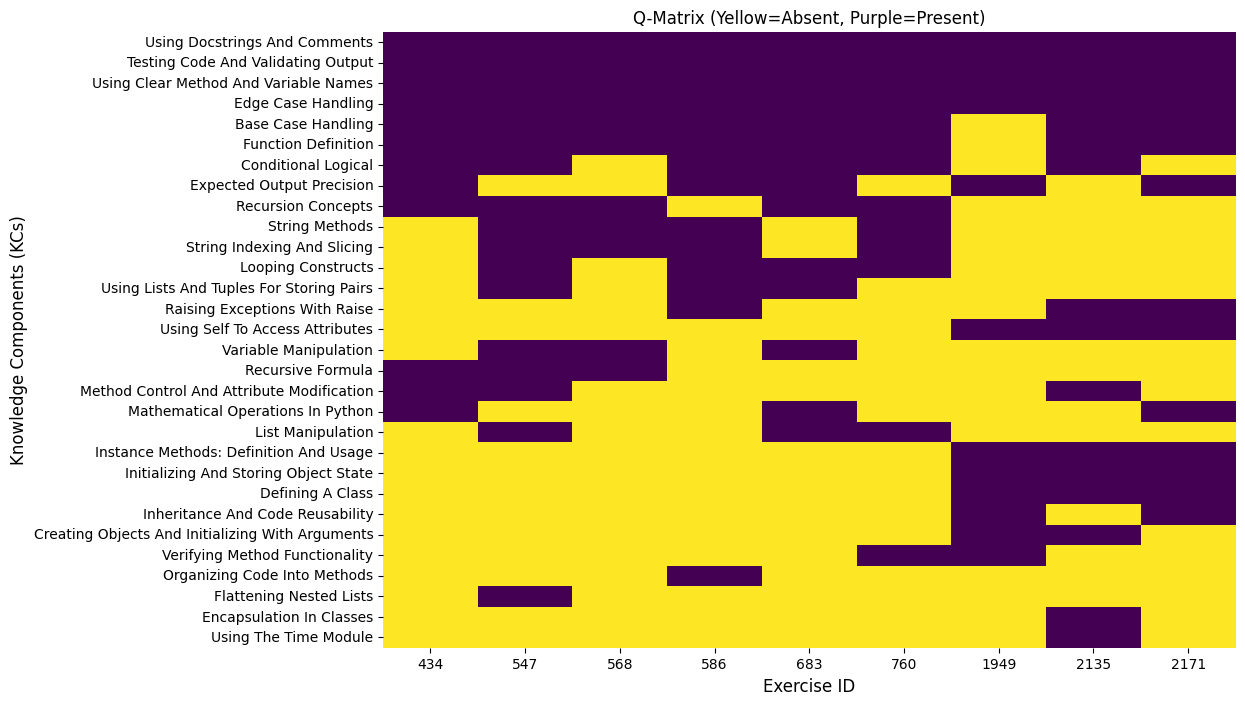

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

exercises = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]
df_filtered = error_kc_grade_df[error_kc_grade_df["Exercise ID"].isin(exercises)]

df_expanded = df_filtered.assign(
    **{"KC Label": df_filtered["KC Label"].str.split(r"[,;/]")}
).explode("KC Label")

df_expanded["KC Label"] = df_expanded["KC Label"].str.strip().str.title()
df_expanded = df_expanded[df_expanded["KC Label"].notna() & (df_expanded["KC Label"] != "")]

q_matrix_counts = (
    df_expanded.groupby(["KC Label", "Exercise ID"])
    .size()
    .unstack(fill_value=0)
)

#  Convert counts to binary (0/1) 
q_matrix_binary = (q_matrix_counts > 0).astype(int)

q_matrix_binary = q_matrix_binary.loc[q_matrix_binary.sum(axis=1).sort_values(ascending=False).index]

cmap = ListedColormap(["#FDE725FF", "#440154FF"])

plt.figure(figsize=(11, 8))
sns.heatmap(
    q_matrix_binary,
    cmap=cmap,
    cbar=False  
)

plt.title("Q-Matrix (Yellow=Absent, Purple=Present)", fontsize=12)
plt.xlabel("Exercise ID", fontsize=12)
plt.ylabel("Knowledge Components (KCs)", fontsize=12)

plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()


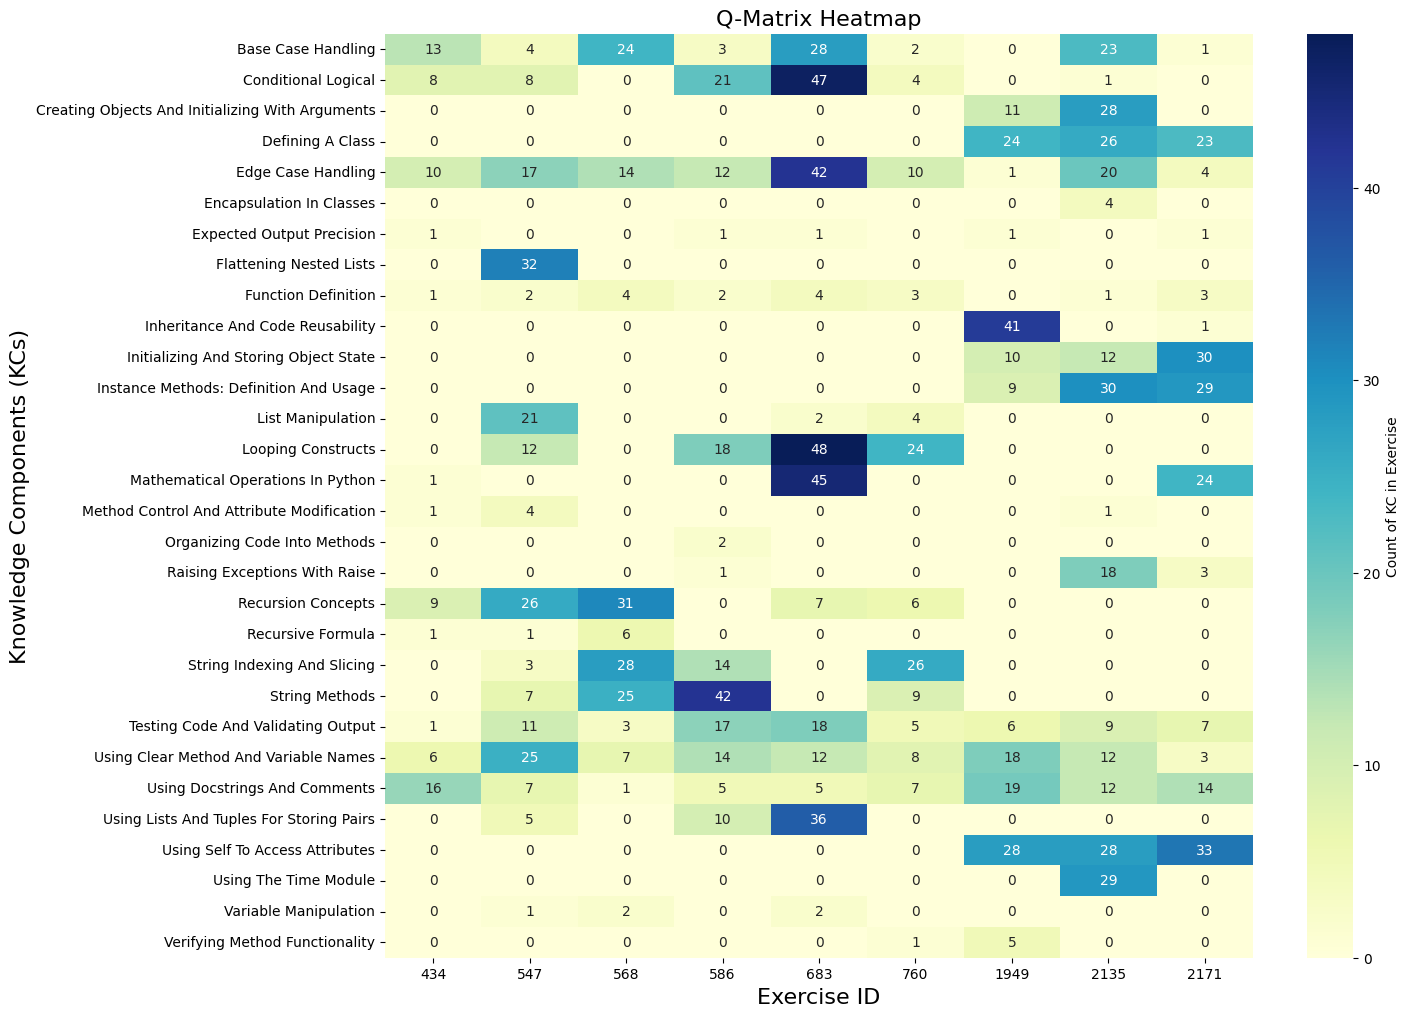

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

exercises = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]
df_filtered = error_kc_grade_df[error_kc_grade_df["Exercise ID"].isin(exercises)]

df_expanded = df_filtered.assign(
    **{"KC Label": df_filtered["KC Label"].str.split(r"[,;/]")}
).explode("KC Label")

df_expanded["KC Label"] = df_expanded["KC Label"].str.strip().str.title()
df_expanded = df_expanded[df_expanded["KC Label"].notna() & (df_expanded["KC Label"] != "")]

q_matrix_counts = (
    df_expanded.groupby(["KC Label", "Exercise ID"])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(14, 12))
sns.heatmap(
    q_matrix_counts,
    annot=True, fmt="d",
    cmap="YlGnBu",
    cbar_kws={'label': 'Count of KC in Exercise'}
)

plt.title("Q-Matrix Heatmap", fontsize=16)
plt.xlabel("Exercise ID", fontsize=16)
plt.ylabel("Knowledge Components (KCs)", fontsize=16)

plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()


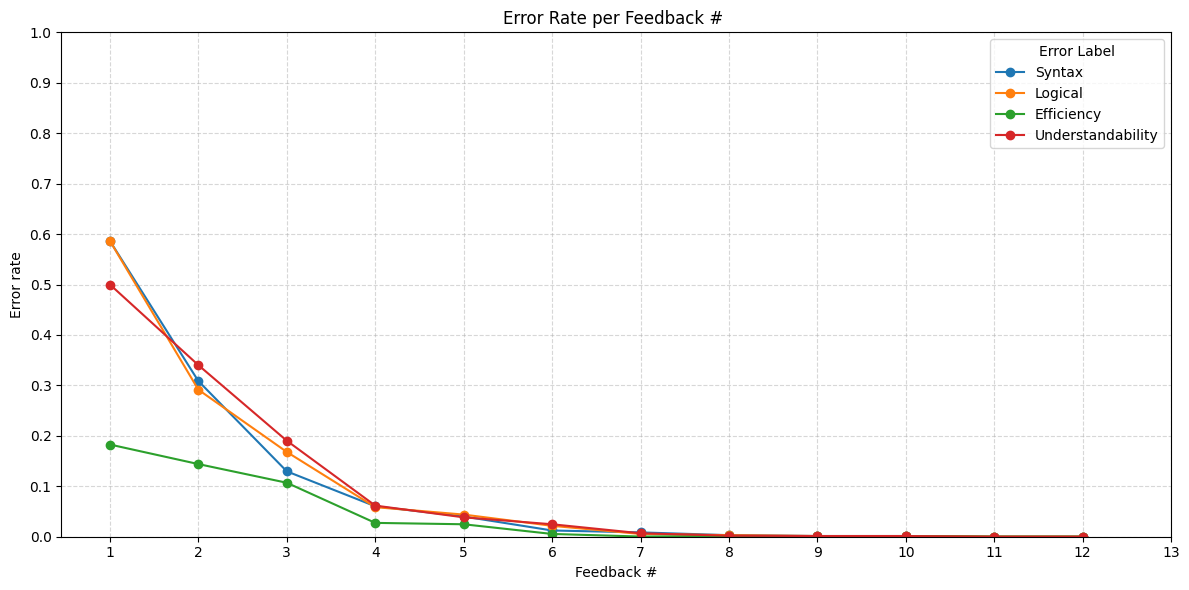

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TOTAL_BASES = {
    "Syntax": 162,
    "Logical": 162,
    "Efficiency": 162,
    "Understandability": 162,
}
N_STUDENTS_BASE = 18  

tmp = error_kc_grade_df.dropna(subset=["Error Label"]).copy()
tmp["Error Label"] = tmp["Error Label"].astype(str).str.split(r"[,;/]")
df = tmp.explode("Error Label", ignore_index=True)

df["Error Label"] = (
    df["Error Label"]
    .astype(str)
    .str.strip()
    .replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "Na": pd.NA}, regex=False)
    .str.title()
)
df = df.dropna(subset=["Error Label"])

df = df[df["Student ID"].astype(str).str.strip() != "18"].copy()

fb_col = "Feedback #"
df[fb_col] = pd.to_numeric(df[fb_col], errors="coerce")
df = df.dropna(subset=[fb_col]).copy()
df[fb_col] = df[fb_col].astype(int)

# Compute per-label metrics
results = {}
for label, total_base in TOTAL_BASES.items():
    lab_df = df[df["Error Label"] == label].copy()
    total_count_by_fb = lab_df.groupby(fb_col).size()
    students_with_error_by_fb = lab_df.groupby(fb_col)["Student ID"].nunique()

    summary = (
        pd.concat(
            {
                f"total_{label.lower()}": total_count_by_fb,
                f"students_with_{label.lower()}": students_with_error_by_fb,
            },
            axis=1,
        )
        .fillna(0)
        .astype(int)
        .sort_index()
    )
    summary[f"score_{label}"] = (
        (summary[f"total_{label.lower()}"] / total_base)
        * (summary[f"students_with_{label.lower()}"] / N_STUDENTS_BASE)
    )
    results[label] = summary

# Combine all summaries (scores only)
all_scores = pd.DataFrame(index=range(1, 13))  
for label, summary in results.items():
    all_scores[f"score_{label}"] = summary[f"score_{label}"].reindex(all_scores.index, fill_value=0)

plt.figure(figsize=(12, 6))
for label in TOTAL_BASES.keys():
    plt.plot(all_scores.index, all_scores[f"score_{label}"], marker="o", label=label)

plt.title("Error Rate per Feedback # ")
plt.xlabel("Feedback #")
plt.ylabel("Error rate")
plt.xticks(np.arange(1, 14, 1))        
plt.yticks(np.arange(0, 1.1, 0.1))     
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Error Label")
plt.tight_layout()
plt.show()

#all_scores.to_csv("all_error_metrics_by_feedback.csv", index=False)
#print("Saved: all_error_metrics_by_feedback.csv")
#print(all_scores.head(12))


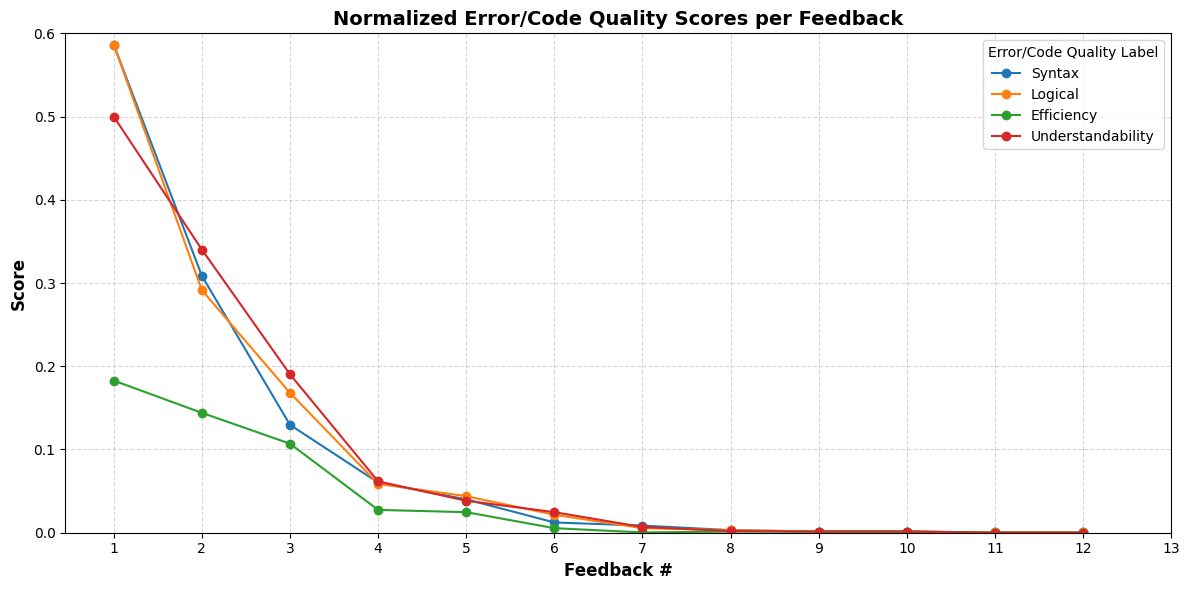

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TOTAL_BASES = {
    "Syntax": 162,
    "Logical": 162,
    "Efficiency": 162,
    "Understandability": 162,
}
N_STUDENTS_BASE = 18

tmp = error_kc_grade_df.dropna(subset=["Error Label"]).copy()
tmp["Error Label"] = tmp["Error Label"].astype(str).str.split(r"[,;/]")
df = tmp.explode("Error Label", ignore_index=True)

df["Error Label"] = (
    df["Error Label"]
    .astype(str)
    .str.strip()
    .replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "Na": pd.NA}, regex=False)
    .str.title()
)
df = df.dropna(subset=["Error Label"])

df = df[df["Student ID"].astype(str).str.strip() != "18"].copy()

fb_col = "Feedback #"
df[fb_col] = pd.to_numeric(df[fb_col], errors="coerce")
df = df.dropna(subset=[fb_col]).copy()
df[fb_col] = df[fb_col].astype(int)

results = {}
for label, total_base in TOTAL_BASES.items():
    lab_df = df[df["Error Label"] == label].copy()
    total_count_by_fb = lab_df.groupby(fb_col).size()
    students_with_error_by_fb = lab_df.groupby(fb_col)["Student ID"].nunique()

    summary = (
        pd.concat(
            {
                f"total_{label.lower()}": total_count_by_fb,
                f"students_with_{label.lower()}": students_with_error_by_fb,
            },
            axis=1,
        )
        .fillna(0)
        .astype(int)
        .sort_index()
    )
    summary[f"score_{label}"] = (
        (summary[f"total_{label.lower()}"] / total_base)
        * (summary[f"students_with_{label.lower()}"] / N_STUDENTS_BASE)
    )
    results[label] = summary

all_scores = pd.DataFrame(index=range(1, 13)) 
for label, summary in results.items():
    all_scores[f"score_{label}"] = summary[f"score_{label}"].reindex(all_scores.index, fill_value=0)

plt.figure(figsize=(12, 6))
for label in TOTAL_BASES.keys():
    plt.plot(all_scores.index, all_scores[f"score_{label}"], marker="o", label=label)
plt.title("Normalized Error/Code Quality Scores per Feedback", fontsize=14, fontweight="bold")
plt.xlabel("Feedback #", fontsize=12, fontweight="bold")
plt.ylabel("Score", fontsize=12, fontweight="bold")
plt.xticks(np.arange(1, 14, 1))        
plt.yticks(np.arange(0, 1.1, 0.1))     
plt.ylim(0, 0.6)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Error/Code Quality Label")
plt.tight_layout()
plt.show()

#all_scores.to_csv("all_error_metrics_by_feedback.csv", index=False)
#print("Saved: all_error_metrics_by_feedback.csv")
#print(all_scores.head(12))

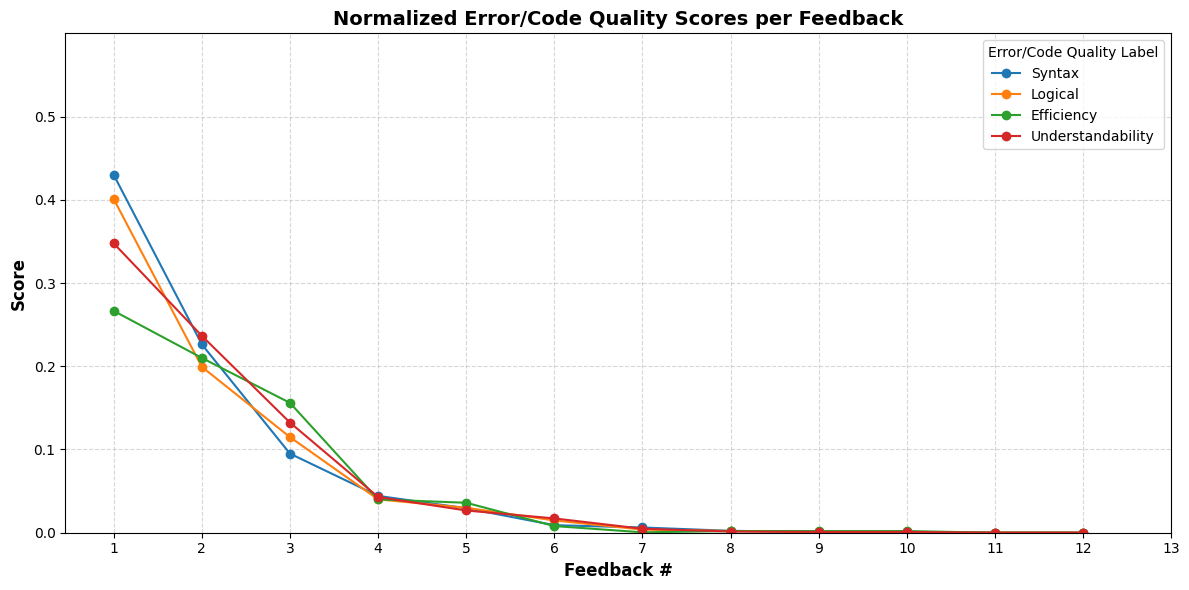

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tmp = error_kc_grade_df.dropna(subset=["Error Label"]).copy()
tmp["Error Label"] = tmp["Error Label"].astype(str).str.split(r"[,;/]")
df = tmp.explode("Error Label", ignore_index=True)

df["Error Label"] = (
    df["Error Label"]
    .astype(str)
    .str.strip()
    .replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "Na": pd.NA}, regex=False)
    .str.title()
)
df = df.dropna(subset=["Error Label"])

df = df[df["Student ID"].astype(str).str.strip() != "18"].copy()

fb_col = "Feedback #"
df[fb_col] = pd.to_numeric(df[fb_col], errors="coerce")
df = df.dropna(subset=[fb_col]).copy()
df[fb_col] = df[fb_col].astype(int)

# Compute normalized scores
results = {}
labels = ["Syntax", "Logical", "Efficiency", "Understandability"]

for label in labels:
    lab_df = df[df["Error Label"] == label].copy()
    total_count_by_fb = lab_df.groupby(fb_col).size()                  
    students_with_error_by_fb = lab_df.groupby(fb_col)["Student ID"].nunique()  

    E = total_count_by_fb.sum()                   
    S = lab_df["Student ID"].nunique()            

    summary = (
        pd.concat(
            {
                f"total_{label.lower()}": total_count_by_fb,
                f"students_with_{label.lower()}": students_with_error_by_fb,
            },
            axis=1,
        )
        .fillna(0)
        .astype(int)
        .sort_index()
    )

    if E > 0 and S > 0:
        summary[f"score_{label}"] = (
            (summary[f"total_{label.lower()}"] / E)
            * (summary[f"students_with_{label.lower()}"] / S)
        )
    else:
        summary[f"score_{label}"] = 0

    results[label] = summary

# Combine into one df
all_scores = pd.DataFrame(index=range(1, 13))
for label, summary in results.items():
    all_scores[f"score_{label}"] = summary[f"score_{label}"].reindex(all_scores.index, fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
for label in labels:
    plt.plot(all_scores.index, all_scores[f"score_{label}"], marker="o", label=label)

plt.title("Normalized Error/Code Quality Scores per Feedback", fontsize=14, fontweight="bold")
plt.xlabel("Feedback #", fontsize=12, fontweight="bold")
plt.ylabel("Score", fontsize=12, fontweight="bold")
plt.xticks(np.arange(1, 14, 1))
plt.yticks(np.arange(0, 0.6, 0.1))
plt.ylim(0, 0.6)   
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Error/Code Quality Label")
plt.tight_layout()
plt.show()


all_scores.to_csv("all_error_metrics_by_feedback2.csv", index=False)
# print("Saved: all_error_metrics_by_feedback.csv")
# print(all_scores.head(12))


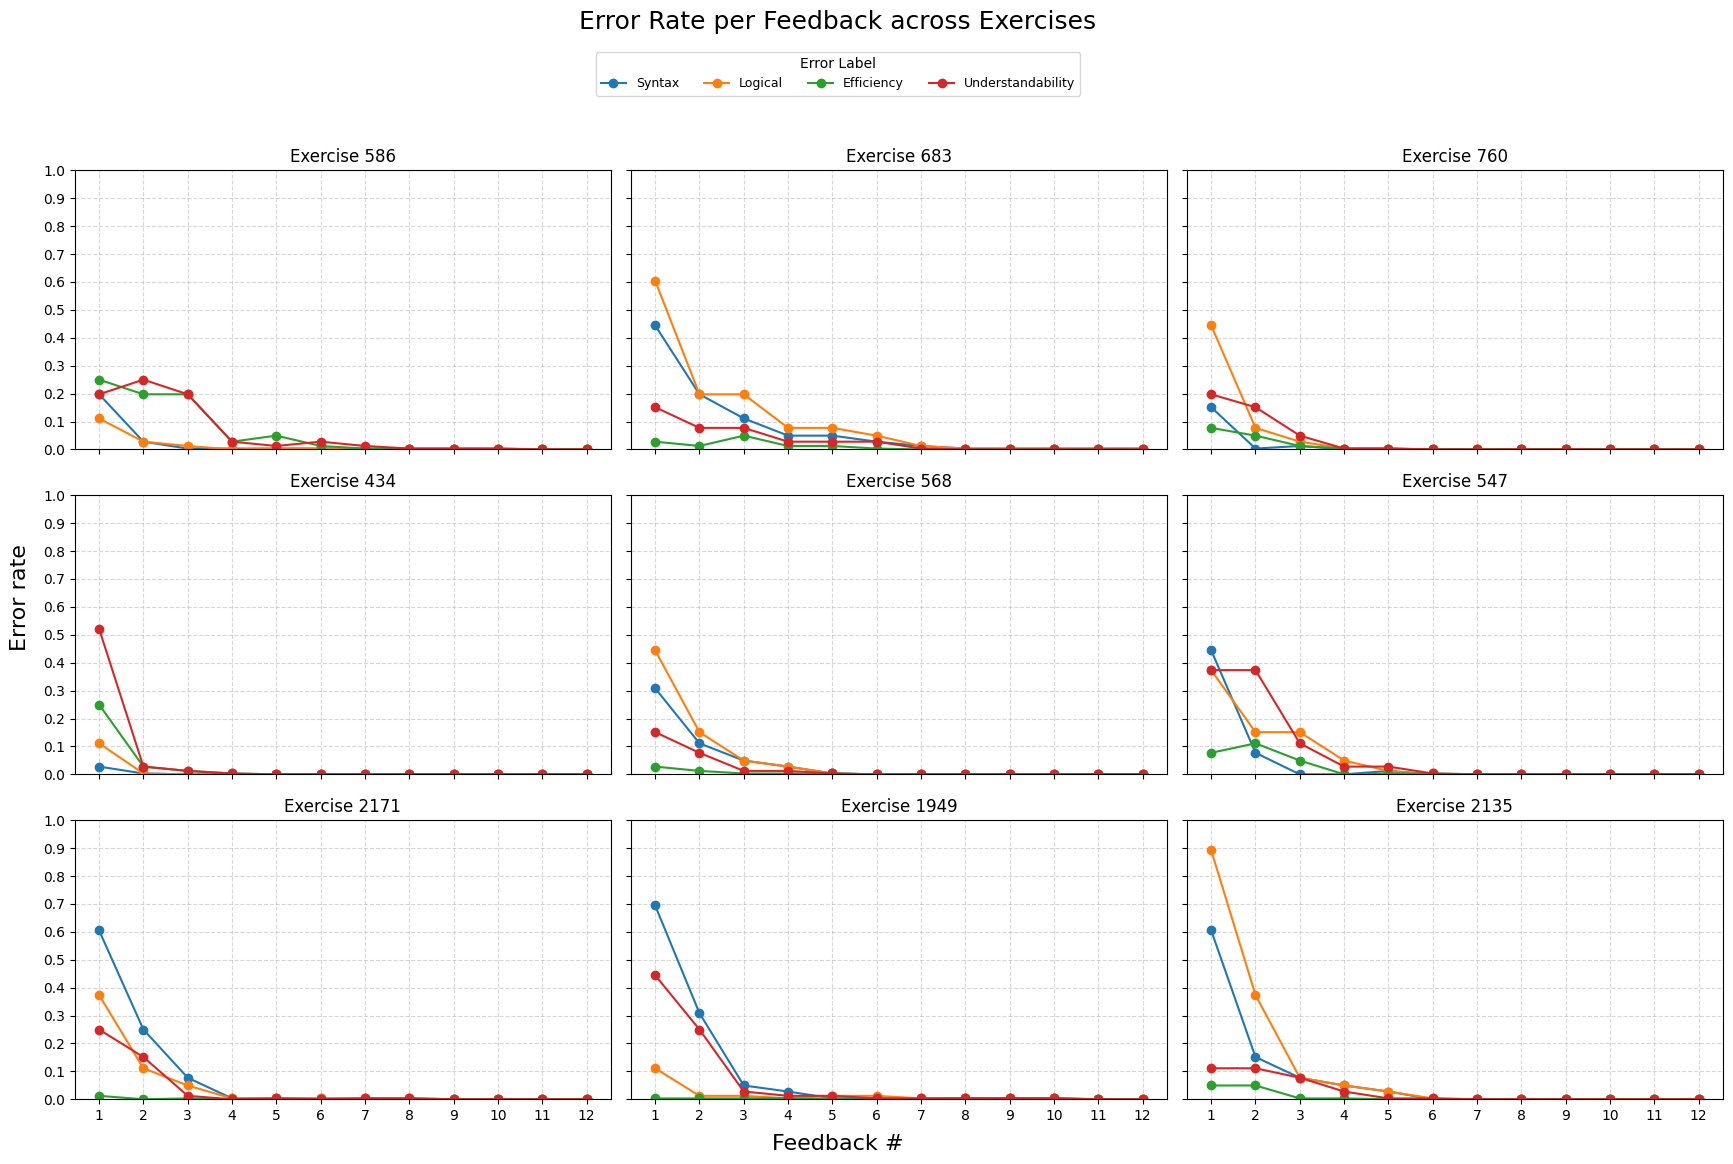

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

EXERCISE_COL = "Exercise ID"
FB_COL       = "Feedback #"
STUDENT_COL  = "Student ID"
LABEL_COL    = "Error Label"

TOTAL_BASES = {
    "Syntax": 18,
    "Logical": 18,
    "Efficiency": 18,
    "Understandability": 18,
}
N_STUDENTS_BASE = 18   

tmp = error_kc_grade_df.dropna(subset=[LABEL_COL]).copy()
tmp[LABEL_COL] = tmp[LABEL_COL].astype(str).str.split(r"[,;/]")

df = tmp.explode(LABEL_COL, ignore_index=True)
df[LABEL_COL] = (
    df[LABEL_COL]
    .astype(str)
    .str.strip()
    .replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "Na": pd.NA}, regex=False)
    .str.title()
)
df = df.dropna(subset=[LABEL_COL])

df = df[df[STUDENT_COL].astype(str).str.strip() != "18"].copy()

df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce")
df = df.dropna(subset=[FB_COL]).copy()
df[FB_COL] = df[FB_COL].astype(int)

# Helper function
def compute_scores(sub_df: pd.DataFrame) -> pd.DataFrame:
    all_scores = pd.DataFrame(index=range(1, 13))
    for label, total_base in TOTAL_BASES.items():
        lab_df = sub_df[sub_df[LABEL_COL] == label]
        total_count_by_fb = lab_df.groupby(FB_COL).size()
        students_with_error_by_fb = lab_df.groupby(FB_COL)[STUDENT_COL].nunique()

        summary = (
            pd.concat(
                {
                    f"total_{label.lower()}": total_count_by_fb,
                    f"students_with_{label.lower()}": students_with_error_by_fb,
                },
                axis=1,
            )
            .fillna(0)
            .astype(int)
        )
        all_scores[f"score_{label}"] = (
            (summary[f"total_{label.lower()}"] / float(total_base))
            * (summary[f"students_with_{label.lower()}"] / float(N_STUDENTS_BASE))
        ).reindex(all_scores.index, fill_value=0)
    return all_scores



# exercise order
exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, ex_id in enumerate(exercise_order):  
    sub = df[df[EXERCISE_COL] == ex_id].copy()
    scores = compute_scores(sub)
    for label in TOTAL_BASES.keys():
        ax.plot(
            scores.index,
            scores[f"score_{label}"],
            marker="o",
            label=label,
        )
    ax.set_title(f"Exercise {ex_id}")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_ylim(0, 0.6)

for ax in axes:
    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_yticks(np.arange(0, 1.1, 0.1))

TITLE = "Error Rate per Feedback across Exercises"
fig.suptitle(TITLE, fontsize=18, y=0.99)     

fig.text(0.5, 0.04, "Feedback #", ha="center", fontsize=16)
fig.text(0.04, 0.5, "Error rate", va="center", rotation="vertical", fontsize=16)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Error Label",
    loc="upper center",
    bbox_to_anchor=(0.5, 0.96),  
    ncol=len(TOTAL_BASES),
    fontsize=9
)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.92])
plt.show()


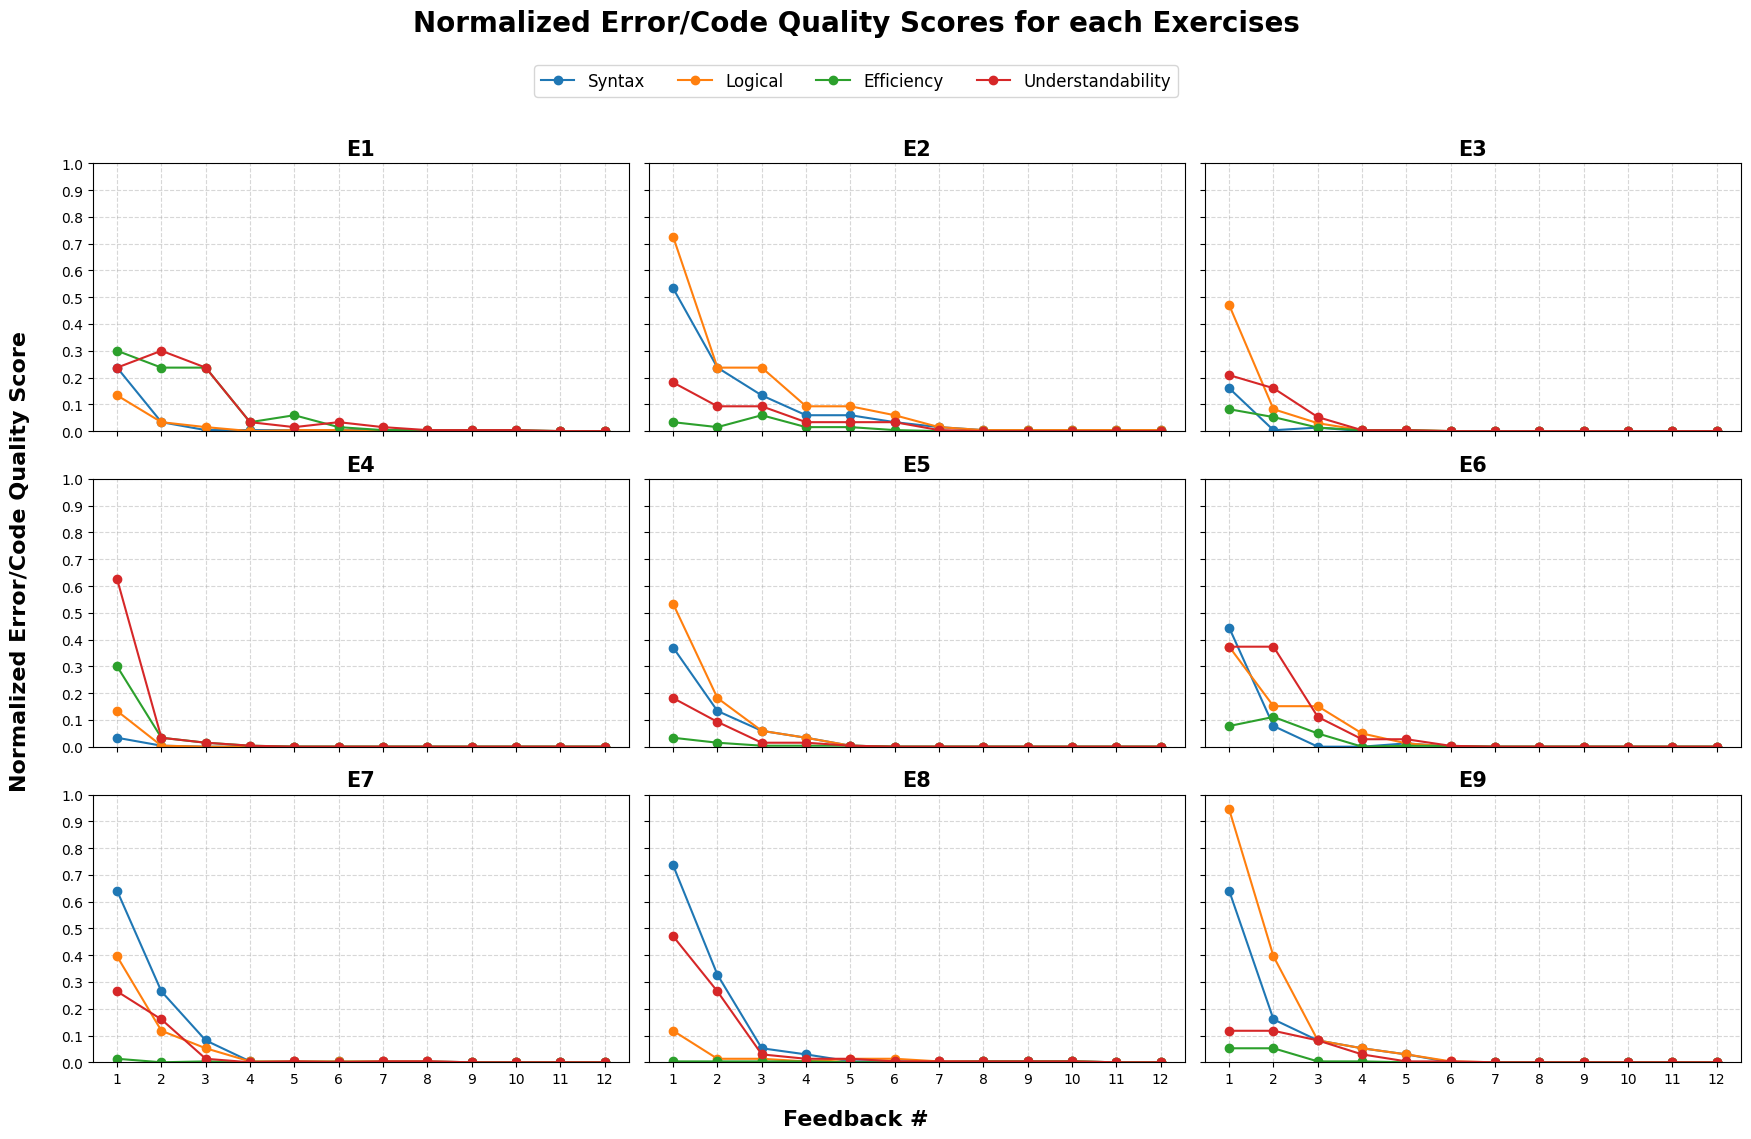

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

EXERCISE_COL = "Exercise ID"
FB_COL       = "Feedback #"
STUDENT_COL  = "Student ID"
LABEL_COL    = "Error Label"

TOTAL_BASES = {
    "Syntax": 18,
    "Logical": 18,
    "Efficiency": 18,
    "Understandability": 18,
}

tmp = error_kc_grade_df.dropna(subset=[LABEL_COL]).copy()
tmp[LABEL_COL] = tmp[LABEL_COL].astype(str).str.split(r"[,;/]")

df = tmp.explode(LABEL_COL, ignore_index=True)
df[LABEL_COL] = (
    df[LABEL_COL]
    .astype(str)
    .str.strip()
    .replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "Na": pd.NA}, regex=False)
    .str.title()
)
df = df.dropna(subset=[LABEL_COL])

df = df[df[STUDENT_COL].astype(str).str.strip() != "18"].copy()

df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce")
df = df.dropna(subset=[FB_COL]).copy()
df[FB_COL] = df[FB_COL].astype(int)


# Helper function
def compute_scores(sub_df: pd.DataFrame) -> pd.DataFrame:
    all_scores = pd.DataFrame(index=range(1, 13))
    n_students = sub_df[STUDENT_COL].nunique() or 1  
    for label, total_base in TOTAL_BASES.items():
        lab_df = sub_df[sub_df[LABEL_COL] == label]
        total_count_by_fb = lab_df.groupby(FB_COL).size()
        students_with_error_by_fb = lab_df.groupby(FB_COL)[STUDENT_COL].nunique()

        summary = (
            pd.concat(
                {
                    f"total_{label.lower()}": total_count_by_fb,
                    f"students_with_{label.lower()}": students_with_error_by_fb,
                },
                axis=1,
            )
            .fillna(0)
            .astype(int)
        )
        all_scores[f"score_{label}"] = (
            (summary[f"total_{label.lower()}"] / float(total_base))
            * (summary[f"students_with_{label.lower()}"] / float(n_students))
        ).reindex(all_scores.index, fill_value=0)
    return all_scores


# exercise mapping
exercise_mapping = {
    586: "E1",
    683: "E2",
    760: "E3",
    434: "E4",
    568: "E5",
    547: "E6",
    2171: "E7",
    1949: "E8",
    2135: "E9",
}

exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, ex_id in enumerate(exercise_order):
    ax = axes[i]
    sub = df[df[EXERCISE_COL] == ex_id].copy()
    scores = compute_scores(sub)
    for label in TOTAL_BASES.keys():
        ax.plot(
            scores.index,
            scores[f"score_{label}"],
            marker="o",
            label=label,
        )
    
    ax.set_title(exercise_mapping[ex_id], fontsize=15, fontweight="bold")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_ylim(0, 0.6)

    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_yticks(np.arange(0, 1.1, 0.1))


fig.suptitle(
    "Normalized Error/Code Quality Scores for each Exercises",
    fontsize=20,
    fontweight="bold",
    y=0.96,
    x=0.5,
)

fig.text(0.5, 0.03, "Feedback #", ha="center", fontsize=16, fontweight="bold")
fig.text(0.03, 0.5, "Normalized Error/Code Quality Score",
         va="center", rotation="vertical", fontsize=16, fontweight="bold")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.92),
    ncol=len(TOTAL_BASES),
    fontsize=12,
    #title="Label",
    #title_fontsize=13,
)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.9])
plt.show()




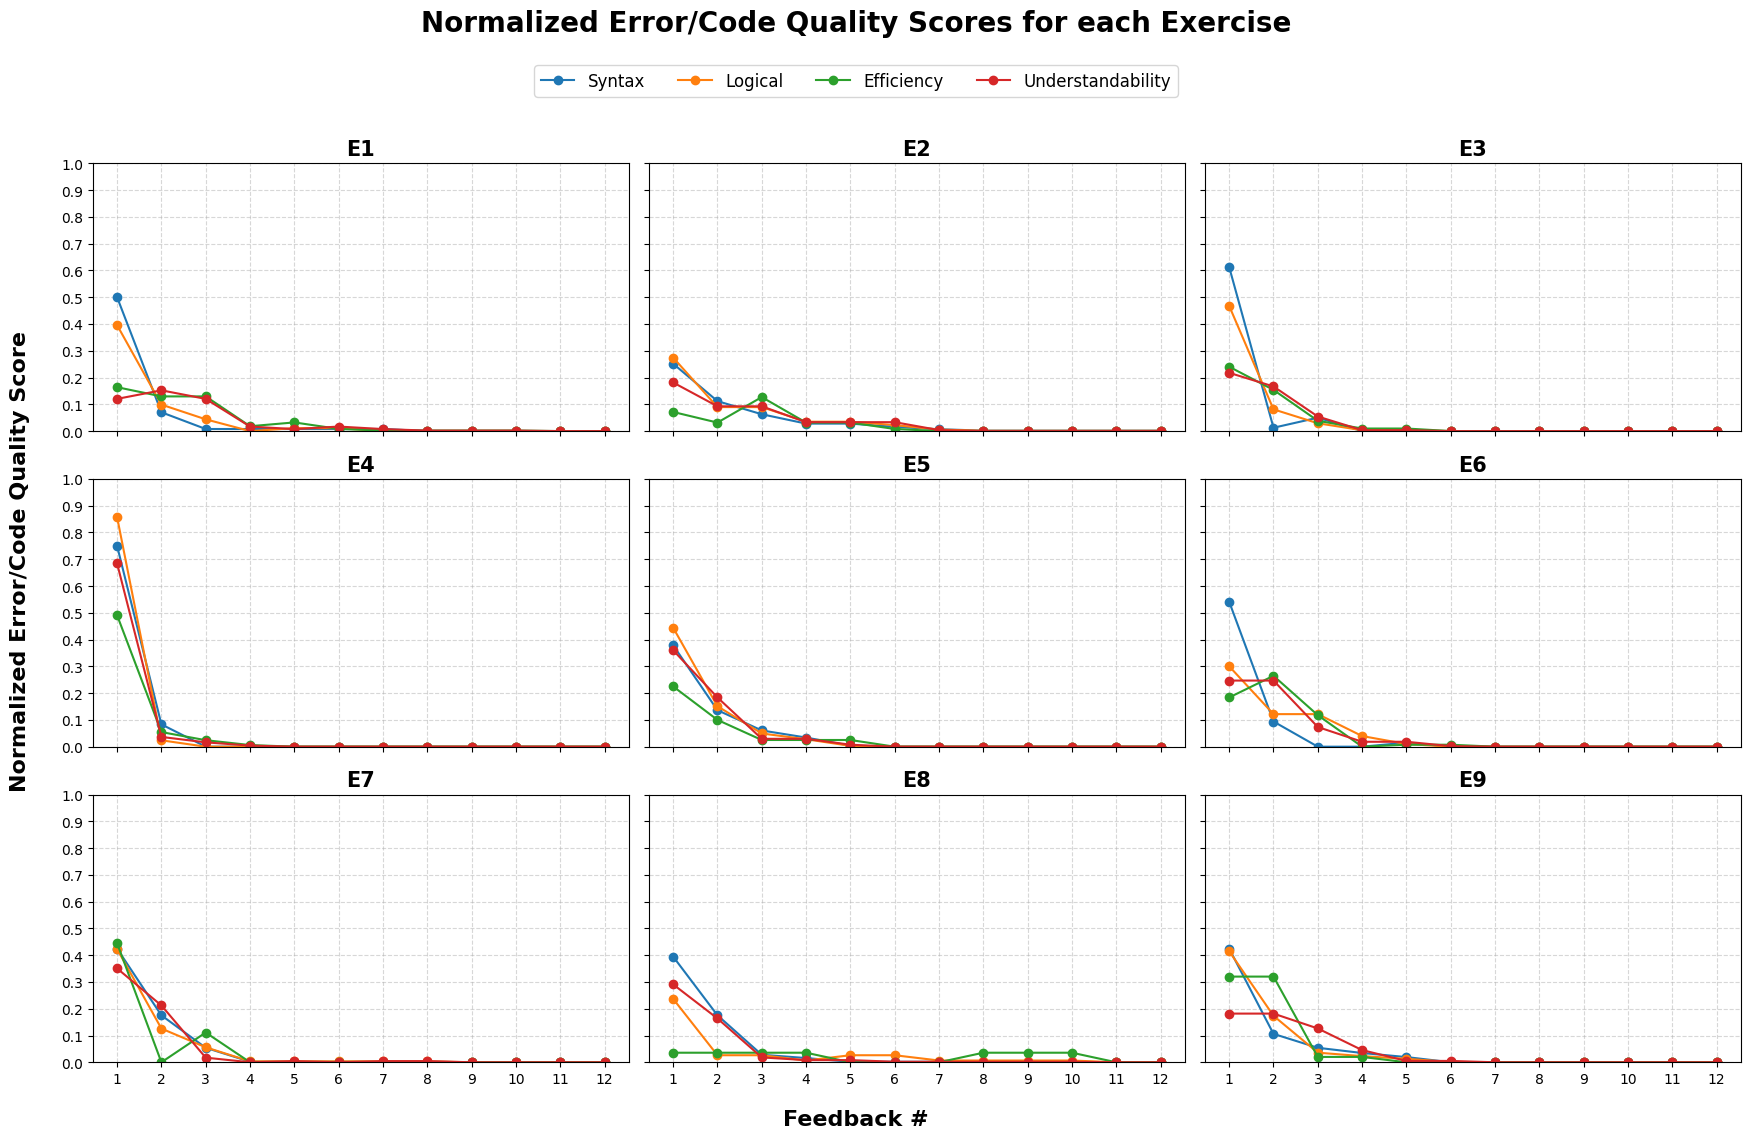

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

EXERCISE_COL = "Exercise ID"
FB_COL       = "Feedback #"
STUDENT_COL  = "Student ID"
LABEL_COL    = "Error Label"

tmp = error_kc_grade_df.dropna(subset=[LABEL_COL]).copy()
tmp[LABEL_COL] = tmp[LABEL_COL].astype(str).str.split(r"[,;/]")

df = tmp.explode(LABEL_COL, ignore_index=True)
df[LABEL_COL] = (
    df[LABEL_COL]
    .astype(str)
    .str.strip()
    .replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "Na": pd.NA}, regex=False)
    .str.title()
)
df = df.dropna(subset=[LABEL_COL])

# remove student 18 (no data)
df = df[df[STUDENT_COL].astype(str).str.strip() != "18"].copy()

df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce")
df = df.dropna(subset=[FB_COL]).copy()
df[FB_COL] = df[FB_COL].astype(int)


# Helper function
def compute_scores(sub_df: pd.DataFrame) -> pd.DataFrame:
    all_scores = pd.DataFrame(index=range(1, 13))
    labels = ["Syntax", "Logical", "Efficiency", "Understandability"]

    for label in labels:
        lab_df = sub_df[sub_df[LABEL_COL] == label]
        total_count_by_fb = lab_df.groupby(FB_COL).size()                       
        students_with_error_by_fb = lab_df.groupby(FB_COL)[STUDENT_COL].nunique() 

        E = total_count_by_fb.sum()           
        S = lab_df[STUDENT_COL].nunique()     

        summary = (
            pd.concat(
                {
                    f"total_{label.lower()}": total_count_by_fb,
                    f"students_with_{label.lower()}": students_with_error_by_fb,
                },
                axis=1,
            )
            .fillna(0)
            .astype(int)
        )

        if E > 0 and S > 0:
            all_scores[f"score_{label}"] = (
                (summary[f"total_{label.lower()}"] / E)
                * (summary[f"students_with_{label.lower()}"] / S)
            ).reindex(all_scores.index, fill_value=0)
        else:
            all_scores[f"score_{label}"] = 0

    return all_scores


# exercise mapping
exercise_mapping = {
    586: "E1",
    683: "E2",
    760: "E3",
    434: "E4",
    568: "E5",
    547: "E6",
    2171: "E7",
    1949: "E8",
    2135: "E9",
}

exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, ex_id in enumerate(exercise_order):
    ax = axes[i]
    sub = df[df[EXERCISE_COL] == ex_id].copy()
    scores = compute_scores(sub)

    for label in ["Syntax", "Logical", "Efficiency", "Understandability"]:
        ax.plot(
            scores.index,
            scores[f"score_{label}"],
            marker="o",
            label=label,
        )
    
    ax.set_title(exercise_mapping[ex_id], fontsize=15, fontweight="bold")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_ylim(0, 1.0)  

    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_yticks(np.arange(0, 1.1, 0.1))


fig.suptitle(
    "Normalized Error/Code Quality Scores for each Exercise",
    fontsize=20,
    fontweight="bold",
    y=0.96,
    x=0.5,
)

fig.text(0.5, 0.03, "Feedback #", ha="center", fontsize=16, fontweight="bold")
fig.text(0.03, 0.5, "Normalized Error/Code Quality Score",
         va="center", rotation="vertical", fontsize=16, fontweight="bold")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.92),
    ncol=4,
    fontsize=12,
)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.9])
plt.show()


In [ ]:
import pandas as pd
import numpy as np


EXERCISE_COL = "Exercise ID"
FB_COL       = "Feedback #"
STUDENT_COL  = "Student ID"
LABEL_COL    = "Error Label"

LABELS = ["Syntax", "Logical", "Efficiency", "Understandability"]

exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

tmp = error_kc_grade_df.dropna(subset=[LABEL_COL]).copy()
tmp[LABEL_COL] = tmp[LABEL_COL].astype(str).str.split(r"[,;/]")

df = tmp.explode(LABEL_COL, ignore_index=True)
df[LABEL_COL] = (
    df[LABEL_COL]
    .astype(str)
    .str.strip()
    .replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "Na": pd.NA}, regex=False)
    .str.title()
)
df = df.dropna(subset=[LABEL_COL])

df = df[df[STUDENT_COL].astype(str).str.strip() != "18"].copy()

df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce")
df = df.dropna(subset=[FB_COL]).copy()
df[FB_COL] = df[FB_COL].astype(int)

df = df[df[LABEL_COL].isin(LABELS)].copy()

# Build df, per Exercise-ordered
full_index = pd.MultiIndex.from_product(
    [exercise_order, range(1, 13)],
    names=[EXERCISE_COL, FB_COL]
)

# Counts per Exercise × Feedback # × Label
counts = (
    df.groupby([EXERCISE_COL, FB_COL, LABEL_COL])
      .size()
      .unstack(LABEL_COL)
      .reindex(columns=LABELS, fill_value=0)
      .reindex(full_index, fill_value=0)
)


counts.columns = [f"Error Label ({lab})" for lab in LABELS]

# Number of unique students per Exercise × Feedback × Label
students_per_label = (
    df.groupby([EXERCISE_COL, FB_COL, LABEL_COL])[STUDENT_COL]
      .nunique()
      .unstack(LABEL_COL)
      .reindex(columns=LABELS, fill_value=0)
      .reindex(full_index, fill_value=0)
)
students_per_label.columns = [f"Students with {lab} error" for lab in LABELS]

# Total number of errors across all 4 error labels
total_errors = counts.sum(axis=1).rename("number of total errors")

error_summary_by_exercise = (
    pd.concat([counts, students_per_label, total_errors], axis=1)
      .reset_index()
      .rename(columns={FB_COL: "Feedback #"})
)

error_summary_by_exercise[EXERCISE_COL] = pd.Categorical(
    error_summary_by_exercise[EXERCISE_COL],
    categories=exercise_order,
    ordered=True
)

# sort by exercise order, then Feedback #
error_summary_by_exercise = error_summary_by_exercise.sort_values(
    [EXERCISE_COL, "Feedback #"]
).reset_index(drop=True)

# print(error_summary_by_exercise.head(30))


In [10]:
error_summary_by_exercise

Exercise ID  Feedback #  Error Label (Syntax)  Error Label (Logical)  \
0           586           1                   8.0                    6.0   
1           586           2                   3.0                    3.0   
2           586           3                   1.0                    2.0   
3           586           4                   1.0                    NaN   
4           586           5                   1.0                    1.0   
..          ...         ...                   ...                    ...   
103        2135           8                   0.0                    0.0   
104        2135           9                   0.0                    0.0   
105        2135          10                   0.0                    0.0   
106        2135          11                   0.0                    0.0   
107        2135          12                   0.0                    0.0   

     Error Label (Efficiency)  Error Label (Understandability)  \
0                         9.0                              8.0   
1                         8.0                              9.0   
2                         8.0                              8.0   
3                         3.0                              3.0   
4                         4.0                              2.0   
..                        ...                              ...   
103                       0.0                              0.0   
104                       0.0                              0.0   
105                       0.0                              0.0   
106                       0.0                              0.0   
107                       0.0                              0.0   

     Students with Syntax error  Students with Logical error  \
0                           8.0                          6.0   
1                           3.0                          3.0   
2                           1.0                          2.0   
3                           1.0                          NaN   
4                           1.0                          1.0   
..                          ...                          ...   
103                         0.0                          0.0   
104                         0.0                          0.0   
105                         0.0                          0.0   
106                         0.0                          0.0   
107                         0.0                          0.0   

     Students with Efficiency error  Students with Understandability error  \
0                               9.0                                    8.0   
1                               8.0                                    9.0   
2                               8.0                                    8.0   
3                               3.0                                    3.0   
4                               4.0                                    2.0   
..                              ...                                    ...   
103                             0.0                                    0.0   
104                             0.0                                    0.0   
105                             0.0                                    0.0   
106                             0.0                                    0.0   
107                             0.0                                    0.0   

     number of total errors  
0                      31.0  
1                      23.0  
2                      19.0  
3                       7.0  
4                       8.0  
..                      ...  
103                     0.0  
104                     0.0  
105                     0.0  
106                     0.0  
107                     0.0  

[108 rows x 11 columns]

In [ ]:
import pandas as pd
import numpy as np

EXERCISE_COL = "Exercise ID"
FB_COL       = "Feedback #"
STUDENT_COL  = "Student ID"
LABEL_COL    = "Error Label"

LABELS = ["Syntax", "Logical", "Efficiency", "Understandability"]
exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

ERROR_BASE   = 18.0
STUDENT_BASE = 18.0

tmp = error_kc_grade_df.dropna(subset=[LABEL_COL]).copy()
tmp[LABEL_COL] = tmp[LABEL_COL].astype(str).str.split(r"[,;/]")

df = tmp.explode(LABEL_COL, ignore_index=True)
df[LABEL_COL] = (
    df[LABEL_COL]
    .astype(str)
    .str.strip()
    .replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "Na": pd.NA}, regex=False)
    .str.title()
)
df = df.dropna(subset=[LABEL_COL])

df = df[df[STUDENT_COL].astype(str).str.strip() != "18"].copy()

df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce")
df = df.dropna(subset=[FB_COL]).copy()
df[FB_COL] = df[FB_COL].astype(int)


df = df[df[LABEL_COL].isin(LABELS)].copy()

full_index = pd.MultiIndex.from_product(
    [exercise_order, range(1, 13)],
    names=[EXERCISE_COL, FB_COL]
)

# Counts per Exercise × Feedback × Label
counts = (
    df.groupby([EXERCISE_COL, FB_COL, LABEL_COL])
      .size()
      .unstack(LABEL_COL)
      .reindex(columns=LABELS, fill_value=0)
      .reindex(full_index, fill_value=0)
)
counts.columns = [f"Error Label ({lab})" for lab in LABELS]

# Unique students per Exercise × Feedback × Label
students_per_label = (
    df.groupby([EXERCISE_COL, FB_COL, LABEL_COL])[STUDENT_COL]
      .nunique()
      .unstack(LABEL_COL)
      .reindex(columns=LABELS, fill_value=0)
      .reindex(full_index, fill_value=0)
)
students_per_label.columns = [f"Students with {lab} error" for lab in LABELS]

# Total number of errors across all four labels
total_errors = counts.sum(axis=1).rename("number of total errors")

# Unique students with ANY error
dedup_any = df[[EXERCISE_COL, FB_COL, STUDENT_COL]].drop_duplicates()
students_any = (
    dedup_any.groupby([EXERCISE_COL, FB_COL])
             .size()
             .reindex(full_index, fill_value=0)
             .rename("Students with any error")
)

error_summary_by_exercise = (
    pd.concat([counts, students_per_label, total_errors, students_any], axis=1)
      .reset_index()
      .rename(columns={FB_COL: "Feedback #"})
)


error_summary_by_exercise[EXERCISE_COL] = pd.Categorical(
    error_summary_by_exercise[EXERCISE_COL],
    categories=exercise_order,
    ordered=True
)
error_summary_by_exercise = error_summary_by_exercise.sort_values(
    [EXERCISE_COL, "Feedback #"]
).reset_index(drop=True)

int_like_cols = [
    c for c in error_summary_by_exercise.columns
    if c not in [EXERCISE_COL, "Feedback #"]  
]
error_summary_by_exercise[int_like_cols] = (
    error_summary_by_exercise[int_like_cols].fillna(0).astype(int)
)

# Add per-label Error Rate columns (float)
# Error Rate (Label) = (Error Label / 18) * (Students with Label error / 18)
for lab in LABELS:
    err_col = f"Error Label ({lab})"
    stu_col = f"Students with {lab} error"
    rate_col = f"Error Rate ({lab})"
    error_summary_by_exercise[rate_col] = (
        (error_summary_by_exercise[err_col] / ERROR_BASE)
        * (error_summary_by_exercise[stu_col] / STUDENT_BASE)
    ).fillna(0.0)

# overall error rate across labels (sum of per-label rates)
# error_summary_by_exercise["Error Rate (Overall)"] = \
#     error_summary_by_exercise[[f"Error Rate ({lab})" for lab in LABELS]].sum(axis=1)

# Dict of tables per exercise
tables_by_exercise = {
    ex: (
        error_summary_by_exercise
        .loc[error_summary_by_exercise[EXERCISE_COL] == ex]
        .drop(columns=[EXERCISE_COL])
        .reset_index(drop=True)
    )
    for ex in exercise_order
}


In [12]:
error_summary_by_exercise

Exercise ID  Feedback #  Error Label (Syntax)  Error Label (Logical)  \
0           586           1                     8                      6   
1           586           2                     3                      3   
2           586           3                     1                      2   
3           586           4                     1                      0   
4           586           5                     1                      1   
..          ...         ...                   ...                    ...   
103        2135           8                     0                      0   
104        2135           9                     0                      0   
105        2135          10                     0                      0   
106        2135          11                     0                      0   
107        2135          12                     0                      0   

     Error Label (Efficiency)  Error Label (Understandability)  \
0                           9                                8   
1                           8                                9   
2                           8                                8   
3                           3                                3   
4                           4                                2   
..                        ...                              ...   
103                         0                                0   
104                         0                                0   
105                         0                                0   
106                         0                                0   
107                         0                                0   

     Students with Syntax error  Students with Logical error  \
0                             8                            6   
1                             3                            3   
2                             1                            2   
3                             1                            0   
4                             1                            1   
..                          ...                          ...   
103                           0                            0   
104                           0                            0   
105                           0                            0   
106                           0                            0   
107                           0                            0   

     Students with Efficiency error  Students with Understandability error  \
0                                 9                                      8   
1                                 8                                      9   
2                                 8                                      8   
3                                 3                                      3   
4                                 4                                      2   
..                              ...                                    ...   
103                               0                                      0   
104                               0                                      0   
105                               0                                      0   
106                               0                                      0   
107                               0                                      0   

     number of total errors  Students with any error  Error Rate (Syntax)  \
0                        31                       15             0.197531   
1                        23                       10             0.027778   
2                        19                        9             0.003086   
3                         7                        4             0.003086   
4                         8                        4             0.003086   
..                      ...                      ...                  ...   
103                       0                        0 

In [ ]:
import pandas as pd
import numpy as np

EXERCISE_COL = "Exercise ID"
FB_COL       = "Feedback #"
STUDENT_COL  = "Student ID"
LABEL_COL    = "Error Label"

LABELS = ["Syntax", "Logical", "Efficiency", "Understandability"]
exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

tmp = error_kc_grade_df.dropna(subset=[LABEL_COL]).copy()
tmp[LABEL_COL] = tmp[LABEL_COL].astype(str).str.split(r"[,;/]")

df = tmp.explode(LABEL_COL, ignore_index=True)
df[LABEL_COL] = (
    df[LABEL_COL]
    .astype(str)
    .str.strip()
    .replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "Na": pd.NA}, regex=False)
    .str.title()
)
df = df.dropna(subset=[LABEL_COL])
df = df[df[STUDENT_COL].astype(str).str.strip() != "18"].copy()
df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce")
df = df.dropna(subset=[FB_COL]).copy()
df[FB_COL] = df[FB_COL].astype(int)
df = df[df[LABEL_COL].isin(LABELS)].copy()

full_index = pd.MultiIndex.from_product(
    [exercise_order, range(1, 13)],
    names=[EXERCISE_COL, FB_COL]
)

# Counts per Exercise - Feedback - Label
counts = (
    df.groupby([EXERCISE_COL, FB_COL, LABEL_COL])
      .size()
      .unstack(LABEL_COL)
      .reindex(columns=LABELS, fill_value=0)
      .reindex(full_index, fill_value=0)
)
counts.columns = [f"Error Label ({lab})" for lab in LABELS]

# Unique students per Exercise - Feedback - Label
students_per_label = (
    df.groupby([EXERCISE_COL, FB_COL, LABEL_COL])[STUDENT_COL]
      .nunique()
      .unstack(LABEL_COL)
      .reindex(columns=LABELS, fill_value=0)
      .reindex(full_index, fill_value=0)
)
students_per_label.columns = [f"Students with {lab} error" for lab in LABELS]

# Total number of errors
total_errors = counts.sum(axis=1).rename("number of total errors")

# Unique students with any error
dedup_any = df[[EXERCISE_COL, FB_COL, STUDENT_COL]].drop_duplicates()
students_any = (
    dedup_any.groupby([EXERCISE_COL, FB_COL])
             .size()
             .reindex(full_index, fill_value=0)
             .rename("Students with any error")
)

error_summary_by_exercise = (
    pd.concat([counts, students_per_label, total_errors, students_any], axis=1)
      .reset_index()
      .rename(columns={FB_COL: "Feedback #"})
)

# Categorical exercise order
error_summary_by_exercise[EXERCISE_COL] = pd.Categorical(
    error_summary_by_exercise[EXERCISE_COL],
    categories=exercise_order,
    ordered=True
)
error_summary_by_exercise = error_summary_by_exercise.sort_values(
    [EXERCISE_COL, "Feedback #"]
).reset_index(drop=True)

int_like_cols = [
    c for c in error_summary_by_exercise.columns
    if c not in [EXERCISE_COL, "Feedback #"]
]
error_summary_by_exercise[int_like_cols] = (
    error_summary_by_exercise[int_like_cols].fillna(0).astype(int)
)

for lab in LABELS:
    err_col = f"Error Label ({lab})"
    stu_col = f"Students with {lab} error"
    rate_col = f"Error Rate ({lab})"

    # Compute denominators per exercise
    E_series = error_summary_by_exercise.groupby(EXERCISE_COL)[err_col].transform('sum')
    S_series = (
        df[df[LABEL_COL]==lab]
        .groupby(EXERCISE_COL)[STUDENT_COL]
        .nunique()
        .reindex(error_summary_by_exercise[EXERCISE_COL], fill_value=0)
        .reset_index(drop=True)
    )

    # Compute normalized score
    error_summary_by_exercise[rate_col] = (
        (error_summary_by_exercise[err_col] / E_series)
        * (error_summary_by_exercise[stu_col] / S_series.replace(0, 1))
    ).fillna(0.0)

tables_by_exercise = {
    ex: (
        error_summary_by_exercise
        .loc[error_summary_by_exercise[EXERCISE_COL] == ex]
        .drop(columns=[EXERCISE_COL])
        .reset_index(drop=True)
    )
    for ex in exercise_order
}


/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_59826/3998500665.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  E_series = error_summary_by_exercise.groupby(EXERCISE_COL)[err_col].transform('sum')
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_59826/3998500665.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  E_series = error_summary_by_exercise.groupby(EXERCISE_COL)[err_col].transform('sum')
/var/folders/m7/_19c6qdn7x94dpg6n14c0jv00000gn/T/ipykernel_59826/3998500665.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

In [141]:
error_summary_by_exercise

Exercise ID  Feedback #  Error Label (Syntax)  Error Label (Logical)  \
0           586           1                     8                      6   
1           586           2                     3                      3   
2           586           3                     1                      2   
3           586           4                     1                      0   
4           586           5                     1                      1   
..          ...         ...                   ...                    ...   
103        2135           8                     0                      0   
104        2135           9                     0                      0   
105        2135          10                     0                      0   
106        2135          11                     0                      0   
107        2135          12                     0                      0   

     Error Label (Efficiency)  Error Label (Understandability)  \
0                           9                                8   
1                           8                                9   
2                           8                                8   
3                           3                                3   
4                           4                                2   
..                        ...                              ...   
103                         0                                0   
104                         0                                0   
105                         0                                0   
106                         0                                0   
107                         0                                0   

     Students with Syntax error  Students with Logical error  \
0                             8                            6   
1                             3                            3   
2                             1                            2   
3                             1                            0   
4                             1                            1   
..                          ...                          ...   
103                           0                            0   
104                           0                            0   
105                           0                            0   
106                           0                            0   
107                           0                            0   

     Students with Efficiency error  Students with Understandability error  \
0                                 9                                      8   
1                                 8                                      9   
2                                 8                                      8   
3                                 3                                      3   
4                                 4                                      2   
..                              ...                                    ...   
103                               0                                      0   
104                               0                                      0   
105                               0                                      0   
106                               0                                      0   
107                               0                                      0   

     number of total errors  Students with any error  Error Rate (Syntax)  \
0                        31                       15             0.500000   
1                        23                       10             0.070312   
2                        19                        9             0.007812   
3                         7                        4             0.007812   
4                         8                        4             0.007812   
..                      ...                      ...                  ...   
103                       0                        0 

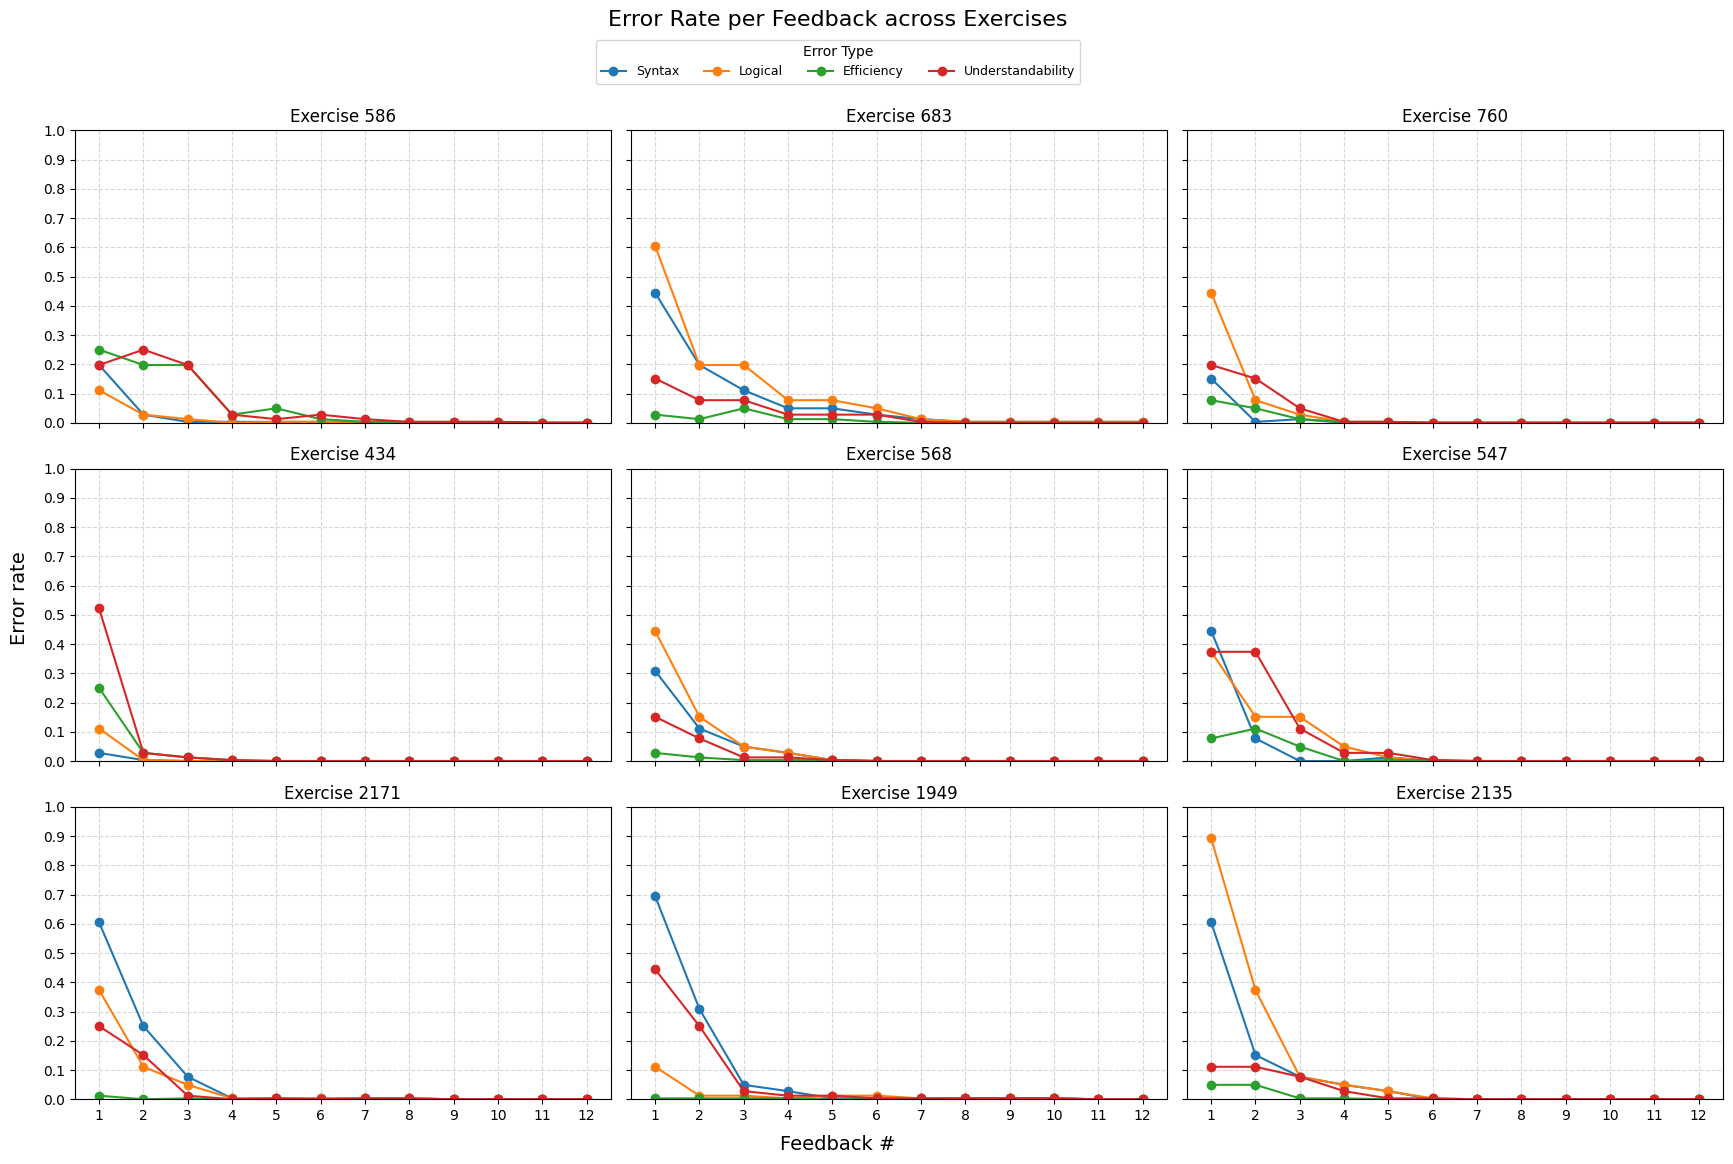

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

LABELS = ["Syntax", "Logical", "Efficiency", "Understandability"]
exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

# Ensure rate columns exist (compute if missing)
rate_cols = [f"Error Rate ({lab})" for lab in LABELS]
missing = [c for c in rate_cols if c not in error_summary_by_exercise.columns]
if missing:
    ERROR_BASE = STUDENT_BASE = 18.0
    for lab in LABELS:
        err_col = f"Error Label ({lab})"
        stu_col = f"Students with {lab} error"
        rate_col = f"Error Rate ({lab})"
        error_summary_by_exercise[rate_col] = (
            (error_summary_by_exercise[err_col].fillna(0) / ERROR_BASE)
            * (error_summary_by_exercise[stu_col].fillna(0) / STUDENT_BASE)
        ).fillna(0.0)


rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, ex in enumerate(exercise_order):
    ax = axes[i]
    sub = error_summary_by_exercise[error_summary_by_exercise["Exercise ID"] == ex]
    x = sub["Feedback #"].to_numpy()
    for lab in LABELS:
        ax.plot(x, sub[f"Error Rate ({lab})"].to_numpy(), marker="o", label=lab)
    ax.set_title(f"Exercise {ex}")
    ax.grid(True, linestyle="--", alpha=0.5)


for ax in axes:
    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_yticks(np.linspace(0, 1.0, 11))
    ax.set_ylim(0, 1.0)

fig.text(0.5, 0.04, "Feedback #", ha="center", fontsize=14)
fig.text(0.04, 0.5, "Error rate", va="center", rotation="vertical", fontsize=14)

TITLE = "Error Rate per Feedback across Exercises"
fig.suptitle(TITLE, fontsize=16, y=0.99)  

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Error Type",
           loc="upper center", bbox_to_anchor=(0.5, 0.97),
           ncol=len(LABELS), fontsize=9)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()


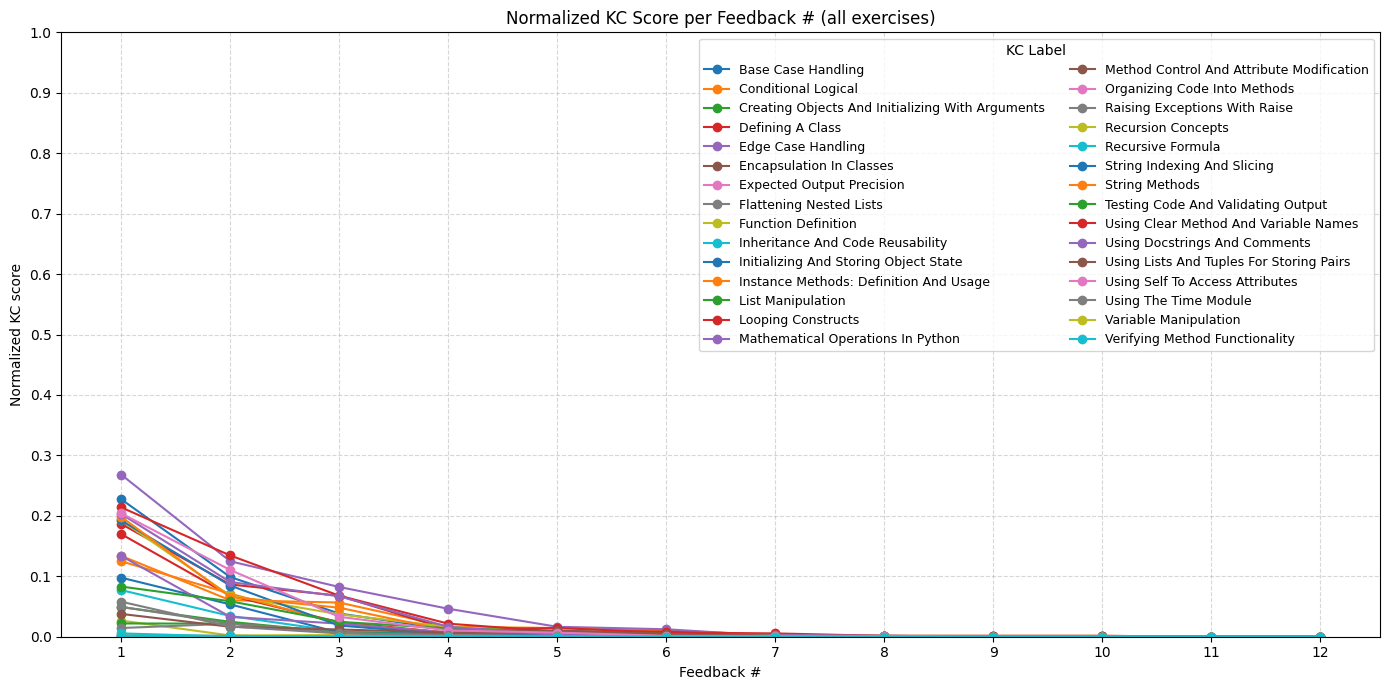

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TOTAL_BASES = {
    "Base Case Handling": 162,
    "Conditional Logical": 162,
    "Creating Objects And Initializing With Arguments": 162,
    "Defining A Class": 162,
    "Edge Case Handling": 162,
    "Encapsulation In Classes": 162,
    "Expected Output Precision": 162,
    "Flattening Nested Lists": 162,
    "Function Definition": 162,
    "Inheritance And Code Reusability": 162,
    "Initializing And Storing Object State": 162,
    "Instance Methods: Definition And Usage": 162,
    "List Manipulation": 162,
    "Looping Constructs": 162,
    "Mathematical Operations In Python": 162,
    "Method Control And Attribute Modification": 162,
    "Organizing Code Into Methods": 162,
    "Raising Exceptions With Raise": 162,
    "Recursion Concepts": 162,
    "Recursive Formula": 162,
    "String Indexing And Slicing": 162,
    "String Methods": 162,
    "Testing Code And Validating Output": 162,
    "Using Clear Method And Variable Names": 162,
    "Using Docstrings And Comments": 162,
    "Using Lists And Tuples For Storing Pairs": 162,
    "Using Self To Access Attributes": 162,
    "Using The Time Module": 162,
    "Variable Manipulation": 162,
    "Verifying Method Functionality": 162,
}
N_STUDENTS_BASE = 18

tmp = error_kc_grade_df.dropna(subset=["KC Label"]).copy()

# If multiple KCs are in one cell, split by common delimiters
tmp["KC Label"] = tmp["KC Label"].astype(str).str.split(r"[,;/]")

df = tmp.explode("KC Label", ignore_index=True)

kc = (
    df["KC Label"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s*:\s*$", "", regex=True)       
    .str.replace(r"\s+", " ", regex=True)           
    .str.title()
)
df["KC Label"] = kc
df = df[df["KC Label"].notna() & (df["KC Label"] != "")].copy()

df = df[df["Student ID"].astype(str).str.strip() != "18"].copy()

fb_col = "Feedback #"
df[fb_col] = pd.to_numeric(df[fb_col], errors="coerce")
df = df.dropna(subset=[fb_col]).copy()
df[fb_col] = df[fb_col].astype(int)

# Compute per-KC metrics
results = {}
for kc_label, total_base in TOTAL_BASES.items():
    lab_df = df[df["KC Label"] == kc_label].copy()
    if lab_df.empty:
        summary = pd.DataFrame(columns=[f"total_{kc_label}", f"students_with_{kc_label}", f"score_{kc_label}"])
        results[kc_label] = summary
        continue

    total_count_by_fb = lab_df.groupby(fb_col).size()
    students_with_error_by_fb = lab_df.groupby(fb_col)["Student ID"].nunique()

    summary = (
        pd.concat(
            {
                f"total_{kc_label}": total_count_by_fb,
                f"students_with_{kc_label}": students_with_error_by_fb,
            },
            axis=1,
        )
        .fillna(0)
        .astype(int)
        .sort_index()
    )
    summary[f"score_{kc_label}"] = (
        (summary[f"total_{kc_label}"] / total_base)
        * (summary[f"students_with_{kc_label}"] / N_STUDENTS_BASE)
    )
    results[kc_label] = summary

all_scores = pd.DataFrame(index=range(1, 13))

for kc_label, summary in results.items():
    # If summary is empty, just fill zeros
    if summary.empty or f"score_{kc_label}" not in summary.columns:
        series = pd.Series(0.0, index=all_scores.index, name=f"score_{kc_label}")
    else:
        series = summary[f"score_{kc_label}"].reindex(all_scores.index, fill_value=0.0)
    all_scores[f"score_{kc_label}"] = series

plt.figure(figsize=(14, 7))

for kc_label in TOTAL_BASES.keys():
    plt.plot(all_scores.index, all_scores[f"score_{kc_label}"], marker="o", label=kc_label)

plt.title("Normalized KC Score per Feedback # (all exercises)")
plt.xlabel("Feedback #")
plt.ylabel("Normalized KC score")

plt.xticks(all_scores.index)

plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1)

plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="KC Label", fontsize=9, ncol=2)  
plt.tight_layout()
plt.show()

#print(all_scores.head(12))


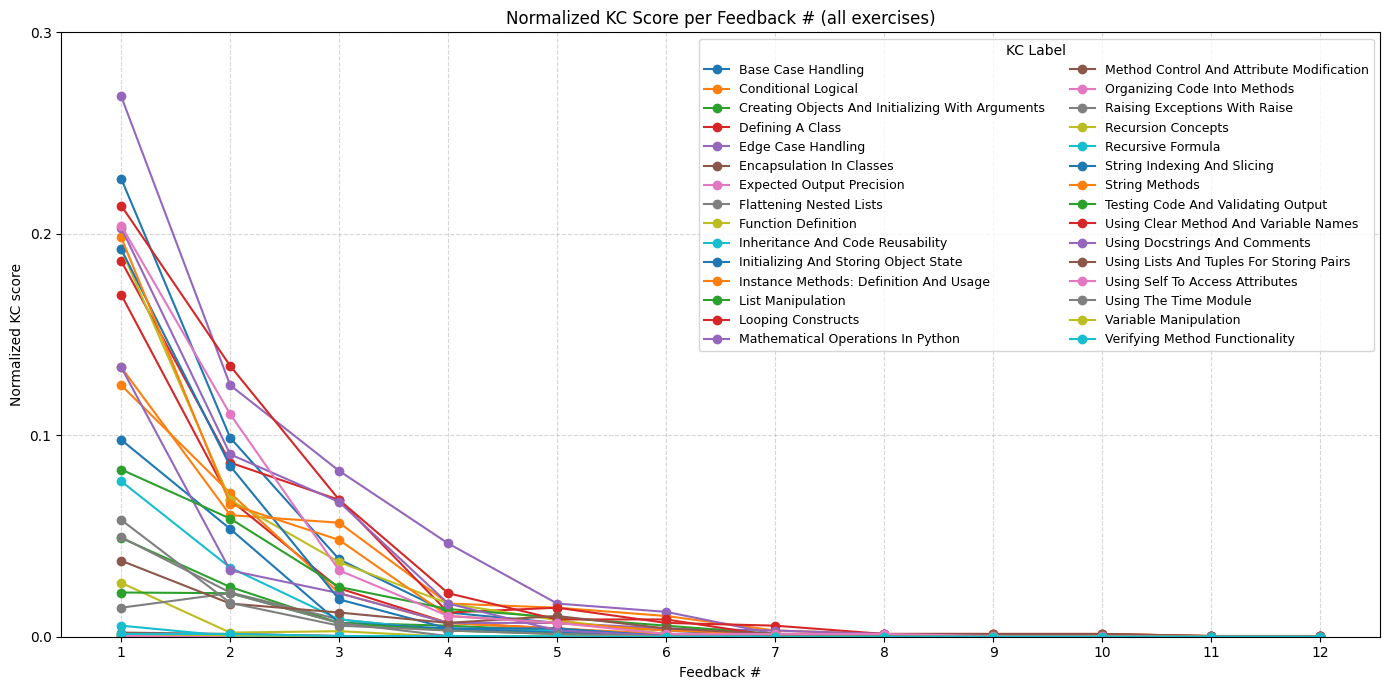

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TOTAL_BASES = {
    "Base Case Handling": 162,
    "Conditional Logical": 162,
    "Creating Objects And Initializing With Arguments": 162,
    "Defining A Class": 162,
    "Edge Case Handling": 162,
    "Encapsulation In Classes": 162,
    "Expected Output Precision": 162,
    "Flattening Nested Lists": 162,
    "Function Definition": 162,
    "Inheritance And Code Reusability": 162,
    "Initializing And Storing Object State": 162,
    "Instance Methods: Definition And Usage": 162,
    "List Manipulation": 162,
    "Looping Constructs": 162,
    "Mathematical Operations In Python": 162,
    "Method Control And Attribute Modification": 162,
    "Organizing Code Into Methods": 162,
    "Raising Exceptions With Raise": 162,
    "Recursion Concepts": 162,
    "Recursive Formula": 162,
    "String Indexing And Slicing": 162,
    "String Methods": 162,
    "Testing Code And Validating Output": 162,
    "Using Clear Method And Variable Names": 162,
    "Using Docstrings And Comments": 162,
    "Using Lists And Tuples For Storing Pairs": 162,
    "Using Self To Access Attributes": 162,
    "Using The Time Module": 162,
    "Variable Manipulation": 162,
    "Verifying Method Functionality": 162,
}
N_STUDENTS_BASE = 18  

tmp = error_kc_grade_df.dropna(subset=["KC Label"]).copy()

# If multiple KCs are in one cell, split by common delimiters
tmp["KC Label"] = tmp["KC Label"].astype(str).str.split(r"[,;/]")

df = tmp.explode("KC Label", ignore_index=True)

kc = (
    df["KC Label"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s*:\s*$", "", regex=True)       
    .str.replace(r"\s+", " ", regex=True)           
    .str.title()
)
df["KC Label"] = kc
df = df[df["KC Label"].notna() & (df["KC Label"] != "")].copy()

df = df[df["Student ID"].astype(str).str.strip() != "18"].copy()

# Ensure Feedback # is numeric 
fb_col = "Feedback #"
df[fb_col] = pd.to_numeric(df[fb_col], errors="coerce")
df = df.dropna(subset=[fb_col]).copy()
df[fb_col] = df[fb_col].astype(int)

# Compute per-KC metrics
results = {}
for kc_label, total_base in TOTAL_BASES.items():
    lab_df = df[df["KC Label"] == kc_label].copy()
    if lab_df.empty:
        summary = pd.DataFrame(columns=[f"total_{kc_label}", f"students_with_{kc_label}", f"score_{kc_label}"])
        results[kc_label] = summary
        continue

    total_count_by_fb = lab_df.groupby(fb_col).size()
    students_with_error_by_fb = lab_df.groupby(fb_col)["Student ID"].nunique()

    summary = (
        pd.concat(
            {
                f"total_{kc_label}": total_count_by_fb,
                f"students_with_{kc_label}": students_with_error_by_fb,
            },
            axis=1,
        )
        .fillna(0)
        .astype(int)
        .sort_index()
    )
    summary[f"score_{kc_label}"] = (
        (summary[f"total_{kc_label}"] / total_base)
        * (summary[f"students_with_{kc_label}"] / N_STUDENTS_BASE)
    )
    results[kc_label] = summary

all_scores = pd.DataFrame(index=range(1, 13))

for kc_label, summary in results.items():
    # If summary is empty, fill with 0
    if summary.empty or f"score_{kc_label}" not in summary.columns:
        series = pd.Series(0.0, index=all_scores.index, name=f"score_{kc_label}")
    else:
        series = summary[f"score_{kc_label}"].reindex(all_scores.index, fill_value=0.0)
    all_scores[f"score_{kc_label}"] = series

plt.figure(figsize=(14, 7))

for kc_label in TOTAL_BASES.keys():
    plt.plot(all_scores.index, all_scores[f"score_{kc_label}"], marker="o", label=kc_label)

plt.title("Normalized KC Score per Feedback # (all exercises)")
plt.xlabel("Feedback #")
plt.ylabel("Normalized KC score")

plt.xticks(all_scores.index)

plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 0.3)

plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="KC Label", fontsize=9, ncol=2)  
plt.tight_layout()
plt.show()

#print(all_scores.head(12))

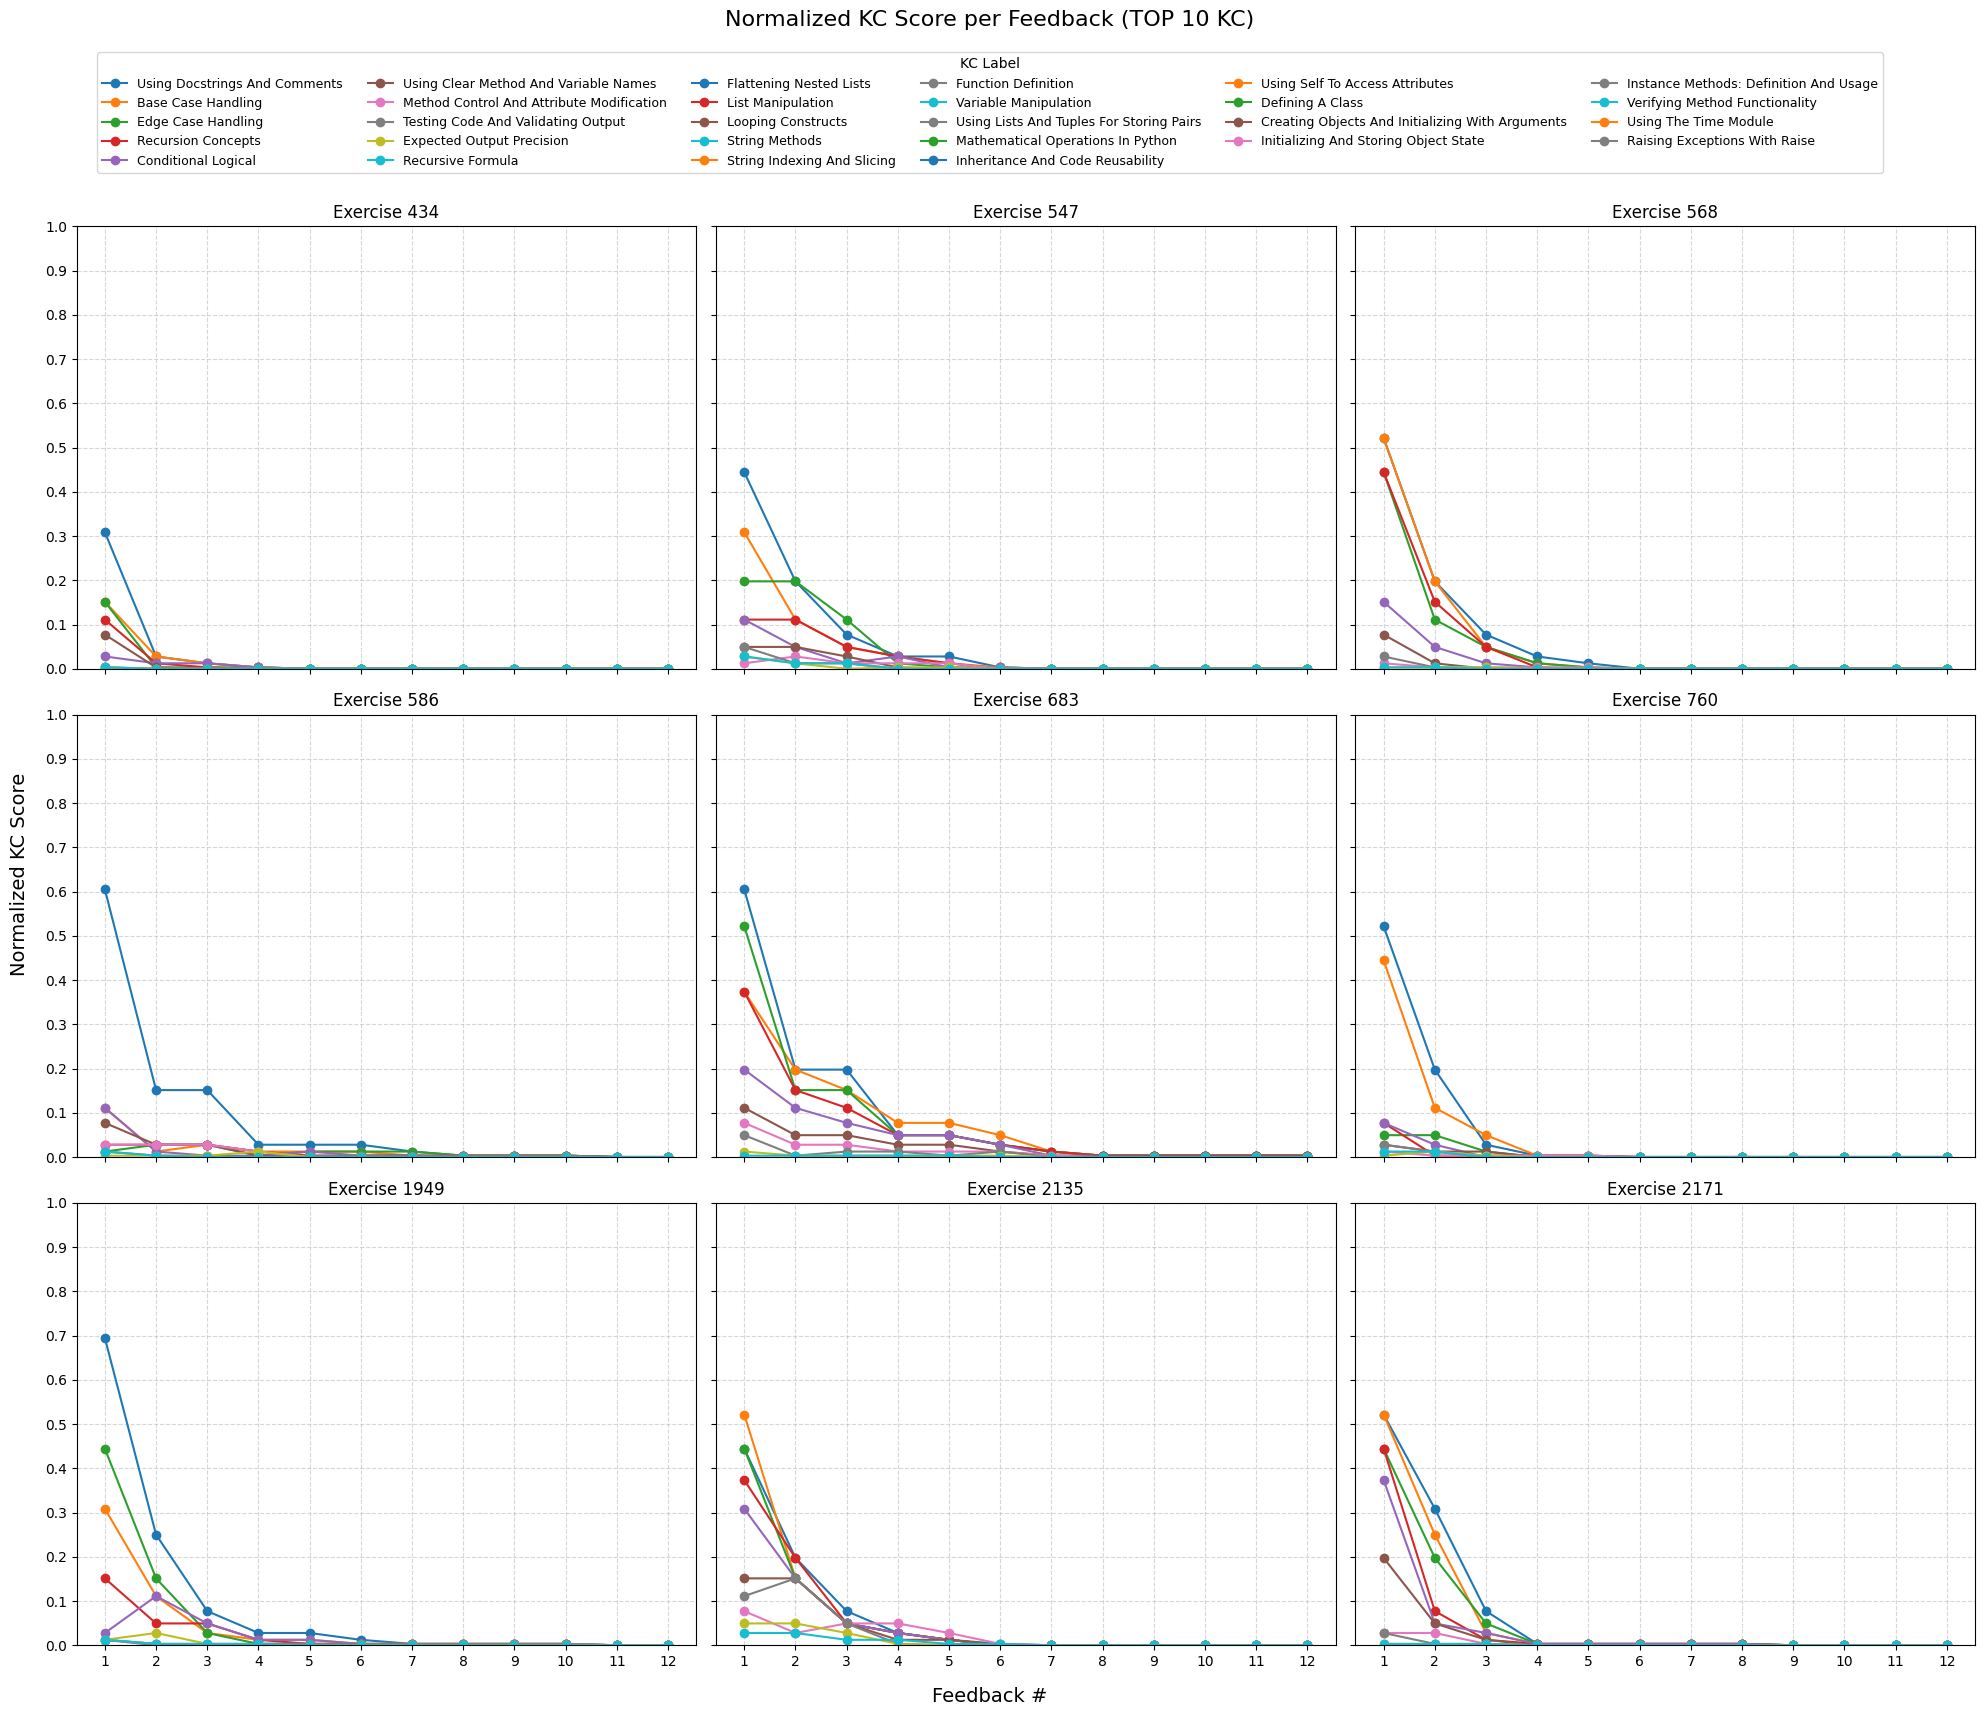

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

EXERCISE_COL = "Exercise ID"
FB_COL       = "Feedback #"
STUDENT_COL  = "Student ID"
KC_COL       = "KC Label"

TOTAL_BASES = {
    "Base Case Handling": 18,
    "Conditional Logical": 18,
    "Creating Objects And Initializing With Arguments": 18,
    "Defining A Class": 18,
    "Edge Case Handling": 18,
    "Encapsulation In Classes": 18,
    "Expected Output Precision": 18,
    "Flattening Nested Lists": 18,
    "Function Definition": 18,
    "Inheritance And Code Reusability": 18,
    "Initializing And Storing Object State": 18,
    "Instance Methods: Definition And Usage": 18,
    "List Manipulation": 18,
    "Looping Constructs": 18,
    "Mathematical Operations In Python": 18,
    "Method Control And Attribute Modification": 18,
    "Organizing Code Into Methods": 18,
    "Raising Exceptions With Raise": 18,
    "Recursion Concepts": 18,
    "Recursive Formula": 18,
    "String Indexing And Slicing": 18,
    "String Methods": 18,
    "Testing Code And Validating Output": 18,
    "Using Clear Method And Variable Names": 18,
    "Using Docstrings And Comments": 18,
    "Using Lists And Tuples For Storing Pairs": 18,
    "Using Self To Access Attributes": 18,
    "Using The Time Module": 18,
    "Variable Manipulation": 18,
    "Verifying Method Functionality": 18,
}
N_STUDENTS_BASE = 18     
TOP_K = 10                

tmp = error_kc_grade_df.dropna(subset=[KC_COL]).copy()
tmp[KC_COL] = tmp[KC_COL].astype(str).str.split(r"[,;/]")
df = tmp.explode(KC_COL, ignore_index=True)

kc = (
    df[KC_COL]
    .astype(str)
    .str.strip()
    .str.replace(r"\s*:\s*$", "", regex=True)   
    .str.replace(r"\s+", " ", regex=True)       
    .str.title()
)
df[KC_COL] = kc
df = df[df[KC_COL].notna() & (df[KC_COL] != "")].copy()

df = df[df[STUDENT_COL].astype(str).str.strip() != "18"].copy()

df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce")
df = df.dropna(subset=[FB_COL]).copy()
df[FB_COL] = df[FB_COL].astype(int)

# Keep only KCs that exist in the list 
df = df[df[KC_COL].isin(TOTAL_BASES.keys())].copy()

# Metric helper
def compute_kc_scores(sub_df: pd.DataFrame, kc_labels: list[str]) -> pd.DataFrame:
    """Return DataFrame (index=1..12) with score_<KC> columns for the given labels."""
    index = range(1, 13)
    out = pd.DataFrame(index=index)

    for kc_label in kc_labels:
        lab_df = sub_df[sub_df[KC_COL] == kc_label]
        if lab_df.empty:
            out[f"score_{kc_label}"] = 0.0
            continue

        total_count_by_fb = lab_df.groupby(FB_COL).size()
        students_with_error_by_fb = lab_df.groupby(FB_COL)[STUDENT_COL].nunique()

        summary = (
            pd.concat(
                {
                    "total": total_count_by_fb,
                    "students": students_with_error_by_fb,
                },
                axis=1,
            )
            .fillna(0)
            .astype(int)
            .sort_index()
        )
        out[f"score_{kc_label}"] = (
            (summary["total"] / float(TOTAL_BASES[kc_label]))
            * (summary["students"] / float(N_STUDENTS_BASE))
        ).reindex(index, fill_value=0.0)

    return out

# Pick exercises & per-exercise top KCs
exercise_ids = (
    df[EXERCISE_COL]
    .dropna()
    .sort_values()
    .unique()
)

rows, cols = 3, 3
max_plots = rows * cols
chosen_ex = exercise_ids[:max_plots]

# Plot
fig, axes = plt.subplots(rows, cols, figsize=(20, 18), sharex=True, sharey=True)
axes = axes.flatten()

global_labels_used = set()

for i, ex_id in enumerate(chosen_ex):
    ax = axes[i]
    sub = df[df[EXERCISE_COL] == ex_id].copy()

    kc_counts = Counter(sub[KC_COL])
    if TOP_K is None:
        kc_to_plot = [k for k in TOTAL_BASES.keys() if k in kc_counts]
    else:
        kc_to_plot = [k for k, _ in kc_counts.most_common(TOP_K)]

    scores = compute_kc_scores(sub, kc_to_plot)

    for kc_label in kc_to_plot:
        y = scores[f"score_{kc_label}"]
        ax.plot(scores.index, y, marker="o", linewidth=1.5, label=kc_label)
        global_labels_used.add(kc_label)

    ax.set_title(f"Exercise {ex_id}")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_ylim(0, 1)
    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_yticks(np.arange(0, 1.1, 0.1))

# If fewer than 9 exercises, hide the empty axes
for j in range(len(chosen_ex), len(axes)):
    axes[j].axis("off")

fig.text(0.5, 0.04, "Feedback #", ha="center", fontsize=14)
fig.text(0.01, 0.5, "Normalized KC Score", va="center", rotation="vertical", fontsize=14)
fig.suptitle(
    f"Normalized KC Score per Feedback (TOP {TOP_K if TOP_K else 'All'} KC)",
    fontsize=16,
    y=0.98
)

handles, labels = [], []
seen = set()
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    for hh, ll in zip(h, l):
        if ll not in seen:
            handles.append(hh)
            labels.append(ll)
            seen.add(ll)

if handles:
    #fig.legend(handles, labels, title="KC Label", loc="upper center", ncol=6, fontsize=9)
    
    fig.legend(
    handles, labels,
    title="KC Label",
    loc="upper center",
    bbox_to_anchor=(0.5, 0.96),  
    ncol=6,
    fontsize=9
)


plt.tight_layout(rect=[0.02, 0.05, 1, 0.9])
plt.show()


In [ ]:
import pandas as pd
import numpy as np

EXERCISE_COL = "Exercise ID"
FB_COL       = "Feedback #"
STUDENT_COL  = "Student ID"
KC_COL       = "KC Label"

TOTAL_BASES = {
    "Base Case Handling": 18,
    "Conditional Logical": 18,
    "Creating Objects And Initializing With Arguments": 18,
    "Defining A Class": 18,
    "Edge Case Handling": 18,
    "Encapsulation In Classes": 18,
    "Expected Output Precision": 18,
    "Flattening Nested Lists": 18,
    "Function Definition": 18,
    "Inheritance And Code Reusability": 18,
    "Initializing And Storing Object State": 18,
    "Instance Methods: Definition And Usage": 18,
    "List Manipulation": 18,
    "Looping Constructs": 18,
    "Mathematical Operations In Python": 18,
    "Method Control And Attribute Modification": 18,
    "Organizing Code Into Methods": 18,
    "Raising Exceptions With Raise": 18,
    "Recursion Concepts": 18,
    "Recursive Formula": 18,
    "String Indexing And Slicing": 18,
    "String Methods": 18,
    "Testing Code And Validating Output": 18,
    "Using Clear Method And Variable Names": 18,
    "Using Docstrings And Comments": 18,
    "Using Lists And Tuples For Storing Pairs": 18,
    "Using Self To Access Attributes": 18,
    "Using The Time Module": 18,
    "Variable Manipulation": 18,
    "Verifying Method Functionality": 18,
}
N_STUDENTS_BASE = 18.0

KC_LIST = list(TOTAL_BASES.keys())

exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

# Clean + explode KC Label
tmp = error_kc_grade_df.dropna(subset=[KC_COL]).copy()
tmp[KC_COL] = tmp[KC_COL].astype(str).str.split(r"[,;/]")

df = tmp.explode(KC_COL, ignore_index=True)


kc = (
    df[KC_COL]
    .astype(str)
    .str.strip()
    .str.replace(r"\s*:\s*$", "", regex=True)   
    .str.replace(r"\s+", " ", regex=True)       
    .str.title()
)
df[KC_COL] = kc

# keep only known KCs
df = df[df[KC_COL].isin(KC_LIST)].copy()

df = df[df[STUDENT_COL].astype(str).str.strip() != "18"].copy()

df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce")
df = df.dropna(subset=[FB_COL]).copy()
df[FB_COL] = df[FB_COL].astype(int)

# Build tables per Exercise (ordered)
full_index = pd.MultiIndex.from_product(
    [exercise_order, range(1, 13)],
    names=[EXERCISE_COL, FB_COL]
)

# Counts per Exercise × Feedback × KC
counts = (
    df.groupby([EXERCISE_COL, FB_COL, KC_COL])
      .size()
      .unstack(KC_COL)
      .reindex(columns=KC_LIST, fill_value=0)
      .reindex(full_index, fill_value=0)
)
counts.columns = [f"KC Count ({kc})" for kc in KC_LIST]

# Unique students per Exercise × Feedback × KC
students_per_kc = (
    df.groupby([EXERCISE_COL, FB_COL, KC_COL])[STUDENT_COL]
      .nunique()
      .unstack(KC_COL)
      .reindex(columns=KC_LIST, fill_value=0)
      .reindex(full_index, fill_value=0)
)
students_per_kc.columns = [f"Students with {kc} KC" for kc in KC_LIST]

# Total counts across all KCs
total_kc_counts = counts.sum(axis=1).rename("number of total KCs")

# Unique students with any KC at Exercise - Feedback
dedup_any = df[[EXERCISE_COL, FB_COL, STUDENT_COL]].drop_duplicates()
students_any = (
    dedup_any.groupby([EXERCISE_COL, FB_COL])
             .size()
             .reindex(full_index, fill_value=0)
             .rename("Students with any KC")
)

kc_summary_by_exercise = (
    pd.concat([counts, students_per_kc, total_kc_counts, students_any], axis=1)
      .reset_index()
      .rename(columns={FB_COL: "Feedback #"})
)

kc_summary_by_exercise[EXERCISE_COL] = pd.Categorical(
    kc_summary_by_exercise[EXERCISE_COL],
    categories=exercise_order,
    ordered=True
)
kc_summary_by_exercise = kc_summary_by_exercise.sort_values(
    [EXERCISE_COL, "Feedback #"]
).reset_index(drop=True)


int_like_cols = (
    list(counts.columns)
    + list(students_per_kc.columns)
    + ["number of total KCs", "Students with any KC"]
)
kc_summary_by_exercise[int_like_cols] = (
    kc_summary_by_exercise[int_like_cols].fillna(0).astype(int)
)

# Add per-KC rate columns
# KC Rate (X) = (KC Count (X) / TOTAL_BASES[X]) * (Students with X KC / 18)
for kc_name in KC_LIST:
    count_col = f"KC Count ({kc_name})"
    stud_col  = f"Students with {kc_name} KC"
    rate_col  = f"KC Rate ({kc_name})"
    base = float(TOTAL_BASES[kc_name])
    kc_summary_by_exercise[rate_col] = (
        (kc_summary_by_exercise[count_col] / base)
        * (kc_summary_by_exercise[stud_col] / N_STUDENTS_BASE)
    ).fillna(0.0)


# Dict of per-exercise tables
kc_tables_by_exercise = {
    ex: (
        kc_summary_by_exercise
        .loc[kc_summary_by_exercise[EXERCISE_COL] == ex]
        .drop(columns=[EXERCISE_COL])
        .reset_index(drop=True)
    )
    for ex in exercise_order
}

# kc_tables_by_exercise[586].head()
# kc_summary_by_exercise.head(20)


In [21]:
kc_summary_by_exercise

Exercise ID  Feedback #  KC Count (Base Case Handling)  \
0           586           1                              2   
1           586           2                              1   
2           586           3                              0   
3           586           4                              0   
4           586           5                              0   
..          ...         ...                            ...   
103        2135           8                              0   
104        2135           9                              0   
105        2135          10                              0   
106        2135          11                              0   
107        2135          12                              0   

     KC Count (Conditional Logical)  \
0                                 6   
1                                 2   
2                                 3   
3                                 2   
4                                 2   
..                              ...   
103                               0   
104                               0   
105                               0   
106                               0   
107                               0   

     KC Count (Creating Objects And Initializing With Arguments)  \
0                                                    0             
1                                                    0             
2                                                    0             
3                                                    0             
4                                                    0             
..                                                 ...             
103                                                  0             
104                                                  0             
105                                                  0             
106                                                  0             
107                                                  0             

     KC Count (Defining A Class)  KC Count (Edge Case Handling)  \
0                              0                              3   
1                              0                              3   
2                              0                              3   
3                              0                              2   
4                              0                              0   
..                           ...                            ...   
103                            0                              0   
104                            0                              0   
105                            0                              0   
106                            0                              0   
107                            0                              0   

     KC Count (Encapsulation In Classes)  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
..                                   ...   
103                                    0   
104                                    0   
105                                    0   
106                                    0   
107                                    0   

     KC Count (Expected Output Precision)  KC Count (Flattening Nested Lists)  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       1                                   0   
4                                       0                                   0   
..                                    ...                                 ...   
103                                     0                               

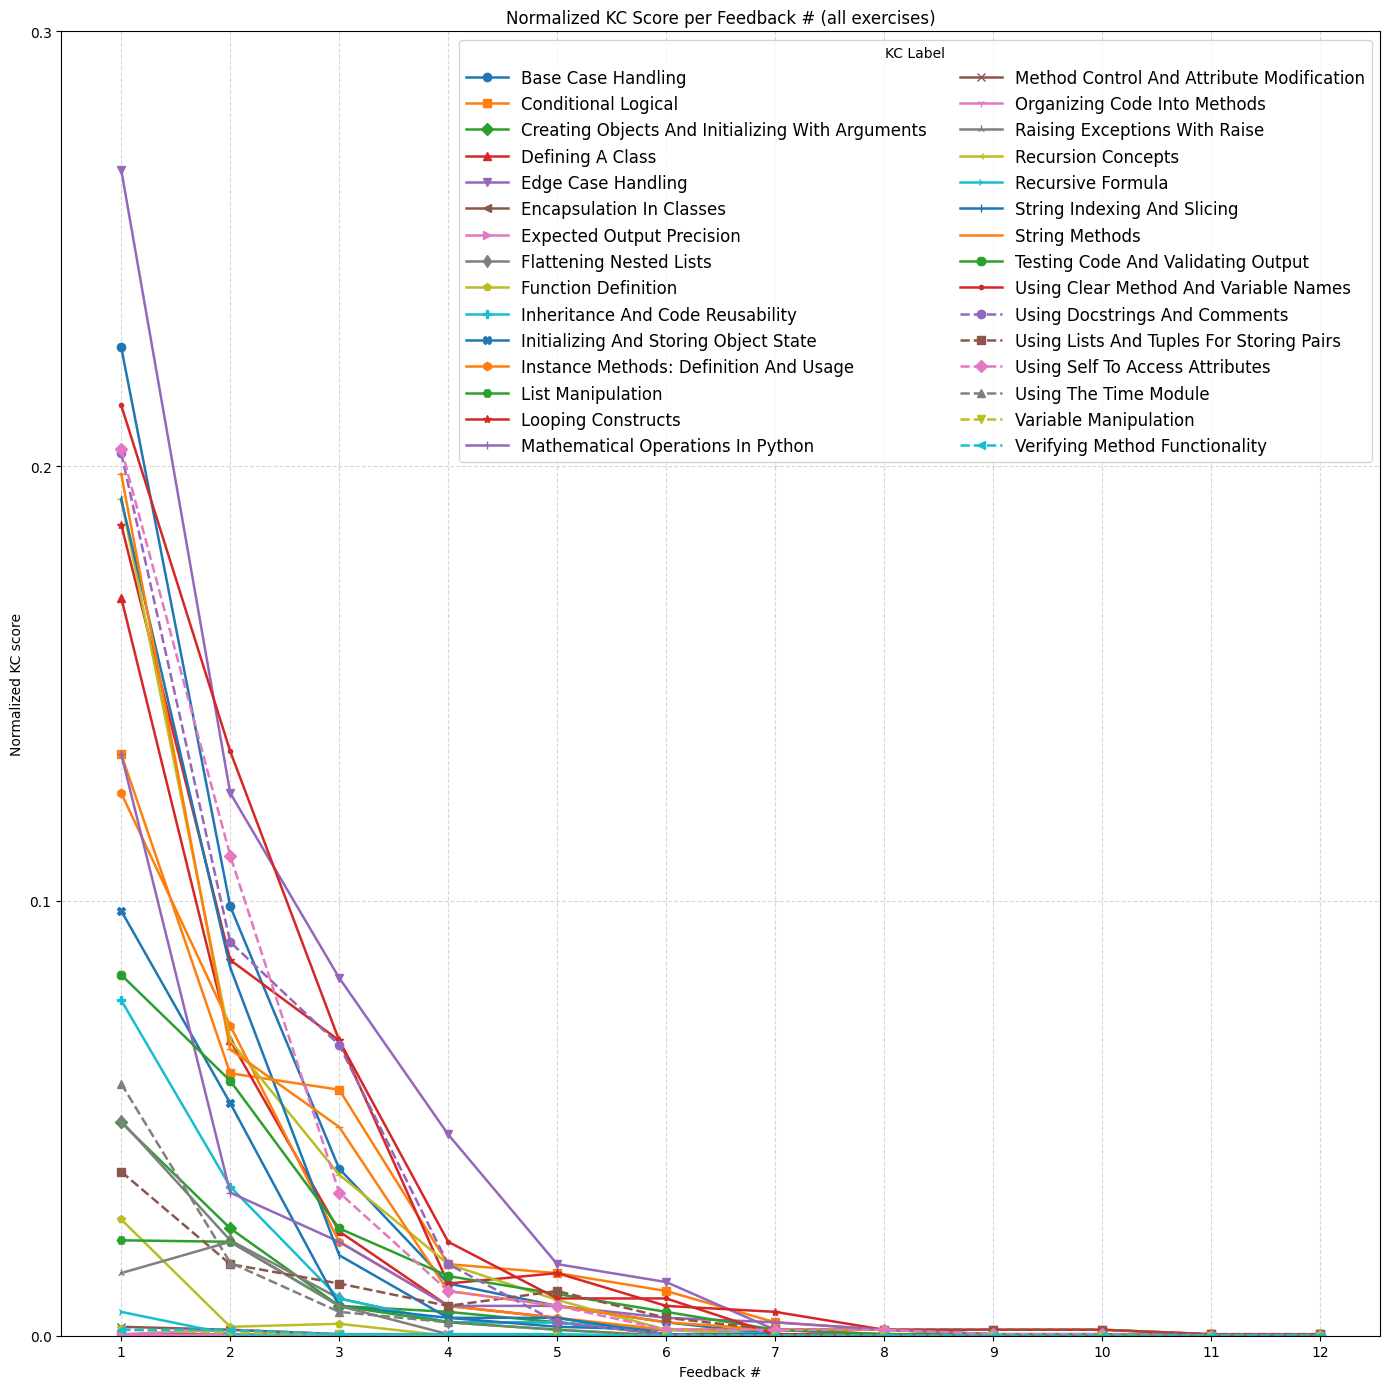

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TOTAL_BASES = {
    "Base Case Handling": 162,
    "Conditional Logical": 162,
    "Creating Objects And Initializing With Arguments": 162,
    "Defining A Class": 162,
    "Edge Case Handling": 162,
    "Encapsulation In Classes": 162,
    "Expected Output Precision": 162,
    "Flattening Nested Lists": 162,
    "Function Definition": 162,
    "Inheritance And Code Reusability": 162,
    "Initializing And Storing Object State": 162,
    "Instance Methods: Definition And Usage": 162,
    "List Manipulation": 162,
    "Looping Constructs": 162,
    "Mathematical Operations In Python": 162,
    "Method Control And Attribute Modification": 162,
    "Organizing Code Into Methods": 162,
    "Raising Exceptions With Raise": 162,
    "Recursion Concepts": 162,
    "Recursive Formula": 162,
    "String Indexing And Slicing": 162,
    "String Methods": 162,
    "Testing Code And Validating Output": 162,
    "Using Clear Method And Variable Names": 162,
    "Using Docstrings And Comments": 162,
    "Using Lists And Tuples For Storing Pairs": 162,
    "Using Self To Access Attributes": 162,
    "Using The Time Module": 162,
    "Variable Manipulation": 162,
    "Verifying Method Functionality": 162,
}
N_STUDENTS_BASE = 18


tmp = error_kc_grade_df.dropna(subset=["KC Label"]).copy()
tmp["KC Label"] = tmp["KC Label"].astype(str).str.split(r"[,;/]")

df = tmp.explode("KC Label", ignore_index=True)

kc = (
    df["KC Label"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s*:\s*$", "", regex=True)   
    .str.replace(r"\s+", " ", regex=True)       
    .str.title()
)
df["KC Label"] = kc
df = df[df["KC Label"].notna() & (df["KC Label"] != "")].copy()

df = df[df["Student ID"].astype(str).str.strip() != "18"].copy()

fb_col = "Feedback #"
df[fb_col] = pd.to_numeric(df[fb_col], errors="coerce")
df = df.dropna(subset=[fb_col]).copy()
df[fb_col] = df[fb_col].astype(int)

# Compute per-KC metrics
results = {}
for kc_label, total_base in TOTAL_BASES.items():
    lab_df = df[df["KC Label"] == kc_label].copy()
    if lab_df.empty:
        summary = pd.DataFrame(columns=[f"total_{kc_label}", f"students_with_{kc_label}", f"score_{kc_label}"])
        results[kc_label] = summary
        continue

    total_count_by_fb = lab_df.groupby(fb_col).size()
    students_with_error_by_fb = lab_df.groupby(fb_col)["Student ID"].nunique()

    summary = (
        pd.concat(
            {
                f"total_{kc_label}": total_count_by_fb,
                f"students_with_{kc_label}": students_with_error_by_fb,
            },
            axis=1,
        )
        .fillna(0)
        .astype(int)
        .sort_index()
    )
    summary[f"score_{kc_label}"] = (
        (summary[f"total_{kc_label}"] / total_base)
        * (summary[f"students_with_{kc_label}"] / N_STUDENTS_BASE)
    )
    results[kc_label] = summary

# df of scores
all_scores = pd.DataFrame(index=range(1, 13))
for kc_label, summary in results.items():
    if summary.empty or f"score_{kc_label}" not in summary.columns:
        series = pd.Series(0.0, index=all_scores.index, name=f"score_{kc_label}")
    else:
        series = summary[f"score_{kc_label}"].reindex(all_scores.index, fill_value=0.0)
    all_scores[f"score_{kc_label}"] = series


plt.figure(figsize=(14, 14))

MARKERS = ["o","s","D","^","v","<",">","d","p","P","X","h","H","*","+","x","1","2","3","4","|","_","8","."]
LINESTYLES = ["-","--","-.",":"]

kc_names = list(TOTAL_BASES.keys())
style_cycle = [(m, ls) for ls in LINESTYLES for m in MARKERS]  
style_map = {kc: style_cycle[i % len(style_cycle)] for i, kc in enumerate(kc_names)}

for kc_label in kc_names:
    marker, ls = style_map[kc_label]
    plt.plot(
        all_scores.index,
        all_scores[f"score_{kc_label}"],
        marker=marker,
        linestyle=ls,
        linewidth=1.8,
        markevery=1,           
        label=kc_label
    )

plt.title("Normalized KC Score per Feedback # (all exercises)")
plt.xlabel("Feedback #")
plt.ylabel("Normalized KC score")

plt.xticks(all_scores.index)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 0.3)
plt.grid(True, linestyle="--", alpha=0.5)

plt.legend(title="KC Label", fontsize=12, ncol=2, handlelength=2.5)
plt.tight_layout()
plt.show()


In [57]:
all_scores

score_Base Case Handling  score_Conditional Logical  \
1                   0.227366                   0.133745   
2                   0.098765                   0.060357   
3                   0.038409                   0.056584   
4                   0.012003                   0.016461   
5                   0.006859                   0.014403   
6                   0.003086                   0.010288   
7                   0.000343                   0.003086   
8                   0.000343                   0.001372   
9                   0.000343                   0.001372   
10                  0.000343                   0.001372   
11                  0.000343                   0.000343   
12                  0.000343                   0.000343   

    score_Creating Objects And Initializing With Arguments  \
1                                            0.049040        
2                                            0.024691        
3                                            0.006859        
4                                            0.005487        
5                                            0.003086        
6                                            0.000343        
7                                            0.000343        
8                                            0.000343        
9                                            0.000343        
10                                           0.000343        
11                                           0.000000        
12                                           0.000000        

    score_Defining A Class  score_Edge Case Handling  \
1                 0.169753                  0.268176   
2                 0.067901                  0.124829   
3                 0.024005                  0.082305   
4                 0.006859                  0.046296   
5                 0.004115                  0.016461   
6                 0.000343                  0.012346   
7                 0.000343                  0.001372   
8                 0.000343                  0.000343   
9                 0.000000                  0.000343   
10                0.000000                  0.000343   
11                0.000000                  0.000343   
12                0.000000                  0.000343   

    score_Encapsulation In Classes  score_Expected Output Precision  \
1                         0.000343                         0.000343   
2                         0.000343                         0.001372   
3                         0.000343                         0.000343   
4                         0.000343                         0.000343   
5                         0.000000                         0.000000   
6                         0.000000                         0.000000   
7                         0.000000                         0.000000   
8                         0.000000                         0.000000   
9                         0.000000                         0.000000   
10                        0.000000                         0.000000   
11                        0.000000                         0.000000   
12                        0.000000                         0.000000   

    score_Flattening Nested Lists  score_Function Definition  \
1                        0.049383                   0.026749   
2                        0.021948                   0.002058   
3                        0.008573                   0.002743   
4                        0.003086                   0.000000   
5                        0.003086                   0.000000   
6                        0.000343                   0.000000   
7                        0.000000                   0.000000   
8                        0.000000                   0.000000   
9                        0.000000                   0.000000   
10                       0.000000                   0.000000   
11                       0.000000                   0.000000   
12      

In [59]:
kc_summary_by_exercise

Exercise ID  Feedback #  KC Count (Base Case Handling)  \
0           586           1                              2   
1           586           2                              1   
2           586           3                              0   
3           586           4                              0   
4           586           5                              0   
..          ...         ...                            ...   
103        2135           8                              0   
104        2135           9                              0   
105        2135          10                              0   
106        2135          11                              0   
107        2135          12                              0   

     KC Count (Conditional Logical)  \
0                                 6   
1                                 2   
2                                 3   
3                                 2   
4                                 2   
..                              ...   
103                               0   
104                               0   
105                               0   
106                               0   
107                               0   

     KC Count (Creating Objects And Initializing With Arguments)  \
0                                                    0             
1                                                    0             
2                                                    0             
3                                                    0             
4                                                    0             
..                                                 ...             
103                                                  0             
104                                                  0             
105                                                  0             
106                                                  0             
107                                                  0             

     KC Count (Defining A Class)  KC Count (Edge Case Handling)  \
0                              0                              3   
1                              0                              3   
2                              0                              3   
3                              0                              2   
4                              0                              0   
..                           ...                            ...   
103                            0                              0   
104                            0                              0   
105                            0                              0   
106                            0                              0   
107                            0                              0   

     KC Count (Encapsulation In Classes)  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
..                                   ...   
103                                    0   
104                                    0   
105                                    0   
106                                    0   
107                                    0   

     KC Count (Expected Output Precision)  KC Count (Flattening Nested Lists)  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       1                                   0   
4                                       0                                   0   
..                                    ...                                 ...   
103                                     0                               

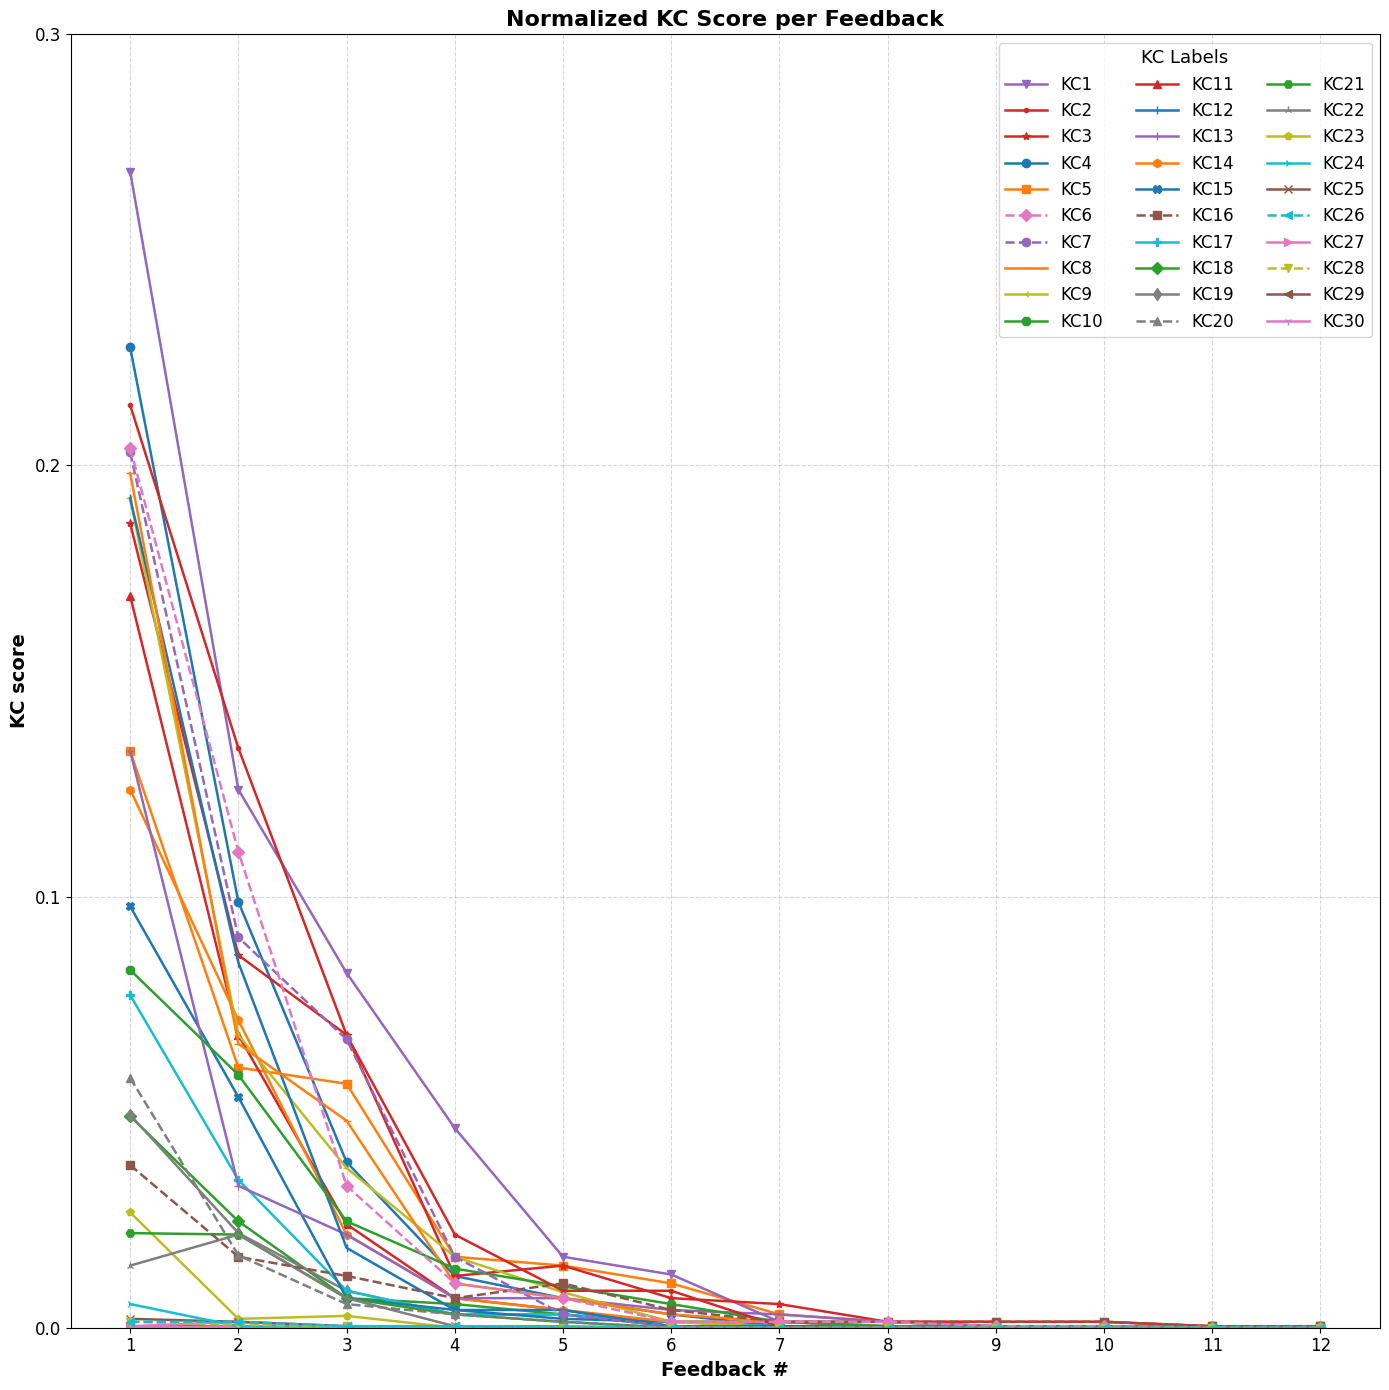

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


TOTAL_BASES = {
    "Base Case Handling": 162,
    "Conditional Logical": 162,
    "Creating Objects And Initializing With Arguments": 162,
    "Defining A Class": 162,
    "Edge Case Handling": 162,
    "Encapsulation In Classes": 162,
    "Expected Output Precision": 162,
    "Flattening Nested Lists": 162,
    "Function Definition": 162,
    "Inheritance And Code Reusability": 162,
    "Initializing And Storing Object State": 162,
    "Instance Methods: Definition And Usage": 162,
    "List Manipulation": 162,
    "Looping Constructs": 162,
    "Mathematical Operations In Python": 162,
    "Method Control And Attribute Modification": 162,
    "Organizing Code Into Methods": 162,
    "Raising Exceptions With Raise": 162,
    "Recursion Concepts": 162,
    "Recursive Formula": 162,
    "String Indexing And Slicing": 162,
    "String Methods": 162,
    "Testing Code And Validating Output": 162,
    "Using Clear Method And Variable Names": 162,
    "Using Docstrings And Comments": 162,
    "Using Lists And Tuples For Storing Pairs": 162,
    "Using Self To Access Attributes": 162,
    "Using The Time Module": 162,
    "Variable Manipulation": 162,
    "Verifying Method Functionality": 162,
}
N_STUDENTS_BASE = 18

# KC Mapping
KC_MAPPING = {
    "Base Case Handling": "KC4",
    "Conditional Logical": "KC5",
    "Creating Objects And Initializing With Arguments": "KC18",
    "Defining A Class": "KC11",
    "Edge Case Handling": "KC1",
    "Encapsulation In Classes": "KC29",
    "Expected Output Precision": "KC27",
    "Flattening Nested Lists": "KC19",
    "Function Definition": "KC23",
    "Inheritance And Code Reusability": "KC17",
    "Initializing And Storing Object State": "KC15",
    "Instance Methods: Definition And Usage": "KC14",
    "List Manipulation": "KC21",
    "Looping Constructs": "KC3",
    "Mathematical Operations In Python": "KC13",
    "Method Control And Attribute Modification": "KC25",
    "Organizing Code Into Methods": "KC30",
    "Raising Exceptions With Raise": "KC22",
    "Recursion Concepts": "KC9",
    "Recursive Formula": "KC24",
    "String Indexing And Slicing": "KC12",
    "String Methods": "KC8",
    "Testing Code And Validating Output": "KC10",
    "Using Clear Method And Variable Names": "KC2",
    "Using Docstrings And Comments": "KC7",
    "Using Lists And Tuples For Storing Pairs": "KC16",
    "Using Self To Access Attributes": "KC6",
    "Using The Time Module": "KC20",
    "Variable Manipulation": "KC28",
    "Verifying Method Functionality": "KC26",
}

tmp = error_kc_grade_df.dropna(subset=["KC Label"]).copy()
tmp["KC Label"] = tmp["KC Label"].astype(str).str.split(r"[,;/]")

df = tmp.explode("KC Label", ignore_index=True)

kc = (
    df["KC Label"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s*:\s*$", "", regex=True)   
    .str.replace(r"\s+", " ", regex=True)       
    .str.title()
)
df["KC Label"] = kc
df = df[df["KC Label"].notna() & (df["KC Label"] != "")].copy()

# Exclude student 18, it has no data
df = df[df["Student ID"].astype(str).str.strip() != "18"].copy()

fb_col = "Feedback #"
df[fb_col] = pd.to_numeric(df[fb_col], errors="coerce")
df = df.dropna(subset=[fb_col]).copy()
df[fb_col] = df[fb_col].astype(int)

# Compute per-KC metrics
results = {}
for kc_label, total_base in TOTAL_BASES.items():
    lab_df = df[df["KC Label"] == kc_label].copy()
    if lab_df.empty:
        summary = pd.DataFrame(columns=[f"total_{kc_label}", f"students_with_{kc_label}", f"score_{kc_label}"])
        results[kc_label] = summary
        continue

    total_count_by_fb = lab_df.groupby(fb_col).size()
    students_with_error_by_fb = lab_df.groupby(fb_col)["Student ID"].nunique()

    summary = (
        pd.concat(
            {
                f"total_{kc_label}": total_count_by_fb,
                f"students_with_{kc_label}": students_with_error_by_fb,
            },
            axis=1,
        )
        .fillna(0)
        .astype(int)
        .sort_index()
    )
    summary[f"score_{kc_label}"] = (
        (summary[f"total_{kc_label}"] / total_base)
        * (summary[f"students_with_{kc_label}"] / N_STUDENTS_BASE)
    )
    results[kc_label] = summary

# df of scores
all_scores = pd.DataFrame(index=range(1, 13))
for kc_label, summary in results.items():
    if summary.empty or f"score_{kc_label}" not in summary.columns:
        series = pd.Series(0.0, index=all_scores.index, name=f"score_{kc_label}")
    else:
        series = summary[f"score_{kc_label}"].reindex(all_scores.index, fill_value=0.0)
    all_scores[f"score_{kc_label}"] = series

# Plot
plt.figure(figsize=(14, 14))

MARKERS = ["o","s","D","^","v","<",">","d","p","P","X","h","H","*","+","x","1","2","3","4","|","_","8","."]
LINESTYLES = ["-","--","-.",":"]

kc_names = list(TOTAL_BASES.keys())
style_cycle = [(m, ls) for ls in LINESTYLES for m in MARKERS]  
style_map = {kc: style_cycle[i % len(style_cycle)] for i, kc in enumerate(kc_names)}

for kc_label in kc_names:
    marker, ls = style_map[kc_label]
    plt.plot(
        all_scores.index,
        all_scores[f"score_{kc_label}"],
        marker=marker,
        linestyle=ls,
        linewidth=1.8,
        markevery=1,
        label=KC_MAPPING.get(kc_label, kc_label)  
    )

plt.title("Normalized KC Score per Feedback", fontsize=16, fontweight="bold")
plt.xlabel("Feedback #", fontsize=14, fontweight="bold")
plt.ylabel("KC score", fontsize=14, fontweight="bold")

plt.xticks(all_scores.index, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.ylim(0, 0.3)
plt.grid(True, linestyle="--", alpha=0.5)

#plt.legend(title="KC Labels", fontsize=12, ncol=3, handlelength=2.5, title_fontsize=13)

# Sort legend by numeric KC order
handles, labels = plt.gca().get_legend_handles_labels()

# Extract numeric part (KC1 → 1, KC2 → 2, ...)
def kc_number(label):
    if label.startswith("KC"):
        return int(label[2:])
    return 9999  

sorted_pairs = sorted(zip(handles, labels), key=lambda x: kc_number(x[1]))
sorted_handles, sorted_labels = zip(*sorted_pairs)

plt.legend(
    sorted_handles,
    sorted_labels,
    title="KC Labels",
    fontsize=12,
    ncol=3,
    handlelength=2.5,
    title_fontsize=13
)


plt.tight_layout()
plt.show()


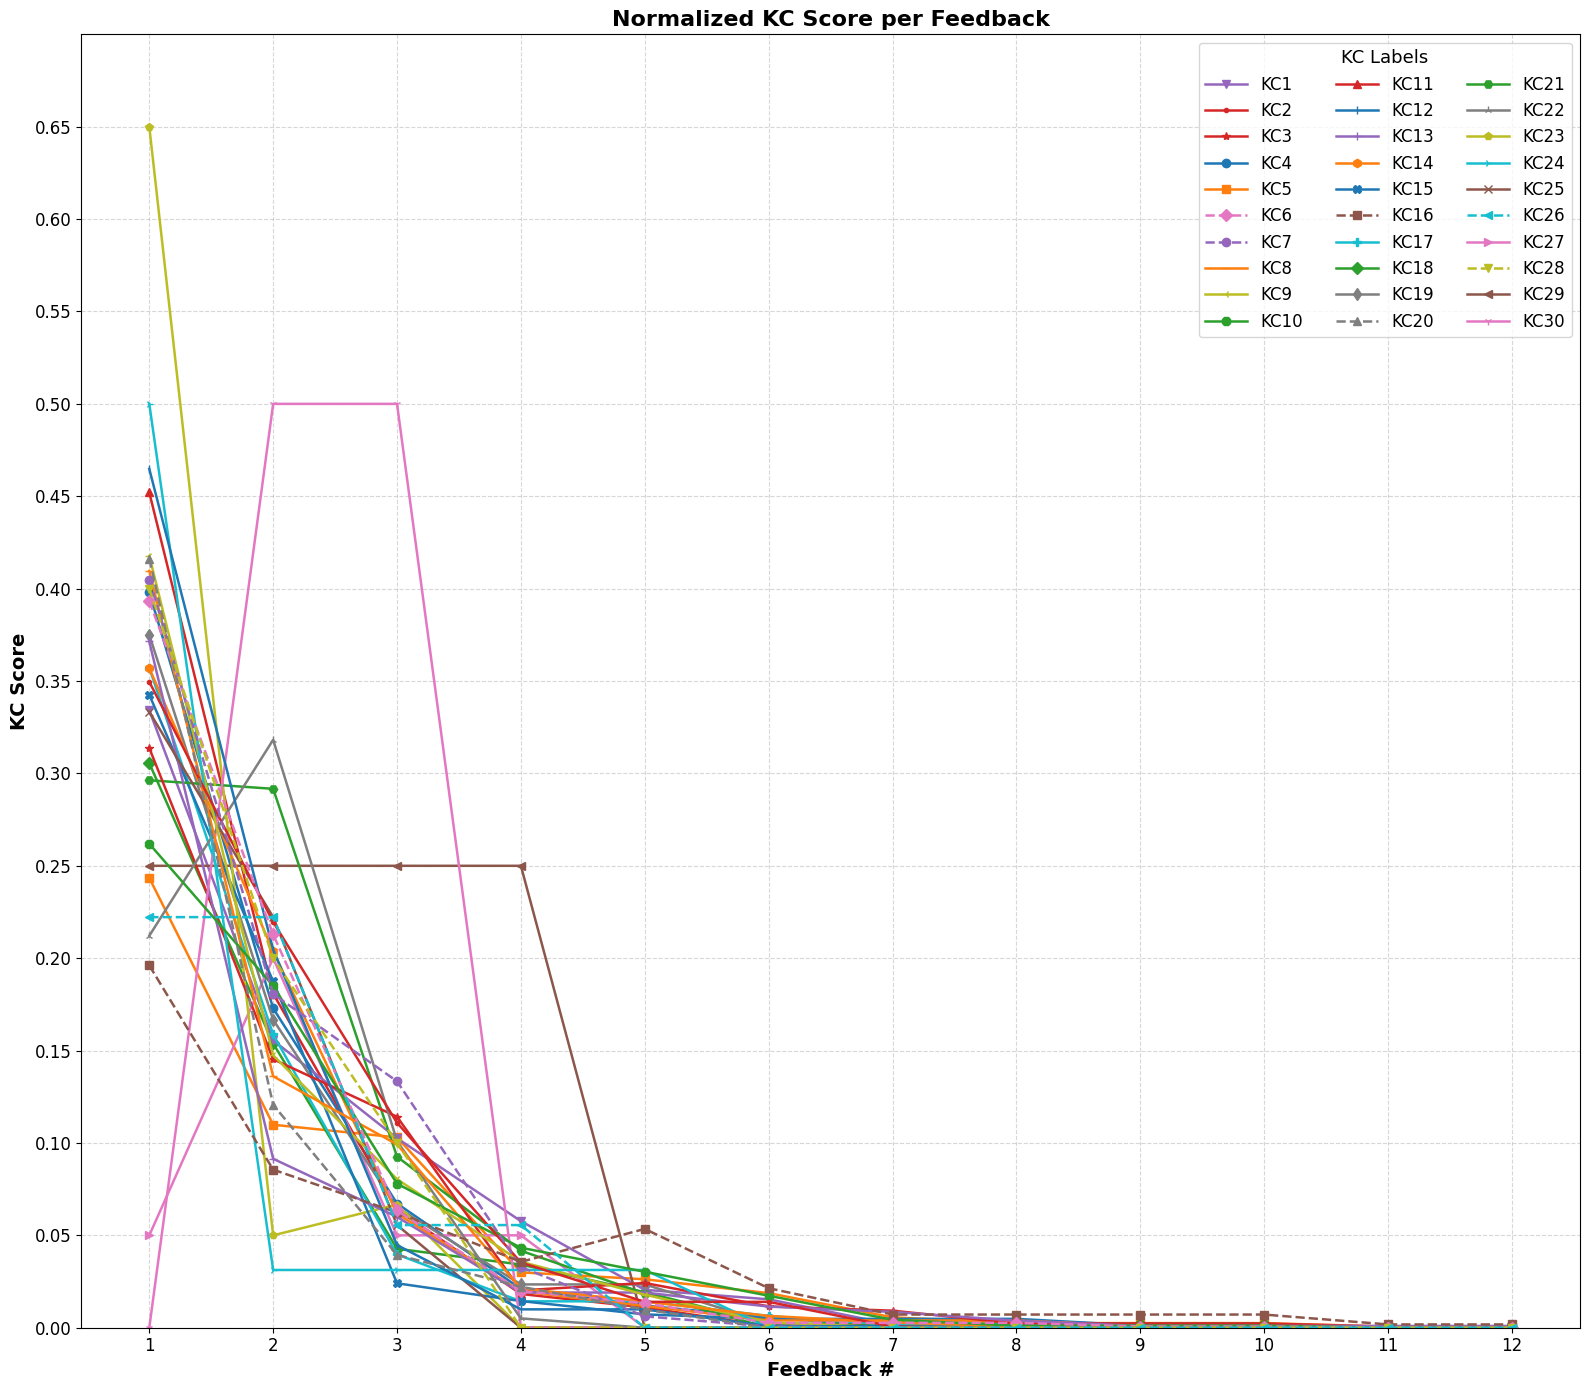

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

N_STUDENTS_BASE = 18  
fb_col = "Feedback #"

# KC Mapping 
KC_MAPPING = {
    "Base Case Handling": "KC4",
    "Conditional Logical": "KC5",
    "Creating Objects And Initializing With Arguments": "KC18",
    "Defining A Class": "KC11",
    "Edge Case Handling": "KC1",
    "Encapsulation In Classes": "KC29",
    "Expected Output Precision": "KC27",
    "Flattening Nested Lists": "KC19",
    "Function Definition": "KC23",
    "Inheritance And Code Reusability": "KC17",
    "Initializing And Storing Object State": "KC15",
    "Instance Methods: Definition And Usage": "KC14",
    "List Manipulation": "KC21",
    "Looping Constructs": "KC3",
    "Mathematical Operations In Python": "KC13",
    "Method Control And Attribute Modification": "KC25",
    "Organizing Code Into Methods": "KC30",
    "Raising Exceptions With Raise": "KC22",
    "Recursion Concepts": "KC9",
    "Recursive Formula": "KC24",
    "String Indexing And Slicing": "KC12",
    "String Methods": "KC8",
    "Testing Code And Validating Output": "KC10",
    "Using Clear Method And Variable Names": "KC2",
    "Using Docstrings And Comments": "KC7",
    "Using Lists And Tuples For Storing Pairs": "KC16",
    "Using Self To Access Attributes": "KC6",
    "Using The Time Module": "KC20",
    "Variable Manipulation": "KC28",
    "Verifying Method Functionality": "KC26",
}

tmp = error_kc_grade_df.dropna(subset=["KC Label"]).copy()
tmp["KC Label"] = tmp["KC Label"].astype(str).str.split(r"[,;/]")

df = tmp.explode("KC Label", ignore_index=True)

df["KC Label"] = (
    df["KC Label"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s*:\s*$", "", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)
df = df[df["KC Label"].notna() & (df["KC Label"] != "")].copy()

df = df[df["Student ID"].astype(str).str.strip() != "18"].copy()

df[fb_col] = pd.to_numeric(df[fb_col], errors="coerce")
df = df.dropna(subset=[fb_col]).copy()
df[fb_col] = df[fb_col].astype(int)

# List of all KC labels in dataset
kc_names = sorted(df["KC Label"].unique())

# Compute dynamic normalized KC scores
results = {}
for kc_label in kc_names:
    lab_df = df[df["KC Label"] == kc_label].copy()
    if lab_df.empty:
        results[kc_label] = pd.DataFrame(
            columns=[f"total_{kc_label}", f"students_with_{kc_label}", f"score_{kc_label}"]
        )
        continue

    # k_f: count per feedback
    total_count_by_fb = lab_df.groupby(fb_col).size()
    # s_f: number of students per feedback
    students_with_error_by_fb = lab_df.groupby(fb_col)["Student ID"].nunique()

    # K: total occurrences across all feedback
    K = total_count_by_fb.sum()
    # S: total students ever working on this KC
    S = lab_df["Student ID"].nunique()

    summary = pd.concat(
        {
            f"total_{kc_label}": total_count_by_fb,
            f"students_with_{kc_label}": students_with_error_by_fb,
        },
        axis=1
    ).fillna(0).astype(int).sort_index()

    if K > 0 and S > 0:
        summary[f"score_{kc_label}"] = (
            (summary[f"total_{kc_label}"] / K) *
            (summary[f"students_with_{kc_label}"] / S)
        )
    else:
        summary[f"score_{kc_label}"] = 0.0

    results[kc_label] = summary

all_scores = pd.DataFrame(index=range(1, 13))
for kc_label, summary in results.items():
    if summary.empty or f"score_{kc_label}" not in summary.columns:
        series = pd.Series(0.0, index=all_scores.index, name=f"score_{kc_label}")
    else:
        series = summary[f"score_{kc_label}"].reindex(all_scores.index, fill_value=0.0)
    all_scores[f"score_{kc_label}"] = series

# Plot
plt.figure(figsize=(16, 14))

MARKERS = ["o","s","D","^","v","<",">","d","p","P","X","h","H","*","+","x","1","2","3","4","|","_","8","."]
LINESTYLES = ["-","--","-.",":"]

style_cycle = [(m, ls) for ls in LINESTYLES for m in MARKERS]
style_map = {kc: style_cycle[i % len(style_cycle)] for i, kc in enumerate(kc_names)}

for kc_label in kc_names:
    marker, ls = style_map[kc_label]
    plt.plot(
        all_scores.index,
        all_scores[f"score_{kc_label}"],
        marker=marker,
        linestyle=ls,
        linewidth=1.8,
        markevery=1,
        label=KC_MAPPING.get(kc_label, kc_label)
    )

plt.title("Normalized KC Score per Feedback", fontsize=16, fontweight="bold")
plt.xlabel("Feedback #", fontsize=14, fontweight="bold")
plt.ylabel("KC Score", fontsize=14, fontweight="bold")

plt.xticks(all_scores.index, fontsize=12)
plt.yticks(np.arange(0, 0.7, 0.05), fontsize=12)
plt.ylim(0, 0.7)
plt.grid(True, linestyle="--", alpha=0.5)

# Sort legend by numeric KC order
handles, labels = plt.gca().get_legend_handles_labels()
def kc_number(label):
    if label.startswith("KC"):
        return int(label[2:])
    return 9999
sorted_pairs = sorted(zip(handles, labels), key=lambda x: kc_number(x[1]))
sorted_handles, sorted_labels = zip(*sorted_pairs)

plt.legend(
    sorted_handles,
    sorted_labels,
    title="KC Labels",
    fontsize=12,
    ncol=3,
    handlelength=2.5,
    title_fontsize=13
)

plt.tight_layout()
plt.show()


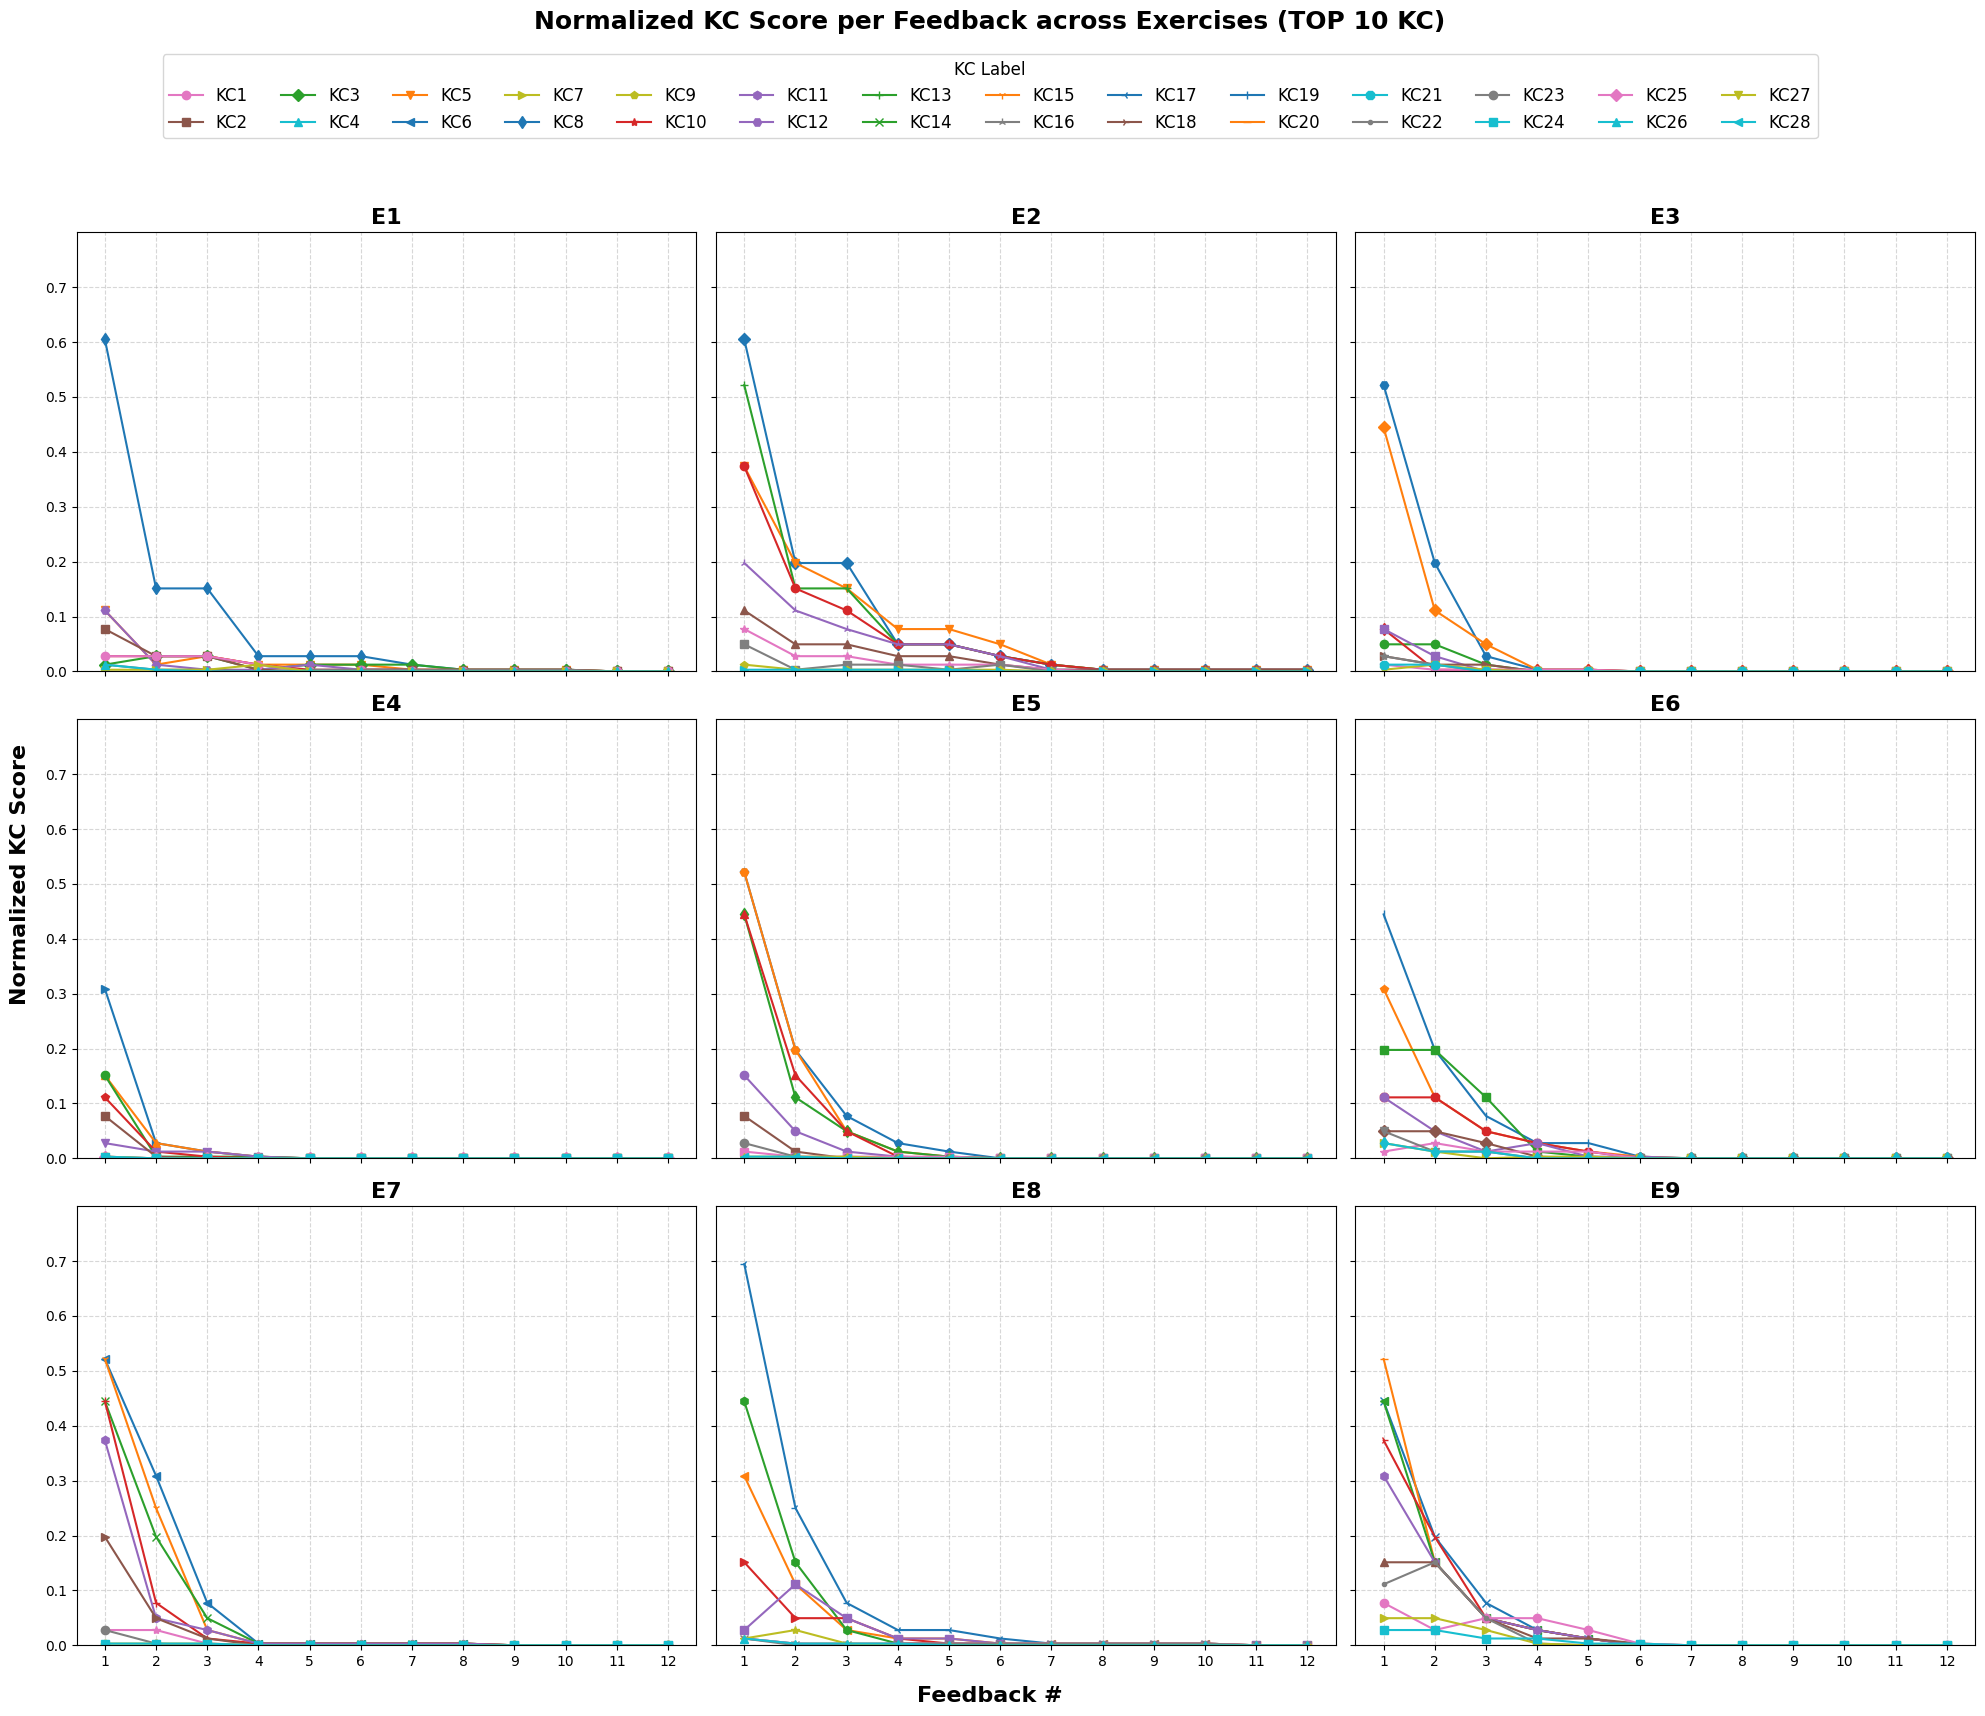

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

EXERCISE_COL = "Exercise ID"
FB_COL       = "Feedback #"
STUDENT_COL  = "Student ID"
KC_COL       = "KC Label"

TOTAL_BASES = {
    "Base Case Handling": 18,
    "Conditional Logical": 18,
    "Creating Objects And Initializing With Arguments": 18,
    "Defining A Class": 18,
    "Edge Case Handling": 18,
    "Encapsulation In Classes": 18,
    "Expected Output Precision": 18,
    "Flattening Nested Lists": 18,
    "Function Definition": 18,
    "Inheritance And Code Reusability": 18,
    "Initializing And Storing Object State": 18,
    "Instance Methods: Definition And Usage": 18,
    "List Manipulation": 18,
    "Looping Constructs": 18,
    "Mathematical Operations In Python": 18,
    "Method Control And Attribute Modification": 18,
    "Organizing Code Into Methods": 18,
    "Raising Exceptions With Raise": 18,
    "Recursion Concepts": 18,
    "Recursive Formula": 18,
    "String Indexing And Slicing": 18,
    "String Methods": 18,
    "Testing Code And Validating Output": 18,
    "Using Clear Method And Variable Names": 18,
    "Using Docstrings And Comments": 18,
    "Using Lists And Tuples For Storing Pairs": 18,
    "Using Self To Access Attributes": 18,
    "Using The Time Module": 18,
    "Variable Manipulation": 18,
    "Verifying Method Functionality": 18,
}
N_STUDENTS_BASE = 18     
TOP_K = 10                

# KC Mapping
KC_MAPPING = {
    "Base Case Handling": "KC4",
    "Conditional Logical": "KC5",
    "Creating Objects And Initializing With Arguments": "KC18",
    "Defining A Class": "KC11",
    "Edge Case Handling": "KC1",
    "Encapsulation In Classes": "KC29",
    "Expected Output Precision": "KC27",
    "Flattening Nested Lists": "KC19",
    "Function Definition": "KC23",
    "Inheritance And Code Reusability": "KC17",
    "Initializing And Storing Object State": "KC15",
    "Instance Methods: Definition And Usage": "KC14",
    "List Manipulation": "KC21",
    "Looping Constructs": "KC3",
    "Mathematical Operations In Python": "KC13",
    "Method Control And Attribute Modification": "KC25",
    "Organizing Code Into Methods": "KC30",
    "Raising Exceptions With Raise": "KC22",
    "Recursion Concepts": "KC9",
    "Recursive Formula": "KC24",
    "String Indexing And Slicing": "KC12",
    "String Methods": "KC8",
    "Testing Code And Validating Output": "KC10",
    "Using Clear Method And Variable Names": "KC2",
    "Using Docstrings And Comments": "KC7",
    "Using Lists And Tuples For Storing Pairs": "KC16",
    "Using Self To Access Attributes": "KC6",
    "Using The Time Module": "KC20",
    "Variable Manipulation": "KC28",
    "Verifying Method Functionality": "KC26",
}

# Exercise ID mapping
EXERCISE_MAPPING = {
    586: "E1",
    683: "E2",
    760: "E3",
    434: "E4",
    568: "E5",
    547: "E6",
    2171: "E7",
    1949: "E8",
    2135: "E9",
}


tmp = error_kc_grade_df.dropna(subset=[KC_COL]).copy()
tmp[KC_COL] = tmp[KC_COL].astype(str).str.split(r"[,;/]")
df = tmp.explode(KC_COL, ignore_index=True)

kc = (
    df[KC_COL]
    .astype(str)
    .str.strip()
    .str.replace(r"\s*:\s*$", "", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)
df[KC_COL] = kc
df = df[df[KC_COL].notna() & (df[KC_COL] != "")].copy()
df = df[df[STUDENT_COL].astype(str).str.strip() != "18"].copy()

df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce")
df = df.dropna(subset=[FB_COL]).copy()
df[FB_COL] = df[FB_COL].astype(int)
df = df[df[KC_COL].isin(TOTAL_BASES.keys())].copy()

def compute_kc_scores(sub_df: pd.DataFrame, kc_labels: list[str]) -> pd.DataFrame:
    index = range(1, 13)
    out = pd.DataFrame(index=index)
    for kc_label in kc_labels:
        lab_df = sub_df[sub_df[KC_COL] == kc_label]
        if lab_df.empty:
            out[f"score_{kc_label}"] = 0.0
            continue
        total_count_by_fb = lab_df.groupby(FB_COL).size()
        students_with_error_by_fb = lab_df.groupby(FB_COL)[STUDENT_COL].nunique()
        summary = (
            pd.concat({"total": total_count_by_fb, "students": students_with_error_by_fb}, axis=1)
            .fillna(0)
            .astype(int)
            .sort_index()
        )
        out[f"score_{kc_label}"] = (
            (summary["total"] / float(TOTAL_BASES[kc_label]))
            * (summary["students"] / float(N_STUDENTS_BASE))
        ).reindex(index, fill_value=0.0)
    return out

# exercise order
exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]
rows, cols = 3, 3
max_plots = rows * cols
chosen_ex = [ex for ex in exercise_order if ex in df[EXERCISE_COL].unique()][:max_plots]

MARKERS = ["o", "s", "D", "^", "v", "<", ">", "d", "p", "*", "h", "H", "+", "x", "1", "2", "3", "4", "|", "_", "8", "."]
sorted_kc_codes = sorted(KC_MAPPING.values(), key=lambda x: int(x.replace("KC","")))
marker_cycle = {kc: MARKERS[i % len(MARKERS)] for i, kc in enumerate(sorted_kc_codes)}

# Plot per-exercise top-K KC
fig, axes = plt.subplots(rows, cols, figsize=(20, 18), sharex=True, sharey=True)
axes = axes.flatten()
global_labels_used = set()

for i, ex_id in enumerate(chosen_ex):
    ax = axes[i]
    sub = df[df[EXERCISE_COL] == ex_id].copy()
    kc_counts = Counter(sub[KC_COL])
    kc_to_plot = [k for k, _ in kc_counts.most_common(TOP_K)] if TOP_K else [k for k in TOTAL_BASES.keys() if k in kc_counts]
    scores = compute_kc_scores(sub, kc_to_plot)
    
    for kc_label in kc_to_plot:
        y = scores[f"score_{kc_label}"]
        marker = marker_cycle[KC_MAPPING[kc_label]]
        ax.plot(scores.index, y, marker=marker, linewidth=1.5, label=KC_MAPPING[kc_label])
        global_labels_used.add(KC_MAPPING[kc_label])
    
    ax.set_title(f"{EXERCISE_MAPPING.get(ex_id, ex_id)}", fontsize=16, fontweight="bold")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_ylim(0, 0.8)
    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_yticks(np.arange(0, 0.8, 0.1))

# Hide unused axes
for j in range(len(chosen_ex), len(axes)):
    axes[j].axis("off")

fig.text(0.5, 0.04, "Feedback #", ha="center", fontsize=16, fontweight="bold")
fig.text(0.01, 0.5, "Normalized KC Score", va="center", rotation="vertical", fontsize=16, fontweight="bold")
fig.suptitle(f"Normalized KC Score per Feedback across Exercises (TOP {TOP_K if TOP_K else 'All'} KC)", fontsize=18, y=0.98, fontweight="bold")

# Ordered legend KC1 to KC30
handles, labels = [], []
for kc_code in sorted_kc_codes:
    if kc_code in global_labels_used:
        for ax in axes:
            for line in ax.get_lines():
                if line.get_label() == kc_code:
                    handles.append(line)
                    labels.append(kc_code)
                    break
            else:
                continue
            break

if handles:
    fig.legend(handles, labels,
               title="KC Label",
               loc="upper center",
               bbox_to_anchor=(0.5, 0.96),
               ncol=14,
               fontsize=12,
               title_fontsize=12)

plt.tight_layout(rect=[0.02, 0.05, 1, 0.9])
plt.show()




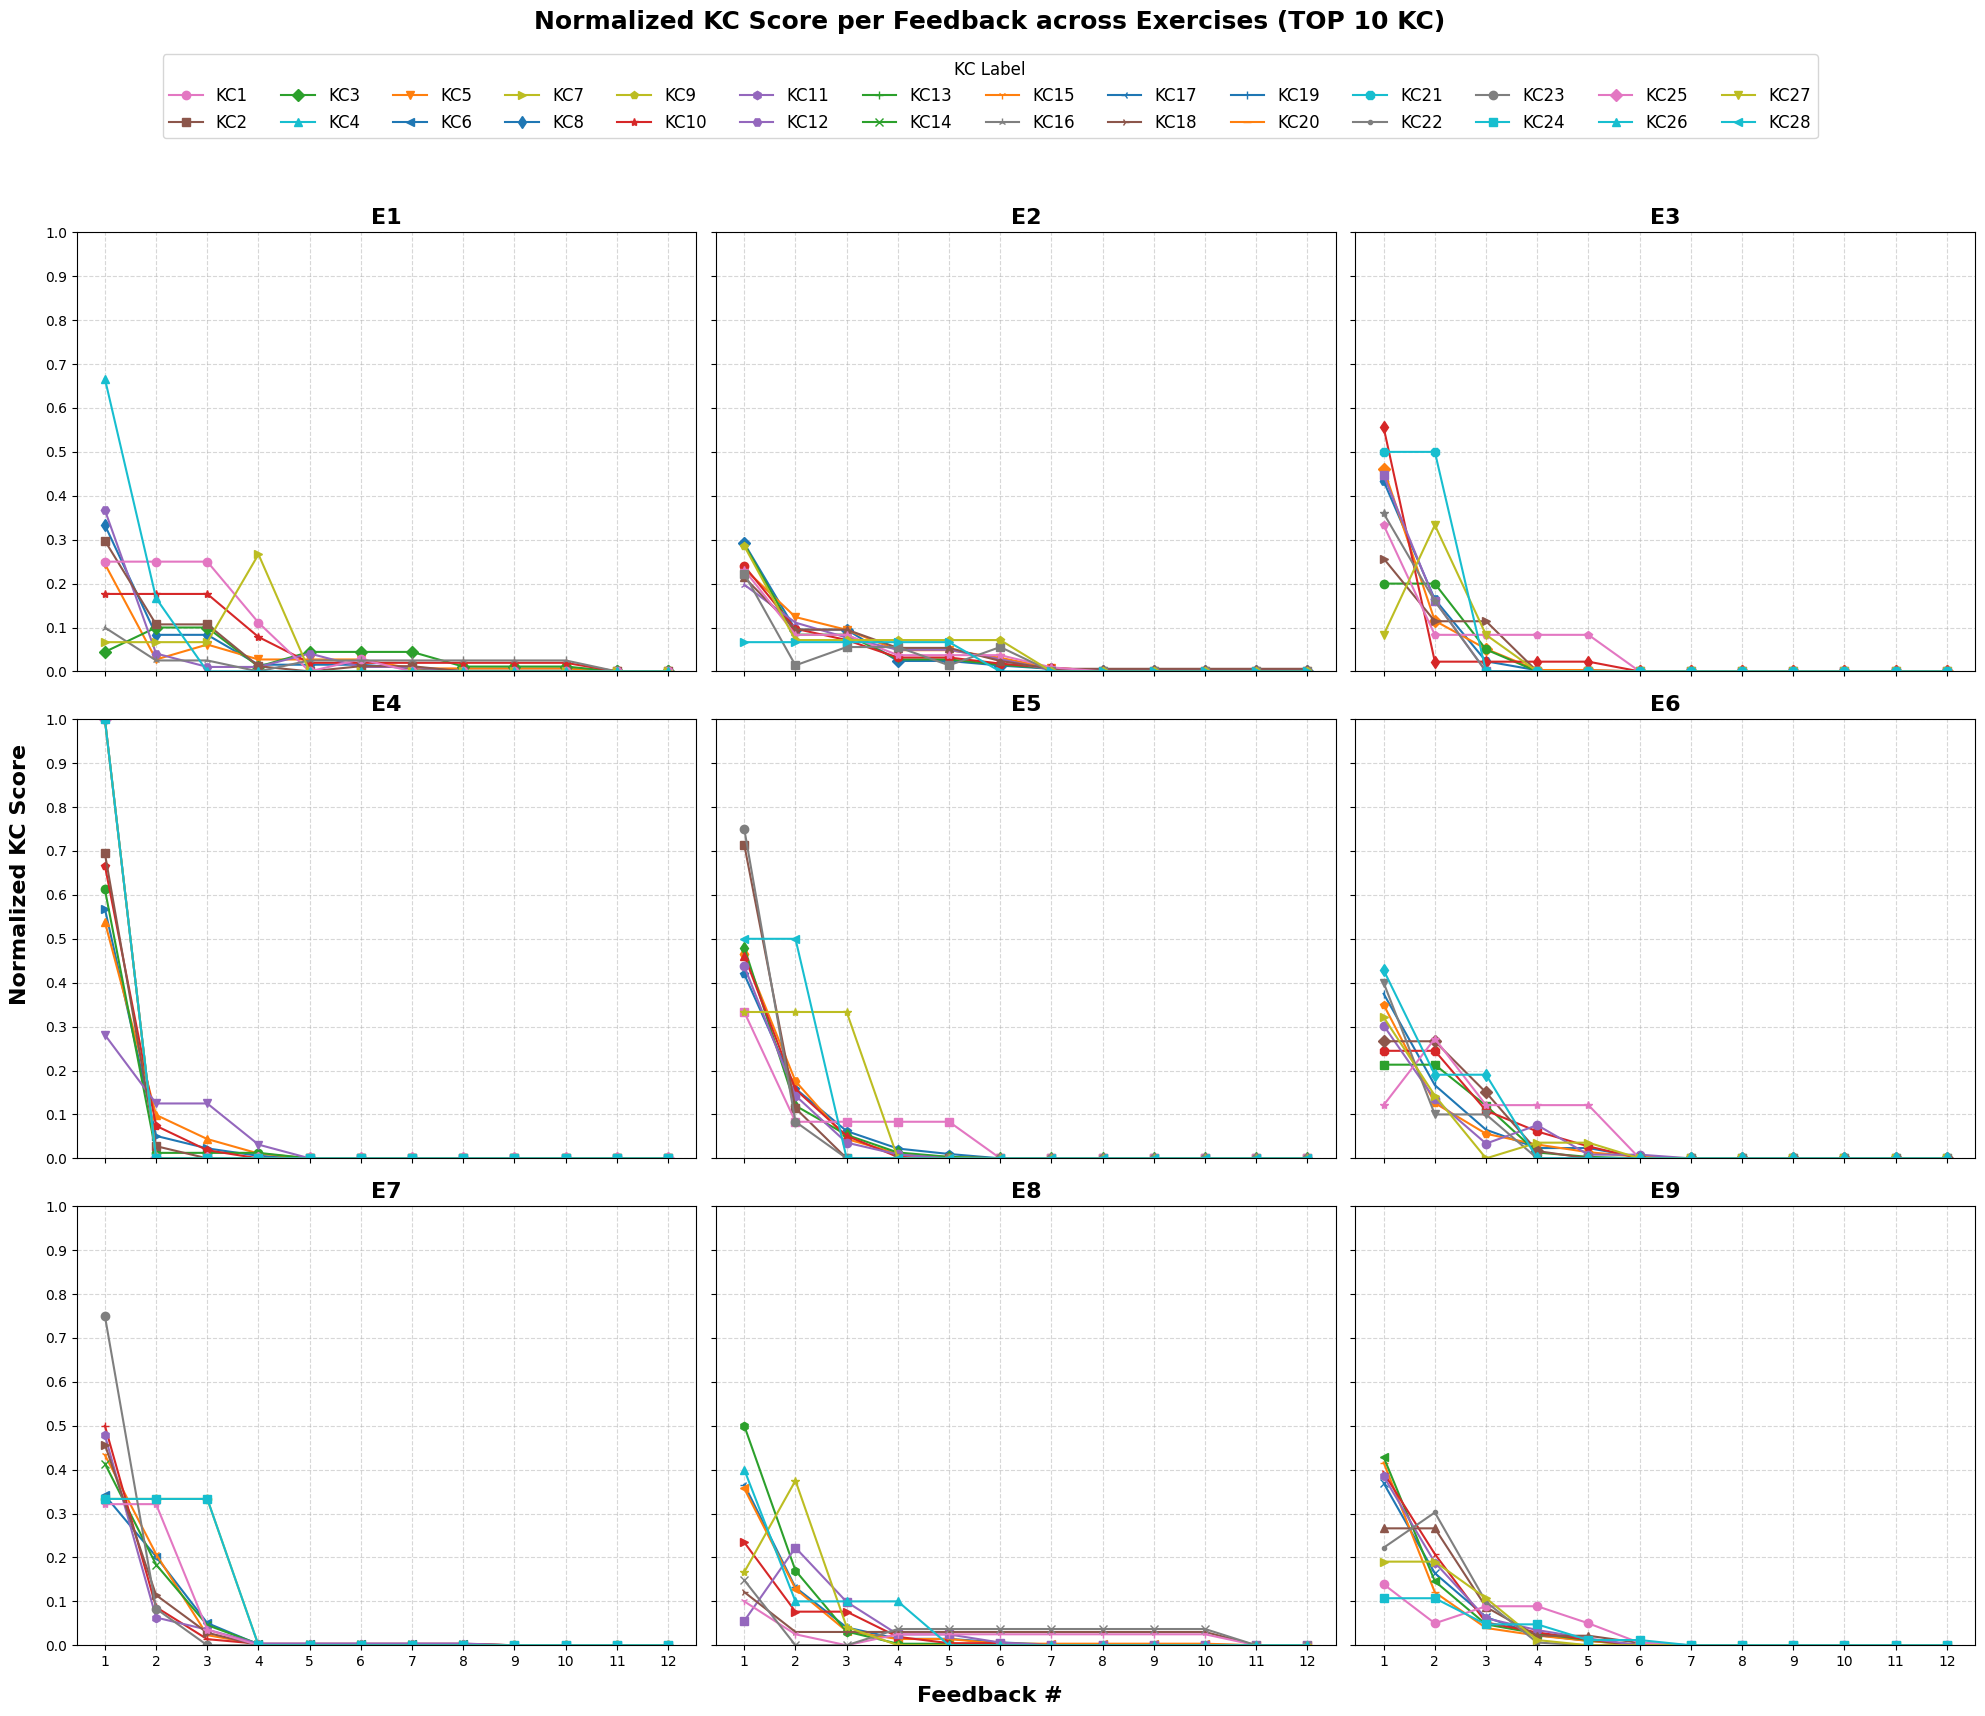

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

EXERCISE_COL = "Exercise ID"
FB_COL       = "Feedback #"
STUDENT_COL  = "Student ID"
KC_COL       = "KC Label"

TOP_K = 10  # number of top KCs to plot per exercise

# KC Mapping
KC_MAPPING = {
    "Base Case Handling": "KC4",
    "Conditional Logical": "KC5",
    "Creating Objects And Initializing With Arguments": "KC18",
    "Defining A Class": "KC11",
    "Edge Case Handling": "KC1",
    "Encapsulation In Classes": "KC29",
    "Expected Output Precision": "KC27",
    "Flattening Nested Lists": "KC19",
    "Function Definition": "KC23",
    "Inheritance And Code Reusability": "KC17",
    "Initializing And Storing Object State": "KC15",
    "Instance Methods: Definition And Usage": "KC14",
    "List Manipulation": "KC21",
    "Looping Constructs": "KC3",
    "Mathematical Operations In Python": "KC13",
    "Method Control And Attribute Modification": "KC25",
    "Organizing Code Into Methods": "KC30",
    "Raising Exceptions With Raise": "KC22",
    "Recursion Concepts": "KC9",
    "Recursive Formula": "KC24",
    "String Indexing And Slicing": "KC12",
    "String Methods": "KC8",
    "Testing Code And Validating Output": "KC10",
    "Using Clear Method And Variable Names": "KC2",
    "Using Docstrings And Comments": "KC7",
    "Using Lists And Tuples For Storing Pairs": "KC16",
    "Using Self To Access Attributes": "KC6",
    "Using The Time Module": "KC20",
    "Variable Manipulation": "KC28",
    "Verifying Method Functionality": "KC26",
}

# Exercise ID mapping
EXERCISE_MAPPING = {
    586: "E1",
    683: "E2",
    760: "E3",
    434: "E4",
    568: "E5",
    547: "E6",
    2171: "E7",
    1949: "E8",
    2135: "E9",
}

tmp = error_kc_grade_df.dropna(subset=[KC_COL]).copy()
tmp[KC_COL] = tmp[KC_COL].astype(str).str.split(r"[,;/]")
df = tmp.explode(KC_COL, ignore_index=True)
df[KC_COL] = (
    df[KC_COL]
    .astype(str)
    .str.strip()
    .str.replace(r"\s*:\s*$", "", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)
df = df[df[KC_COL].notna() & (df[KC_COL] != "")]
df = df[df[STUDENT_COL].astype(str).str.strip() != "18"]
df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce")
df = df.dropna(subset=[FB_COL])
df[FB_COL] = df[FB_COL].astype(int)
df = df[df[KC_COL].isin(KC_MAPPING.keys())]

# Function to compute dynamic KC score
def compute_kc_scores_dynamic(sub_df, kc_labels):
    index = range(1, 13)
    out = pd.DataFrame(index=index)
    for kc_label in kc_labels:
        lab_df = sub_df[sub_df[KC_COL] == kc_label]
        if lab_df.empty:
            out[f"score_{kc_label}"] = 0.0
            continue

        k_f = lab_df.groupby(FB_COL).size()
        s_f = lab_df.groupby(FB_COL)[STUDENT_COL].nunique()
        K = k_f.sum()
        S = lab_df[STUDENT_COL].nunique()

        if K > 0 and S > 0:
            score = (k_f / K) * (s_f / S)
        else:
            score = pd.Series(0.0, index=index)
        out[f"score_{kc_label}"] = score.reindex(index, fill_value=0.0)
    return out

# Exercise order
exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]
rows, cols = 3, 3
max_plots = rows * cols
chosen_ex = [ex for ex in exercise_order if ex in df[EXERCISE_COL].unique()][:max_plots]

MARKERS = ["o", "s", "D", "^", "v", "<", ">", "d", "p", "*", "h", "H", "+", "x", "1", "2", "3", "4", "|", "_", "8", "."]
sorted_kc_codes = sorted(KC_MAPPING.values(), key=lambda x: int(x.replace("KC","")))
marker_cycle = {kc: MARKERS[i % len(MARKERS)] for i, kc in enumerate(sorted_kc_codes)}

# Plot per-exercise top-K KC
fig, axes = plt.subplots(rows, cols, figsize=(20, 18), sharex=True, sharey=True)
axes = axes.flatten()
global_labels_used = set()

for i, ex_id in enumerate(chosen_ex):
    ax = axes[i]
    sub = df[df[EXERCISE_COL] == ex_id].copy()
    kc_counts = Counter(sub[KC_COL])
    kc_to_plot = [k for k, _ in kc_counts.most_common(TOP_K)] if TOP_K else [k for k in KC_MAPPING.keys() if k in kc_counts]
    scores = compute_kc_scores_dynamic(sub, kc_to_plot)

    for kc_label in kc_to_plot:
        y = scores[f"score_{kc_label}"]
        marker = marker_cycle[KC_MAPPING[kc_label]]
        ax.plot(scores.index, y, marker=marker, linewidth=1.5, label=KC_MAPPING[kc_label])
        global_labels_used.add(KC_MAPPING[kc_label])

    ax.set_title(f"{EXERCISE_MAPPING.get(ex_id, ex_id)}", fontsize=16, fontweight="bold")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_ylim(0, 1.0)
    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_yticks(np.arange(0, 1.1, 0.1))

# Hide unused axes
for j in range(len(chosen_ex), len(axes)):
    axes[j].axis("off")

fig.text(0.5, 0.04, "Feedback #", ha="center", fontsize=16, fontweight="bold")
fig.text(0.01, 0.5, "Normalized KC Score", va="center", rotation="vertical", fontsize=16, fontweight="bold")
fig.suptitle(f"Normalized KC Score per Feedback across Exercises (TOP {TOP_K if TOP_K else 'All'} KC)", fontsize=18, y=0.98, fontweight="bold")

# Ordered legend KC1 to KC30
handles, labels = [], []
for kc_code in sorted_kc_codes:
    if kc_code in global_labels_used:
        for ax in axes:
            for line in ax.get_lines():
                if line.get_label() == kc_code:
                    handles.append(line)
                    labels.append(kc_code)
                    break
            else:
                continue
            break

if handles:
    fig.legend(handles, labels,
               title="KC Label",
               loc="upper center",
               bbox_to_anchor=(0.5, 0.96),
               ncol=14,
               fontsize=12,
               title_fontsize=12)

plt.tight_layout(rect=[0.02, 0.05, 1, 0.9])
plt.show()


In [ ]:
# Dictionary to store KC lists per exercise
kc_per_exercise = {}

for i, ex_id in enumerate(chosen_ex):
    ax = axes[i]
    sub = df[df[EXERCISE_COL] == ex_id].copy()
    kc_counts = Counter(sub[KC_COL])
    kc_to_plot = [k for k, _ in kc_counts.most_common(TOP_K)] if TOP_K else [k for k in TOTAL_BASES.keys() if k in kc_counts]
    
    kc_codes = [KC_MAPPING[k] for k in kc_to_plot]
    kc_per_exercise[EXERCISE_MAPPING.get(ex_id, ex_id)] = kc_codes
    
    scores = compute_kc_scores(sub, kc_to_plot)
    
    for kc_label in kc_to_plot:
        y = scores[f"score_{kc_label}"]
        marker = marker_cycle[KC_MAPPING[kc_label]]
        ax.plot(scores.index, y, marker=marker, linewidth=1.5, label=KC_MAPPING[kc_label])
        global_labels_used.add(KC_MAPPING[kc_label])
    
    ax.set_title(f"{EXERCISE_MAPPING.get(ex_id, ex_id)}", fontsize=16, fontweight="bold")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_ylim(0, 0.8)
    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_yticks(np.arange(0, 0.8, 0.1))

# print KC lists per exercise
for ex, kc_list in kc_per_exercise.items():
    print(f"{ex}: {', '.join(kc_list)}")


E1: KC8, KC5, KC3, KC10, KC12, KC2, KC1, KC16, KC7, KC4
E2: KC3, KC5, KC13, KC1, KC16, KC4, KC10, KC2, KC9, KC7
E3: KC12, KC3, KC1, KC8, KC2, KC7, KC9, KC10, KC5, KC21
E4: KC7, KC4, KC1, KC9, KC5, KC2, KC25, KC10, KC27, KC24
E5: KC9, KC12, KC8, KC4, KC1, KC2, KC24, KC23, KC10, KC28
E6: KC19, KC9, KC2, KC21, KC1, KC3, KC10, KC5, KC7, KC8
E7: KC6, KC15, KC14, KC13, KC11, KC7, KC10, KC1, KC23, KC2
E8: KC17, KC6, KC11, KC7, KC2, KC18, KC15, KC14, KC10, KC26
E9: KC14, KC20, KC6, KC18, KC11, KC4, KC1, KC22, KC7, KC2


In [ ]:
# Count KC freq
kc_freq_all = Counter(df[KC_COL])

kc_freq_all_df = pd.DataFrame.from_dict(kc_freq_all, orient="index", columns=["Count"]).sort_values("Count", ascending=False)

print(kc_freq_all_df.head(20))  


                                                  Count
Edge Case Handling                                  130
Using Clear Method And Variable Names               105
Looping Constructs                                  102
Base Case Handling                                   98
Using Self To Access Attributes                      89
Conditional Logical                                  89
Using Docstrings And Comments                        86
String Methods                                       83
Recursion Concepts                                   79
Testing Code And Validating Output                   77
Defining A Class                                     73
String Indexing And Slicing                          71
Mathematical Operations In Python                    70
Instance Methods: Definition And Usage               68
Initializing And Storing Object State                52
Using Lists And Tuples For Storing Pairs             51
Inheritance And Code Reusability                

In [ ]:
kc_freq_per_ex = (
    df.groupby([EXERCISE_COL, KC_COL])
    .size()
    .reset_index(name="Count")
    .sort_values(["Exercise ID", "Count"], ascending=[True, False])
)

# check first 30 rows
print(kc_freq_per_ex.head(30))  


    Exercise ID                                   KC Label  Count
11          434              Using Docstrings And Comments     16
0           434                         Base Case Handling     13
2           434                         Edge Case Handling     10
7           434                         Recursion Concepts      9
1           434                        Conditional Logical      8
10          434      Using Clear Method And Variable Names      6
3           434                  Expected Output Precision      1
4           434                        Function Definition      1
5           434          Mathematical Operations In Python      1
6           434  Method Control And Attribute Modification      1
8           434                          Recursive Formula      1
9           434         Testing Code And Validating Output      1
15          547                    Flattening Nested Lists     32
20          547                         Recursion Concepts     26
25        

In [ ]:
top_kc_per_ex = {}

for ex_id in chosen_ex:
    sub = df[df[EXERCISE_COL] == ex_id]
    kc_counts = Counter(sub[KC_COL])
    top_k = kc_counts.most_common(TOP_K)
    top_kc_per_ex[EXERCISE_MAPPING.get(ex_id, ex_id)] = top_k

# Print result
for ex, kc_list in top_kc_per_ex.items():
    print(f"{ex}: {kc_list}")


E1: [('String Methods', 42), ('Conditional Logical', 21), ('Looping Constructs', 18), ('Testing Code And Validating Output', 17), ('String Indexing And Slicing', 14), ('Using Clear Method And Variable Names', 14), ('Edge Case Handling', 12), ('Using Lists And Tuples For Storing Pairs', 10), ('Using Docstrings And Comments', 5), ('Base Case Handling', 3)]
E2: [('Looping Constructs', 48), ('Conditional Logical', 47), ('Mathematical Operations In Python', 45), ('Edge Case Handling', 42), ('Using Lists And Tuples For Storing Pairs', 36), ('Base Case Handling', 28), ('Testing Code And Validating Output', 18), ('Using Clear Method And Variable Names', 12), ('Recursion Concepts', 7), ('Using Docstrings And Comments', 5)]
E3: [('String Indexing And Slicing', 26), ('Looping Constructs', 24), ('Edge Case Handling', 10), ('String Methods', 9), ('Using Clear Method And Variable Names', 8), ('Using Docstrings And Comments', 7), ('Recursion Concepts', 6), ('Testing Code And Validating Output', 5), (

In [145]:
# Load dataset
error_kc_grade_df = pd.read_csv("./error_kc_grade.csv")
error_kc_grade_df

Student ID  Exercise ID  Feedback #                         Error Label  \
0             1          547           1  Logical, Syntax, Understandability   
1             1          547           2       Understandability, Efficiency   
2             1          568           1          Logical, Understandability   
3             1          568           2          Logical, Understandability   
4             1          568           3                 Logical, Efficiency   
..          ...          ...         ...                                 ...   
366          19          760           1                     Logical, Syntax   
367          19         1949           1                     Logical, Syntax   
368          19         2135           1                     Logical, Syntax   
369          19         2135           2                     Logical, Syntax   
370          19         2171           1                     Logical, Syntax   

                                              KC Label Compiler output  Grade  \
0    Looping Constructs, Using Clear Method And Var...        compiled     25   
1    Using Docstrings and Comments, Testing Code an...        compiled    100   
2     Recursion Concepts, Recursive Formula, Using ...        compiled     60   
3    Recursion Concepts, Testing Code and Validatin...        compiled     30   
4    Recursion Concepts, Recursive Formula, Testing...        compiled     30   
..                                                 ...             ...    ...   
366  String Indexing and Slicing, String Methods, L...        compiled    100   
367  Defining a Class, Initializing and Storing Obj...        compiled     70   
368  Using the time Module, Defining a Class, Insta...           error     40   
369  Using the time Module, Defining a Class, Insta...        compiled    100   
370  Defining a Class, Initializing and Storing Obj...        compiled     95   

     Unnamed: 7 Unnamed: 8  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
..          ...        ...  
366         NaN        NaN  
367         NaN        NaN  
368         NaN        NaN  
369         NaN        NaN  
370         NaN        NaN  

[371 rows x 9 columns]

In [146]:
error_kc_grade_df = error_kc_grade_df.drop(['Unnamed: 7', 'Unnamed: 8'], axis=1)
error_kc_grade_df

Student ID  Exercise ID  Feedback #                         Error Label  \
0             1          547           1  Logical, Syntax, Understandability   
1             1          547           2       Understandability, Efficiency   
2             1          568           1          Logical, Understandability   
3             1          568           2          Logical, Understandability   
4             1          568           3                 Logical, Efficiency   
..          ...          ...         ...                                 ...   
366          19          760           1                     Logical, Syntax   
367          19         1949           1                     Logical, Syntax   
368          19         2135           1                     Logical, Syntax   
369          19         2135           2                     Logical, Syntax   
370          19         2171           1                     Logical, Syntax   

                                              KC Label Compiler output  Grade  
0    Looping Constructs, Using Clear Method And Var...        compiled     25  
1    Using Docstrings and Comments, Testing Code an...        compiled    100  
2     Recursion Concepts, Recursive Formula, Using ...        compiled     60  
3    Recursion Concepts, Testing Code and Validatin...        compiled     30  
4    Recursion Concepts, Recursive Formula, Testing...        compiled     30  
..                                                 ...             ...    ...  
366  String Indexing and Slicing, String Methods, L...        compiled    100  
367  Defining a Class, Initializing and Storing Obj...        compiled     70  
368  Using the time Module, Defining a Class, Insta...           error     40  
369  Using the time Module, Defining a Class, Insta...        compiled    100  
370  Defining a Class, Initializing and Storing Obj...        compiled     95  

[371 rows x 7 columns]

In [150]:
error_kc_df = pd.read_csv("full_summary_all_error_kc.csv")
error_kc_df

Unnamed: 0  Feedback #  KC Count (Base Case Handling)  \
0            0           1                             39   
1            1           2                             24   
2            2           3                             14   
3            3           4                              7   
4            4           5                              5   
5            5           6                              3   
6            6           7                              1   
7            7           8                              1   
8            8           9                              1   
9            9          10                              1   
10          10          11                              1   
11          11          12                              1   

    KC Count (Conditional Logical)  \
0                               26   
1                               16   
2                               15   
3                                8   
4                                7   
5                                6   
6                                3   
7                                2   
8                                2   
9                                2   
10                               1   
11                               1   

    KC Count (Creating Objects And Initializing With Arguments)  \
0                                                  13             
1                                                   9             
2                                                   5             
3                                                   4             
4                                                   3             
5                                                   1             
6                                                   1             
7                                                   1             
8                                                   1             
9                                                   1             
10                                                  0             
11                                                  0             

    KC Count (Defining A Class)  KC Count (Edge Case Handling)  \
0                            33                             46   
1                            18                             28   
2                            10                             20   
3                             5                             15   
4                             4                              8   
5                             1                              6   
6                             1                              2   
7                             1                              1   
8                             0                              1   
9                             0                              1   
10                            0                              1   
11                            0                              1   

    KC Count (Encapsulation In Classes)  KC Count (Expected Output Precision)  \
0                                     1                                     1   
1                                     1                                     2   
2                                     1                                     1   
3                                     1                                     1   
4                                     0                                     0   
5                                     0                                     0   
6                                     0                                     0   
7                                     0                                     0   
8                                     0                                     0   
9                                     0                                     0   
10                                    0                                     0   
11          

In [151]:
error_kc_df = error_kc_df.drop(['Unnamed: 0'], axis=1)
error_kc_df

Feedback #  KC Count (Base Case Handling)  KC Count (Conditional Logical)  \
0            1                             39                              26   
1            2                             24                              16   
2            3                             14                              15   
3            4                              7                               8   
4            5                              5                               7   
5            6                              3                               6   
6            7                              1                               3   
7            8                              1                               2   
8            9                              1                               2   
9           10                              1                               2   
10          11                              1                               1   
11          12                              1                               1   

    KC Count (Creating Objects And Initializing With Arguments)  \
0                                                  13             
1                                                   9             
2                                                   5             
3                                                   4             
4                                                   3             
5                                                   1             
6                                                   1             
7                                                   1             
8                                                   1             
9                                                   1             
10                                                  0             
11                                                  0             

    KC Count (Defining A Class)  KC Count (Edge Case Handling)  \
0                            33                             46   
1                            18                             28   
2                            10                             20   
3                             5                             15   
4                             4                              8   
5                             1                              6   
6                             1                              2   
7                             1                              1   
8                             0                              1   
9                             0                              1   
10                            0                              1   
11                            0                              1   

    KC Count (Encapsulation In Classes)  KC Count (Expected Output Precision)  \
0                                     1                                     1   
1                                     1                                     2   
2                                     1                                     1   
3                                     1                                     1   
4                                     0                                     0   
5                                     0                                     0   
6                                     0                                     0   
7                                     0                                     0   
8                                     0                                     0   
9                                     0                                     0   
10                                    0                                     0   
11                                    0                                     0   

    KC Count (Flattening Nested Lists)  KC Count (Function Definition)  ...  \
0                                   12                              13  ...   
1      

In [ ]:
import pandas as pd
import numpy as np
import re

def kc_gradients_per_interval(error_kc_df, x_col="Feedback #"):
    work = error_kc_df.copy()
    work[x_col] = pd.to_numeric(work[x_col], errors="coerce")
    work = work.dropna(subset=[x_col]).sort_values(x_col)

    kc_cols = [c for c in work.columns if c.startswith("KC Rate (")]

    dy = work[kc_cols].diff()
    dx = work[x_col].diff()
    slopes = dy.div(dx, axis=0).iloc[1:].copy()

    # Label rows as intervals
    x_vals = work[x_col].to_numpy()
    slopes.index = pd.Index([f"{int(x_vals[i-1])}→{int(x_vals[i])}" for i in range(1, len(x_vals))],
                            name="Interval")

    def rename_col(c):
        m = re.match(r"KC Rate \((.+)\)", c)
        return f"Grad ({m.group(1)})" if m else f"Grad {c}"

    slopes = slopes.rename(columns={c: rename_col(c) for c in kc_cols})
    return slopes

grad_df = kc_gradients_per_interval(error_kc_df)
# print(grad_df.head())


In [153]:
grad_df

Grad (Base Case Handling)  Grad (Conditional Logical)  \
Interval                                                          
1→2                       -0.128601                   -0.073388   
2→3                       -0.060357                   -0.003772   
3→4                       -0.026406                   -0.040123   
4→5                       -0.005144                   -0.002058   
5→6                       -0.003772                   -0.004115   
6→7                       -0.002743                   -0.007202   
7→8                        0.000000                   -0.001715   
8→9                        0.000000                    0.000000   
9→10                       0.000000                    0.000000   
10→11                      0.000000                   -0.001029   
11→12                      0.000000                    0.000000   

          Grad (Creating Objects And Initializing With Arguments)  \
Interval                                                            
1→2                                               -0.024348         
2→3                                               -0.017833         
3→4                                               -0.001372         
4→5                                               -0.002401         
5→6                                               -0.002743         
6→7                                                0.000000         
7→8                                                0.000000         
8→9                                                0.000000         
9→10                                               0.000000         
10→11                                             -0.000343         
11→12                                              0.000000         

          Grad (Defining A Class)  Grad (Edge Case Handling)  \
Interval                                                       
1→2                     -0.101852                  -0.143347   
2→3                     -0.043896                  -0.042524   
3→4                     -0.017147                  -0.036008   
4→5                     -0.002743                  -0.029835   
5→6                     -0.003772                  -0.004115   
6→7                      0.000000                  -0.010974   
7→8                      0.000000                  -0.001029   
8→9                     -0.000343                   0.000000   
9→10                     0.000000                   0.000000   
10→11                    0.000000                   0.000000   
11→12                    0.000000                   0.000000   

          Grad (Encapsulation In Classes)  Grad (Expected Output Precision)  \
Interval                                                                      
1→2                              0.000000                          0.001029   
2→3                              0.000000                         -0.001029   
3→4                              0.000000                          0.000000   
4→5                             -0.000343                         -0.000343   
5→6                              0.000000                          0.000000   
6→7                              0.000000                          0.000000   
7→8                              0.000000                          0.000000   
8→9                              0.000000                          0.000000   
9→10                             0.000000                          0.000000   
10→11                            0.000000                          0.000000   
11→12                            0.000000                          0.000000   

          Grad (Flattening Nested Lists)  Grad (Function Definition)  \
Interval                                                               
1→2                            -0.027435                   -0.024691   
2→3                            -0.013374                    0.000686   
3→4                            -0.005487                   -0.002743   
4→5                

In [ ]:
import pandas as pd
import numpy as np
import re

def kc_gradients_per_interval_abs(error_kc_df, x_col="Feedback #"):
    work = error_kc_df.copy()
    work[x_col] = pd.to_numeric(work[x_col], errors="coerce")
    work = work.dropna(subset=[x_col]).sort_values(x_col)

    kc_cols = [c for c in work.columns if c.startswith("KC Rate (")]

    dy = work[kc_cols].diff()
    dx = work[x_col].diff()
    slopes = dy.div(dx, axis=0).iloc[1:].replace([np.inf, -np.inf], np.nan)

    slopes = slopes.abs()

    # label intervals
    x_vals = work[x_col].to_numpy()
    slopes.index = pd.Index([f"{int(x_vals[i-1])}→{int(x_vals[i])}" for i in range(1, len(x_vals))],
                            name="Interval")

    # rename columns
    def rename_col(c):
        m = re.match(r"KC Rate \((.+)\)", c)
        return f"Grad ({m.group(1)})" if m else f"Grad {c}"

    slopes = slopes.rename(columns={c: rename_col(c) for c in kc_cols})
    return slopes

grad_abs_df = kc_gradients_per_interval_abs(error_kc_df)


In [155]:
grad_abs_df

Grad (Base Case Handling)  Grad (Conditional Logical)  \
Interval                                                          
1→2                        0.128601                    0.073388   
2→3                        0.060357                    0.003772   
3→4                        0.026406                    0.040123   
4→5                        0.005144                    0.002058   
5→6                        0.003772                    0.004115   
6→7                        0.002743                    0.007202   
7→8                        0.000000                    0.001715   
8→9                        0.000000                    0.000000   
9→10                       0.000000                    0.000000   
10→11                      0.000000                    0.001029   
11→12                      0.000000                    0.000000   

          Grad (Creating Objects And Initializing With Arguments)  \
Interval                                                            
1→2                                                0.024348         
2→3                                                0.017833         
3→4                                                0.001372         
4→5                                                0.002401         
5→6                                                0.002743         
6→7                                                0.000000         
7→8                                                0.000000         
8→9                                                0.000000         
9→10                                               0.000000         
10→11                                              0.000343         
11→12                                              0.000000         

          Grad (Defining A Class)  Grad (Edge Case Handling)  \
Interval                                                       
1→2                      0.101852                   0.143347   
2→3                      0.043896                   0.042524   
3→4                      0.017147                   0.036008   
4→5                      0.002743                   0.029835   
5→6                      0.003772                   0.004115   
6→7                      0.000000                   0.010974   
7→8                      0.000000                   0.001029   
8→9                      0.000343                   0.000000   
9→10                     0.000000                   0.000000   
10→11                    0.000000                   0.000000   
11→12                    0.000000                   0.000000   

          Grad (Encapsulation In Classes)  Grad (Expected Output Precision)  \
Interval                                                                      
1→2                              0.000000                          0.001029   
2→3                              0.000000                          0.001029   
3→4                              0.000000                          0.000000   
4→5                              0.000343                          0.000343   
5→6                              0.000000                          0.000000   
6→7                              0.000000                          0.000000   
7→8                              0.000000                          0.000000   
8→9                              0.000000                          0.000000   
9→10                             0.000000                          0.000000   
10→11                            0.000000                          0.000000   
11→12                            0.000000                          0.000000   

          Grad (Flattening Nested Lists)  Grad (Function Definition)  \
Interval                                                               
1→2                             0.027435                    0.024691   
2→3                             0.013374                    0.000686   
3→4                             0.005487                    0.002743   
4→5                

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["font.family"] = "Arial"

def bar_subplots_kc_gradients(
    grad_df,
    cols=5,                 
    sharey=True,           
    order="alpha",          
    annotate=False,         
    xtick_every=1,          
    suptitle="KC Gradient (abs) by Feedback Interval",
    figsize=None
):
   
   
    grad_cols = [c for c in grad_df.columns if c.startswith("Grad (")]
    if not grad_cols:
        raise ValueError("No 'Grad (...)' columns found in grad_df.")

    data = grad_df[grad_cols].copy()


    if order == "sum":
        grad_cols = list(data.sum().sort_values(ascending=False).index)
    elif order == "max":
        grad_cols = list(data.max().sort_values(ascending=False).index)
    else:  
        grad_cols = sorted(grad_cols)

    data = data[grad_cols]

    n = len(grad_cols)
    rows = int(np.ceil(n / cols))

    if figsize is None:
        figsize = (cols * 3.4, rows * 2.6)

    fig, axes = plt.subplots(rows, cols, figsize=figsize, sharey=sharey)
    axes = np.array(axes).reshape(rows, cols)

    intervals = data.index.astype(str).tolist()
    x = np.arange(len(intervals))

    if sharey:
        ymax = float(np.nanmax(data.values)) if data.size else 1.0

    for i, col in enumerate(grad_cols):
        r, c = divmod(i, cols)
        ax = axes[r, c]
        y = data[col].values

        ax.bar(x, y)
        ax.set_title(col.replace("Grad (", "").rstrip(")"), fontsize=10)
        ax.grid(True, axis="y", alpha=0.3)

       
        ax.set_xticks(x)
        shown_labels = [lbl if (k % xtick_every == 0) else "" for k, lbl in enumerate(intervals)]
        ax.set_xticklabels(shown_labels, rotation=90, fontsize=8)

        if sharey:
            ax.set_ylim(0, ymax * 1.05)

        if c == 0:
            ax.set_ylabel("Rate of Change")
        if r == rows - 1:
            ax.set_xlabel("Feedback Interval")

        if annotate:
            for xi, yi in zip(x, y):
                if np.isfinite(yi) and yi != 0:
                    ax.text(xi, yi, f"{yi:.2f}", ha="center", va="bottom", fontsize=7)

    for j in range(n, rows * cols):
        r, c = divmod(j, cols)
        axes[r, c].axis("off")

    fig.suptitle(suptitle, y=0.995)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    return fig, axes


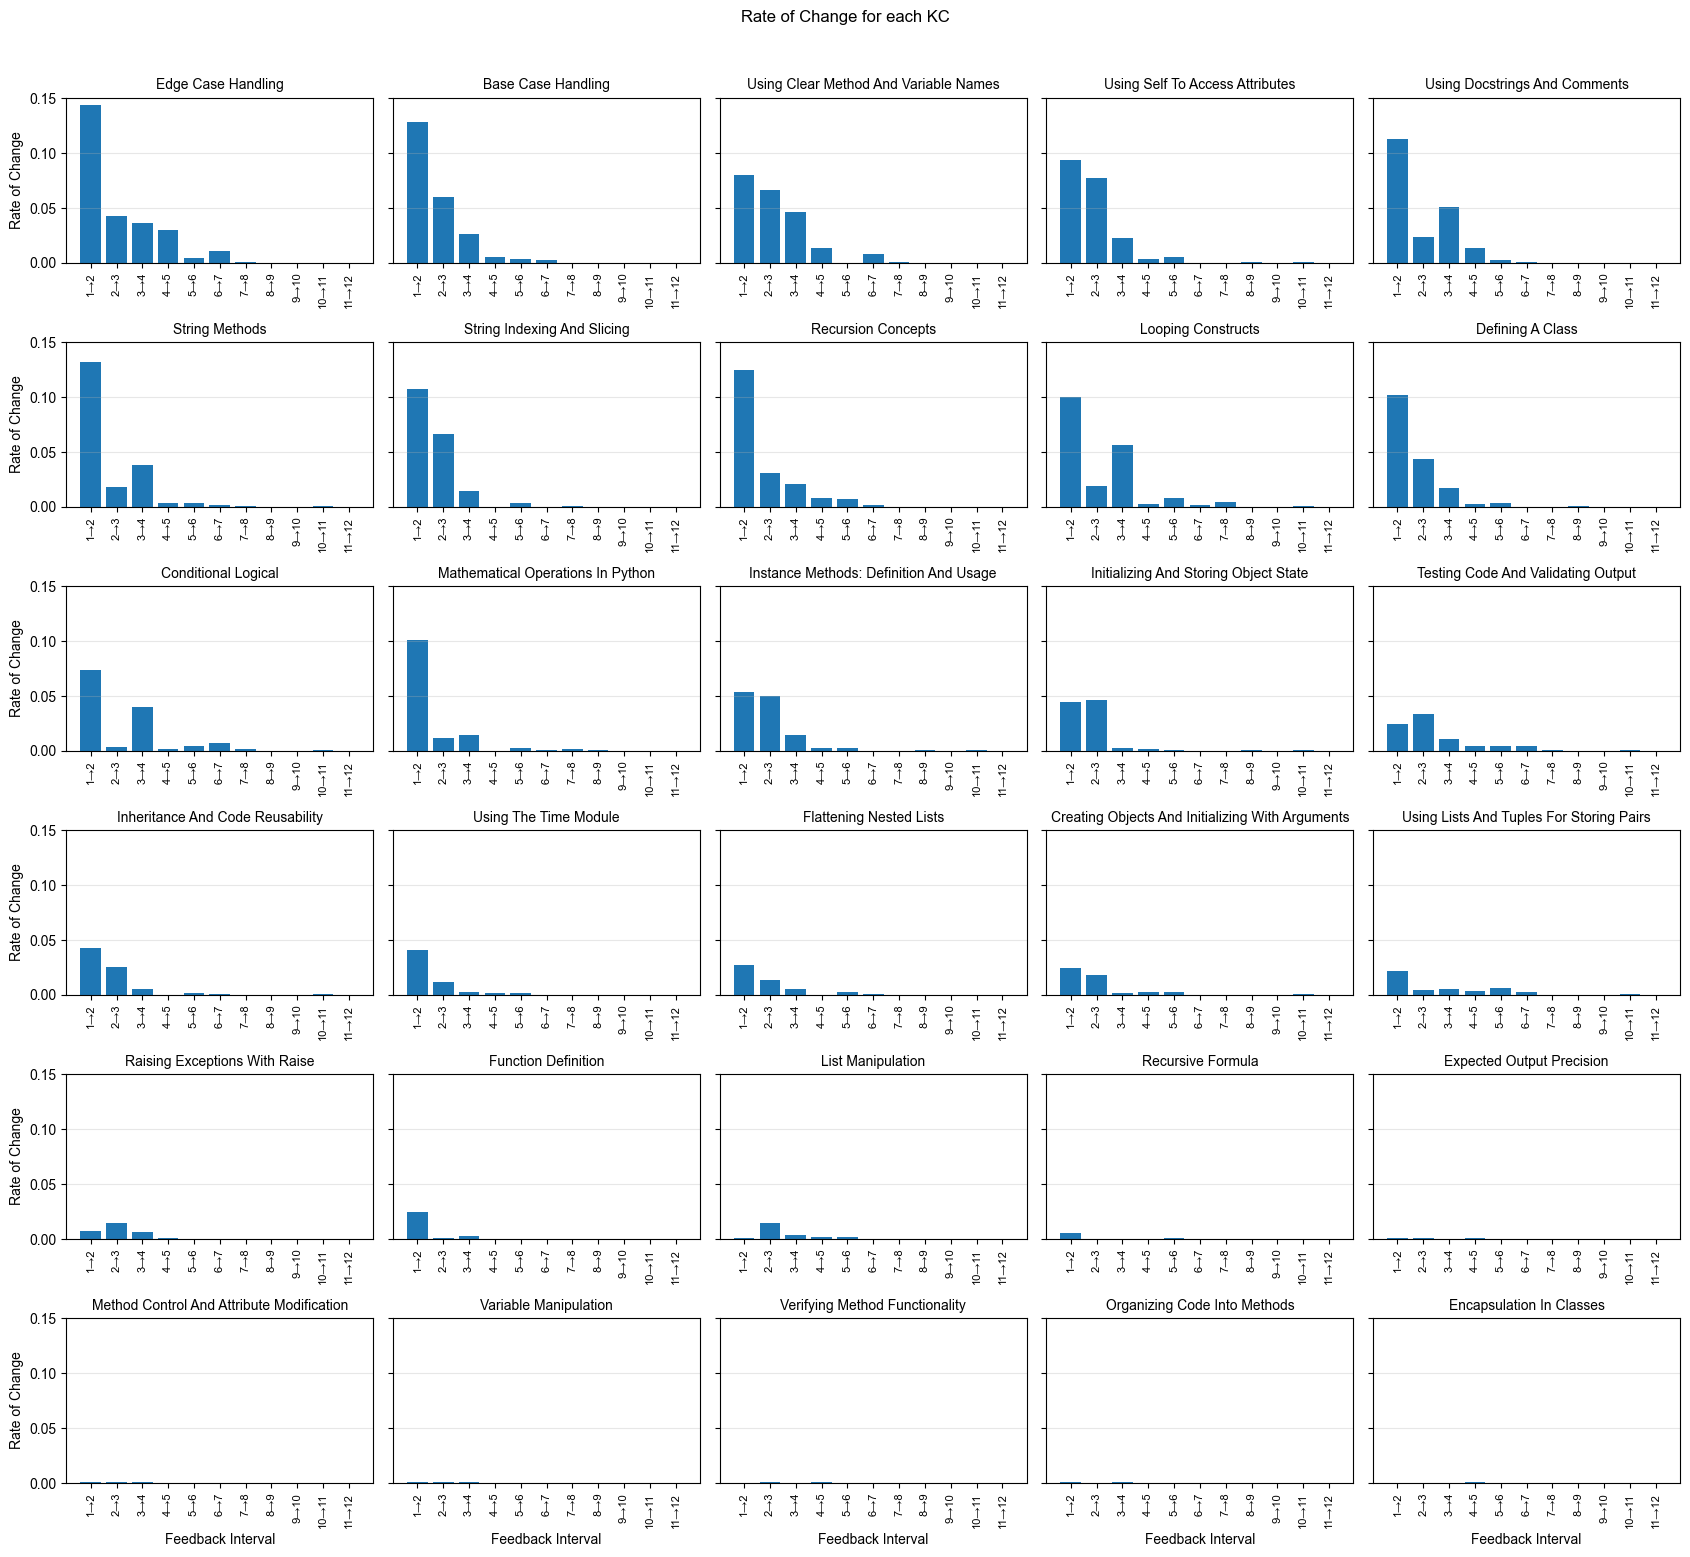

In [157]:
# subplots figure
fig, axes = bar_subplots_kc_gradients(
    grad_abs_df,
    cols=5,                 
    sharey=True,            
    order="sum",            
    annotate=False,        
    xtick_every=1,         
    suptitle="Rate of Change for each KC"
)

plt.show()

#fig.savefig("kc_gradients_subplots.png", dpi=300, bbox_inches="tight")

In [158]:
import pandas as pd
import numpy as np

EXERCISE_COL = "Exercise ID"
FB_COL       = "Feedback #"
STUDENT_COL  = "Student ID"
ERROR_COL    = "Error Label"
KC_COL       = "KC Label"

EXERCISE_ORDER = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

EXERCISE_MAP = {ex: f"E{i+1}" for i, ex in enumerate(EXERCISE_ORDER)}
EXERCISE_MAP_REV = {v: k for k, v in EXERCISE_MAP.items()}  

ERROR_LABELS = ["Syntax", "Logical", "Efficiency", "Understandability"]

TOTAL_BASES = {
    "Base Case Handling": 18,
    "Conditional Logical": 18,
    "Creating Objects And Initializing With Arguments": 18,
    "Defining A Class": 18,
    "Edge Case Handling": 18,
    "Encapsulation In Classes": 18,
    "Expected Output Precision": 18,
    "Flattening Nested Lists": 18,
    "Function Definition": 18,
    "Inheritance And Code Reusability": 18,
    "Initializing And Storing Object State": 18,
    "Instance Methods: Definition And Usage": 18,
    "List Manipulation": 18,
    "Looping Constructs": 18,
    "Mathematical Operations In Python": 18,
    "Method Control And Attribute Modification": 18,
    "Organizing Code Into Methods": 18,
    "Raising Exceptions With Raise": 18,
    "Recursion Concepts": 18,
    "Recursive Formula": 18,
    "String Indexing And Slicing": 18,
    "String Methods": 18,
    "Testing Code And Validating Output": 18,
    "Using Clear Method And Variable Names": 18,
    "Using Docstrings And Comments": 18,
    "Using Lists And Tuples For Storing Pairs": 18,
    "Using Self To Access Attributes": 18,
    "Using The Time Module": 18,
    "Variable Manipulation": 18,
    "Verifying Method Functionality": 18,
}
KC_CANON = list(TOTAL_BASES.keys())

# KC Mapping 
KC_MAPPING = {
    "Base Case Handling": "KC4",
    "Conditional Logical": "KC5",
    "Creating Objects And Initializing With Arguments": "KC18",
    "Defining A Class": "KC11",
    "Edge Case Handling": "KC1",
    "Encapsulation In Classes": "KC29",
    "Expected Output Precision": "KC27",
    "Flattening Nested Lists": "KC19",
    "Function Definition": "KC23",
    "Inheritance And Code Reusability": "KC17",
    "Initializing And Storing Object State": "KC15",
    "Instance Methods: Definition And Usage": "KC14",
    "List Manipulation": "KC21",
    "Looping Constructs": "KC3",
    "Mathematical Operations In Python": "KC13",
    "Method Control And Attribute Modification": "KC25",
    "Organizing Code Into Methods": "KC30",
    "Raising Exceptions With Raise": "KC22",
    "Recursion Concepts": "KC9",
    "Recursive Formula": "KC24",
    "String Indexing And Slicing": "KC12",
    "String Methods": "KC8",
    "Testing Code And Validating Output": "KC10",
    "Using Clear Method And Variable Names": "KC2",
    "Using Docstrings And Comments": "KC7",
    "Using Lists And Tuples For Storing Pairs": "KC16",
    "Using Self To Access Attributes": "KC6",
    "Using The Time Module": "KC20",
    "Variable Manipulation": "KC28",
    "Verifying Method Functionality": "KC26",
}
KC_MAP = KC_MAPPING
KC_MAP_REV = {v: k for k, v in KC_MAPPING.items()}
KC_LIST = list(KC_MAPPING.keys())

COUNT_BASE_PER_EX = 18.0
STUDENT_BASE      = 18.0

def _present_exercises(df: pd.DataFrame) -> list:
    if df.empty or EXERCISE_COL not in df.columns:
        return []
    present = [ex for ex in EXERCISE_ORDER if ex in set(df[EXERCISE_COL].unique())]
    if not present:
        present = sorted(df[EXERCISE_COL].dropna().unique().tolist())
    return present

def _safe_int_cast(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    if not cols:
        return df
    df[cols] = (
        df[cols]
          .replace([np.inf, -np.inf], np.nan)
          .fillna(0)
          .astype(int)
    )
    return df

def _clean_error_df(src: pd.DataFrame) -> pd.DataFrame:
    tmp = src.dropna(subset=[ERROR_COL]).copy()
    tmp[ERROR_COL] = tmp[ERROR_COL].astype(str).str.split(r"[,;/]")
    df = tmp.explode(ERROR_COL, ignore_index=True)

    df[ERROR_COL] = (
        df[ERROR_COL].astype(str)
          .str.replace('\u00A0', ' ', regex=False)
          .str.replace('\u200B', '',  regex=False)
          .str.strip()
          .str.replace(r"\s*[:;|]+\s*$", "", regex=True)
          .str.replace(r"\s+", " ", regex=True)
          .str.title()
    )

    NULL_TOKENS = {"", "Na", "N/A", "None", "Null", "-", "—"}
    df = df[~df[ERROR_COL].str.upper().isin({t.upper() for t in NULL_TOKENS})].copy()

    df = df[df[ERROR_COL].isin(ERROR_LABELS)].copy()

    df = df[df[STUDENT_COL].astype(str).str.strip() != "18"].copy()
    df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce").astype("Int64")
    df = df.dropna(subset=[FB_COL]).copy()
    df[FB_COL] = df[FB_COL].astype(int)
    return df

def _clean_kc_df(src: pd.DataFrame) -> pd.DataFrame:
    tmp = src.dropna(subset=[KC_COL]).copy()
    tmp[KC_COL] = tmp[KC_COL].astype(str).str.split(r"[,;/]")
    df = tmp.explode(KC_COL, ignore_index=True)

    df[KC_COL] = (
        df[KC_COL].astype(str)
          .str.replace('\u00A0', ' ', regex=False)
          .str.replace('\u200B', '',  regex=False)
          .str.strip()
          .str.replace(r"\s*[:;|]+\s*$", "", regex=True)
          .str.replace(r"\s+", " ", regex=True)
          .str.title()
    )

    NULL_TOKENS = {"", "Na", "N/A", "None", "Null", "-", "—"}
    df = df[~df[KC_COL].str.upper().isin({t.upper() for t in NULL_TOKENS})].copy()

    df = df[df[KC_COL].isin(KC_CANON)].copy()

    df = df[df[STUDENT_COL].astype(str).str.strip() != "18"].copy()
    df[FB_COL] = pd.to_numeric(df[FB_COL], errors="coerce").astype("Int64")
    df = df.dropna(subset=[FB_COL]).copy()
    df[FB_COL] = df[FB_COL].astype(int)
    return df

err_df = _clean_error_df(error_kc_grade_df)
kc_df  = _clean_kc_df(error_kc_grade_df)

present_err_ex = _present_exercises(err_df)
present_kc_ex  = _present_exercises(kc_df)

N_EXERCISES_ERR = max(1, len(present_err_ex))
N_EXERCISES_KC  = max(1, len(present_kc_ex))

COUNT_BASE_ALL_ERR = COUNT_BASE_PER_EX * N_EXERCISES_ERR
COUNT_BASE_ALL_KC  = COUNT_BASE_PER_EX * N_EXERCISES_KC

err_counts = (
    err_df.groupby([FB_COL, ERROR_COL]).size()
          .unstack(ERROR_COL)
          .reindex(columns=ERROR_LABELS, fill_value=0)
          .reindex(range(1, 13), fill_value=0)
)
err_counts.columns = [f"Error Label ({lab})" for lab in ERROR_LABELS]

err_students_per = (
    err_df.groupby([FB_COL, ERROR_COL])[STUDENT_COL].nunique()
          .unstack(ERROR_COL)
          .reindex(columns=ERROR_LABELS, fill_value=0)
          .reindex(range(1, 13), fill_value=0)
)
err_students_per.columns = [f"Students with {lab} error" for lab in ERROR_LABELS]

err_total = err_counts.sum(axis=1).rename("number of total errors")

err_any = (
    err_df[[FB_COL, STUDENT_COL]].drop_duplicates()
         .groupby(FB_COL).size()
         .reindex(range(1, 13), fill_value=0)
         .rename("Students with any error")
)

error_summary_all = (
    pd.concat([err_counts, err_students_per, err_total, err_any], axis=1)
      .reset_index().rename(columns={FB_COL: "Feedback #"})
)

for lab in ERROR_LABELS:
    c = f"Error Label ({lab})"
    s = f"Students with {lab} error"
    r = f"Error Rate ({lab})"
    error_summary_all[r] = (
        (error_summary_all[c] / COUNT_BASE_ALL_ERR) *
        (error_summary_all[s] / STUDENT_BASE)
    ).fillna(0.0)

int_cols_err = [c for c in error_summary_all.columns
                if c.startswith(("Error Label (", "Students with", "number of"))
                and "Rate" not in c]
error_summary_all = _safe_int_cast(error_summary_all, int_cols_err)

kc_counts = (
    kc_df.groupby([FB_COL, KC_COL]).size()
         .unstack(KC_COL)
         .reindex(columns=KC_LIST, fill_value=0)
         .reindex(range(1, 13), fill_value=0)
)
kc_counts.columns = [f"KC Count ({KC_MAP[kc]})" for kc in KC_LIST]

kc_students_per = (
    kc_df.groupby([FB_COL, KC_COL])[STUDENT_COL].nunique()
         .unstack(KC_COL)
         .reindex(columns=KC_LIST, fill_value=0)
         .reindex(range(1, 13), fill_value=0)
)
kc_students_per.columns = [f"Students with {KC_MAP[kc]} KC" for kc in KC_LIST]

kc_total = kc_counts.sum(axis=1).rename("number of total KCs")

kc_any = (
    kc_df[[FB_COL, STUDENT_COL]].drop_duplicates()
         .groupby(FB_COL).size()
         .reindex(range(1, 13), fill_value=0)
         .rename("Students with any KC")
)

kc_summary_all = (
    pd.concat([kc_counts, kc_students_per, kc_total, kc_any], axis=1)
      .reset_index().rename(columns={FB_COL: "Feedback #"})
)

for kc in KC_LIST:
    c = f"KC Count ({KC_MAP[kc]})"
    s = f"Students with {KC_MAP[kc]} KC"
    r = f"KC Rate ({KC_MAP[kc]})"
    kc_summary_all[r] = (
        (kc_summary_all[c] / COUNT_BASE_ALL_KC) *
        (kc_summary_all[s] / STUDENT_BASE)
    ).fillna(0.0)

int_cols_kc = [c for c in kc_summary_all.columns
               if c.startswith(("KC Count (", "Students with", "number of"))
               and "Rate" not in c]
kc_summary_all = _safe_int_cast(kc_summary_all, int_cols_kc)


full_summary_all = pd.merge(
    kc_summary_all, error_summary_all,
    on="Feedback #", how="outer", validate="one_to_one",
    suffixes=("_KC", "_ERR")
).sort_values("Feedback #").reset_index(drop=True)

num_cols_full = full_summary_all.select_dtypes(include="number").columns
full_summary_all[num_cols_full] = (
    full_summary_all[num_cols_full]
      .replace([np.inf, -np.inf], np.nan)
      .fillna(0)
)

int_like_cols_full = [c for c in full_summary_all.columns
                      if c.startswith(("KC Count (", "Error Label (", "Students with", "number of"))
                      and "Rate" not in c]
full_summary_all = _safe_int_cast(full_summary_all, int_like_cols_full)


In [159]:
full_summary_all

Feedback #  KC Count (KC4)  KC Count (KC5)  KC Count (KC18)  \
0            1              39              26               13   
1            2              24              16                9   
2            3              14              15                5   
3            4               7               8                4   
4            5               5               7                3   
5            6               3               6                1   
6            7               1               3                1   
7            8               1               2                1   
8            9               1               2                1   
9           10               1               2                1   
10          11               1               1                0   
11          12               1               1                0   

    KC Count (KC11)  KC Count (KC1)  KC Count (KC29)  KC Count (KC27)  \
0                33              46                1                1   
1                18              28                1                2   
2                10              20                1                1   
3                 5              15                1                1   
4                 4               8                0                0   
5                 1               6                0                0   
6                 1               2                0                0   
7                 1               1                0                0   
8                 0               1                0                0   
9                 0               1                0                0   
10                0               1                0                0   
11                0               1                0                0   

    KC Count (KC19)  KC Count (KC23)  ...  Students with Syntax error  \
0                12               13  ...                          18   
1                 8                3  ...                          18   
2                 5                4  ...                          14   
3                 3                0  ...                          11   
4                 3                0  ...                           9   
5                 1                0  ...                           6   
6                 0                0  ...                           5   
7                 0                0  ...                           3   
8                 0                0  ...                           2   
9                 0                0  ...                           2   
10                0                0  ...                           1   
11                0                0  ...                           1   

    Students with Logical error  Students with Efficiency error  \
0                            18                              13   
1                            17                              14   
2                            14                              13   
3                             9                               8   
4                             8                               8   
5                             7                               4   
6                             4                               1   
7                             3                               2   
8                             2                               2   
9                             2                               2   
10                            1                               0   
11                            1                               0   

    Students with Understandability error  number of total errors  \
0                                      18                     312   
1                                      16                     192   
2                                      15                     123   
3                                      10                      63   
4              

In [160]:
error_kc_df = pd.read_csv("full_summary_all_error_kc_with_mapping.csv")
error_kc_df

Unnamed: 0  Feedback #  KC Count (KC4)  KC Count (KC5)  KC Count (KC18)  \
0            0           1              39              26               13   
1            1           2              24              16                9   
2            2           3              14              15                5   
3            3           4               7               8                4   
4            4           5               5               7                3   
5            5           6               3               6                1   
6            6           7               1               3                1   
7            7           8               1               2                1   
8            8           9               1               2                1   
9            9          10               1               2                1   
10          10          11               1               1                0   
11          11          12               1               1                0   

    KC Count (KC11)  KC Count (KC1)  KC Count (KC29)  KC Count (KC27)  \
0                33              46                1                1   
1                18              28                1                2   
2                10              20                1                1   
3                 5              15                1                1   
4                 4               8                0                0   
5                 1               6                0                0   
6                 1               2                0                0   
7                 1               1                0                0   
8                 0               1                0                0   
9                 0               1                0                0   
10                0               1                0                0   
11                0               1                0                0   

    KC Count (KC19)  ...  Students with Syntax error  \
0                12  ...                          18   
1                 8  ...                          18   
2                 5  ...                          14   
3                 3  ...                          11   
4                 3  ...                           9   
5                 1  ...                           6   
6                 0  ...                           5   
7                 0  ...                           3   
8                 0  ...                           2   
9                 0  ...                           2   
10                0  ...                           1   
11                0  ...                           1   

    Students with Logical error  Students with Efficiency error  \
0                            18                              13   
1                            17                              14   
2                            14                              13   
3                             9                               8   
4                             8                               8   
5                             7                               4   
6                             4                               1   
7                             3                               2   
8                             2                               2   
9                             2                               2   
10                            1                               0   
11                            1                               0   

    Students with Understandability error  number of total errors  \
0                                      18                     312   
1                                      16                     192   
2                                      15                     123   
3                                      10                      63   
4                                       8                      52   
5          

In [161]:
error_kc_df = error_kc_df.drop(['Unnamed: 0'], axis=1)
error_kc_df

Feedback #  KC Count (KC4)  KC Count (KC5)  KC Count (KC18)  \
0            1              39              26               13   
1            2              24              16                9   
2            3              14              15                5   
3            4               7               8                4   
4            5               5               7                3   
5            6               3               6                1   
6            7               1               3                1   
7            8               1               2                1   
8            9               1               2                1   
9           10               1               2                1   
10          11               1               1                0   
11          12               1               1                0   

    KC Count (KC11)  KC Count (KC1)  KC Count (KC29)  KC Count (KC27)  \
0                33              46                1                1   
1                18              28                1                2   
2                10              20                1                1   
3                 5              15                1                1   
4                 4               8                0                0   
5                 1               6                0                0   
6                 1               2                0                0   
7                 1               1                0                0   
8                 0               1                0                0   
9                 0               1                0                0   
10                0               1                0                0   
11                0               1                0                0   

    KC Count (KC19)  KC Count (KC23)  ...  Students with Syntax error  \
0                12               13  ...                          18   
1                 8                3  ...                          18   
2                 5                4  ...                          14   
3                 3                0  ...                          11   
4                 3                0  ...                           9   
5                 1                0  ...                           6   
6                 0                0  ...                           5   
7                 0                0  ...                           3   
8                 0                0  ...                           2   
9                 0                0  ...                           2   
10                0                0  ...                           1   
11                0                0  ...                           1   

    Students with Logical error  Students with Efficiency error  \
0                            18                              13   
1                            17                              14   
2                            14                              13   
3                             9                               8   
4                             8                               8   
5                             7                               4   
6                             4                               1   
7                             3                               2   
8                             2                               2   
9                             2                               2   
10                            1                               0   
11                            1                               0   

    Students with Understandability error  number of total errors  \
0                                      18                     312   
1                                      16                     192   
2                                      15                     123   
3                                      10                      63   
4              

In [162]:
import pandas as pd
import numpy as np
import re

def kc_gradients_per_interval(error_kc_df, x_col="Feedback #"):
    work = error_kc_df.copy()
    work[x_col] = pd.to_numeric(work[x_col], errors="coerce")
    work = work.dropna(subset=[x_col]).sort_values(x_col)

    kc_cols = [c for c in work.columns if c.startswith("KC Rate (")]

    dy = work[kc_cols].diff()
    dx = work[x_col].diff()
    slopes = dy.div(dx, axis=0).iloc[1:].copy()

    # Label rows as intervals 
    x_vals = work[x_col].to_numpy()
    slopes.index = pd.Index([f"{int(x_vals[i-1])}→{int(x_vals[i])}" for i in range(1, len(x_vals))],
                            name="Interval")

    def rename_col(c):
        m = re.match(r"KC Rate \((.+)\)", c)
        return f"Grad ({m.group(1)})" if m else f"Grad {c}"

    slopes = slopes.rename(columns={c: rename_col(c) for c in kc_cols})
    return slopes

# grad_df = kc_gradients_per_interval(error_kc_df)
# print(grad_df.head())


In [163]:
grad_df

Grad (Base Case Handling)  Grad (Conditional Logical)  \
Interval                                                          
1→2                       -0.128601                   -0.073388   
2→3                       -0.060357                   -0.003772   
3→4                       -0.026406                   -0.040123   
4→5                       -0.005144                   -0.002058   
5→6                       -0.003772                   -0.004115   
6→7                       -0.002743                   -0.007202   
7→8                        0.000000                   -0.001715   
8→9                        0.000000                    0.000000   
9→10                       0.000000                    0.000000   
10→11                      0.000000                   -0.001029   
11→12                      0.000000                    0.000000   

          Grad (Creating Objects And Initializing With Arguments)  \
Interval                                                            
1→2                                               -0.024348         
2→3                                               -0.017833         
3→4                                               -0.001372         
4→5                                               -0.002401         
5→6                                               -0.002743         
6→7                                                0.000000         
7→8                                                0.000000         
8→9                                                0.000000         
9→10                                               0.000000         
10→11                                             -0.000343         
11→12                                              0.000000         

          Grad (Defining A Class)  Grad (Edge Case Handling)  \
Interval                                                       
1→2                     -0.101852                  -0.143347   
2→3                     -0.043896                  -0.042524   
3→4                     -0.017147                  -0.036008   
4→5                     -0.002743                  -0.029835   
5→6                     -0.003772                  -0.004115   
6→7                      0.000000                  -0.010974   
7→8                      0.000000                  -0.001029   
8→9                     -0.000343                   0.000000   
9→10                     0.000000                   0.000000   
10→11                    0.000000                   0.000000   
11→12                    0.000000                   0.000000   

          Grad (Encapsulation In Classes)  Grad (Expected Output Precision)  \
Interval                                                                      
1→2                              0.000000                          0.001029   
2→3                              0.000000                         -0.001029   
3→4                              0.000000                          0.000000   
4→5                             -0.000343                         -0.000343   
5→6                              0.000000                          0.000000   
6→7                              0.000000                          0.000000   
7→8                              0.000000                          0.000000   
8→9                              0.000000                          0.000000   
9→10                             0.000000                          0.000000   
10→11                            0.000000                          0.000000   
11→12                            0.000000                          0.000000   

          Grad (Flattening Nested Lists)  Grad (Function Definition)  \
Interval                                                               
1→2                            -0.027435                   -0.024691   
2→3                            -0.013374                    0.000686   
3→4                            -0.005487                   -0.002743   
4→5                

In [164]:
import pandas as pd
import numpy as np
import re

def kc_gradients_per_interval_abs(error_kc_df, x_col="Feedback #"):
    work = error_kc_df.copy()
    work[x_col] = pd.to_numeric(work[x_col], errors="coerce")
    work = work.dropna(subset=[x_col]).sort_values(x_col)

    kc_cols = [c for c in work.columns if c.startswith("KC Rate (")]

    dy = work[kc_cols].diff()
    dx = work[x_col].diff()
    slopes = dy.div(dx, axis=0).iloc[1:].replace([np.inf, -np.inf], np.nan)

    slopes = slopes.abs()

    # label intervals
    x_vals = work[x_col].to_numpy()
    slopes.index = pd.Index([f"{int(x_vals[i-1])}→{int(x_vals[i])}" for i in range(1, len(x_vals))],
                            name="Interval")

    # rename columns
    def rename_col(c):
        m = re.match(r"KC Rate \((.+)\)", c)
        return f"Grad ({m.group(1)})" if m else f"Grad {c}"

    slopes = slopes.rename(columns={c: rename_col(c) for c in kc_cols})
    return slopes

grad_abs_df = kc_gradients_per_interval_abs(error_kc_df)


In [165]:
grad_abs_df

Grad (KC4)  Grad (KC5)  Grad (KC18)  Grad (KC11)  Grad (KC1)  \
Interval                                                                 
1→2         0.128601    0.073388     0.024348     0.101852    0.143347   
2→3         0.060357    0.003772     0.017833     0.043896    0.042524   
3→4         0.026406    0.040123     0.001372     0.017147    0.036008   
4→5         0.005144    0.002058     0.002401     0.002743    0.029835   
5→6         0.003772    0.004115     0.002743     0.003772    0.004115   
6→7         0.002743    0.007202     0.000000     0.000000    0.010974   
7→8         0.000000    0.001715     0.000000     0.000000    0.001029   
8→9         0.000000    0.000000     0.000000     0.000343    0.000000   
9→10        0.000000    0.000000     0.000000     0.000000    0.000000   
10→11       0.000000    0.001029     0.000343     0.000000    0.000000   
11→12       0.000000    0.000000     0.000000     0.000000    0.000000   

          Grad (KC29)  Grad (KC27)  Grad (KC19)  Grad (KC23)  Grad (KC17)  \
Interval                                                                    
1→2          0.000000     0.001029     0.027435     0.024691     0.042867   
2→3          0.000000     0.001029     0.013374     0.000686     0.025720   
3→4          0.000000     0.000000     0.005487     0.002743     0.005487   
4→5          0.000343     0.000343     0.000000     0.000000     0.000000   
5→6          0.000000     0.000000     0.002743     0.000000     0.001715   
6→7          0.000000     0.000000     0.000343     0.000000     0.001029   
7→8          0.000000     0.000000     0.000000     0.000000     0.000000   
8→9          0.000000     0.000000     0.000000     0.000000     0.000000   
9→10         0.000000     0.000000     0.000000     0.000000     0.000000   
10→11        0.000000     0.000000     0.000000     0.000000     0.000343   
11→12        0.000000     0.000000     0.000000     0.000000     0.000000   

          ...  Grad (KC12)  Grad (KC8)  Grad (KC10)  Grad (KC2)  Grad (KC7)  \
Interval  ...                                                                 
1→2       ...     0.107682    0.132373     0.024348    0.079561    0.112483   
2→3       ...     0.066187    0.017833     0.033951    0.066529    0.023663   
3→4       ...     0.014403    0.037723     0.010974    0.046296    0.050412   
4→5       ...     0.000000    0.003429     0.004115    0.013032    0.013374   
5→6       ...     0.003772    0.003772     0.004115    0.000000    0.002743   
6→7       ...     0.000000    0.001715     0.004115    0.008230    0.000343   
7→8       ...     0.000343    0.001029     0.001029    0.000343    0.000000   
8→9       ...     0.000000    0.000000     0.000000    0.000000    0.000000   
9→10      ...     0.000000    0.000000     0.000000    0.000000    0.000000   
10→11     ...     0.000000    0.000343     0.000343    0.000000    0.000000   
11→12     ...     0.000000    0.000000     0.000000    0.000000    0.000000   

          Grad (KC16)  Grad (KC6)  Grad (KC20)  Grad (KC28)  Grad (KC26)  
Interval                                                                  
1→2          0.021262    0.093621     0.041152     0.000686     0.000000  
2→3          0.004458    0.077503     0.011317     0.000343     0.001029  
3→4          0.005144    0.022634     0.002401     0.000343     0.000000  
4→5          0.003429    0.003429     0.001715     0.000000     0.000343  
5→6          0.006173    0.005487     0.001372     0.000000     0.000000  
6→7          0.002743    0.000000     0.000000     0.000000     0.000000  
7→8          0.000000    0.000000     0.000000     0.000000     0.000000  
8→9          0.000000    0.001029     0.000000     0.000000     0.000000  
9→10         0.000000    0.000000     0.000000     0.000000     0.000000  
10→11        0.001029    0.000343     0.000000     0.000000     0.000000  
11→12        0.000000    0.000000     0.000000     0.000000     0.000000  

[11 rows x 30 columns]

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["font.family"] = "Arial"

def bar_subplots_kc_gradients(
    grad_df,
    cols=5,                 
    sharey=True,            
    order="alpha",          
    annotate=False,         
    xtick_every=1,          
    suptitle="KC Gradient (abs) by Feedback Interval",
    figsize=None
):
    
    grad_cols = [c for c in grad_df.columns if c.startswith("Grad (")]
    if not grad_cols:
        raise ValueError("No 'Grad (...)' columns found in grad_df.")

    data = grad_df[grad_cols].copy()

    if order == "sum":
        grad_cols = list(data.sum().sort_values(ascending=False).index)
    elif order == "max":
        grad_cols = list(data.max().sort_values(ascending=False).index)
    else: 
        grad_cols = sorted(grad_cols)

    data = data[grad_cols]

    n = len(grad_cols)
    rows = int(np.ceil(n / cols))

    if figsize is None:
        figsize = (cols * 3.4, rows * 2.6)

    fig, axes = plt.subplots(rows, cols, figsize=figsize, sharey=sharey)
    axes = np.array(axes).reshape(rows, cols)

    intervals = data.index.astype(str).tolist()
    x = np.arange(len(intervals))

    if sharey:
        ymax = float(np.nanmax(data.values)) if data.size else 1.0

    for i, col in enumerate(grad_cols):
        r, c = divmod(i, cols)
        ax = axes[r, c]
        y = data[col].values

        ax.bar(x, y)
        ax.set_title(col.replace("Grad (", "").rstrip(")"), fontsize=12, fontweight="bold")
        ax.grid(True, axis="y", alpha=0.3)

        ax.set_xticks(x)
        shown_labels = [lbl if (k % xtick_every == 0) else "" for k, lbl in enumerate(intervals)]
        ax.set_xticklabels(shown_labels, rotation=90, fontsize=10)

        if sharey:
            ax.set_ylim(0, ymax * 1.05)

        if c == 0:
            ax.set_ylabel("Rate of Change", fontsize=12)
        if r == rows - 1:
            ax.set_xlabel("Feedback Interval", fontsize=12)

        if annotate:
            for xi, yi in zip(x, y):
                if np.isfinite(yi) and yi != 0:
                    ax.text(xi, yi, f"{yi:.2f}", ha="center", va="bottom", fontsize=10)

    for j in range(n, rows * cols):
        r, c = divmod(j, cols)
        axes[r, c].axis("off")

    fig.suptitle(suptitle, y=0.995)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    return fig, axes


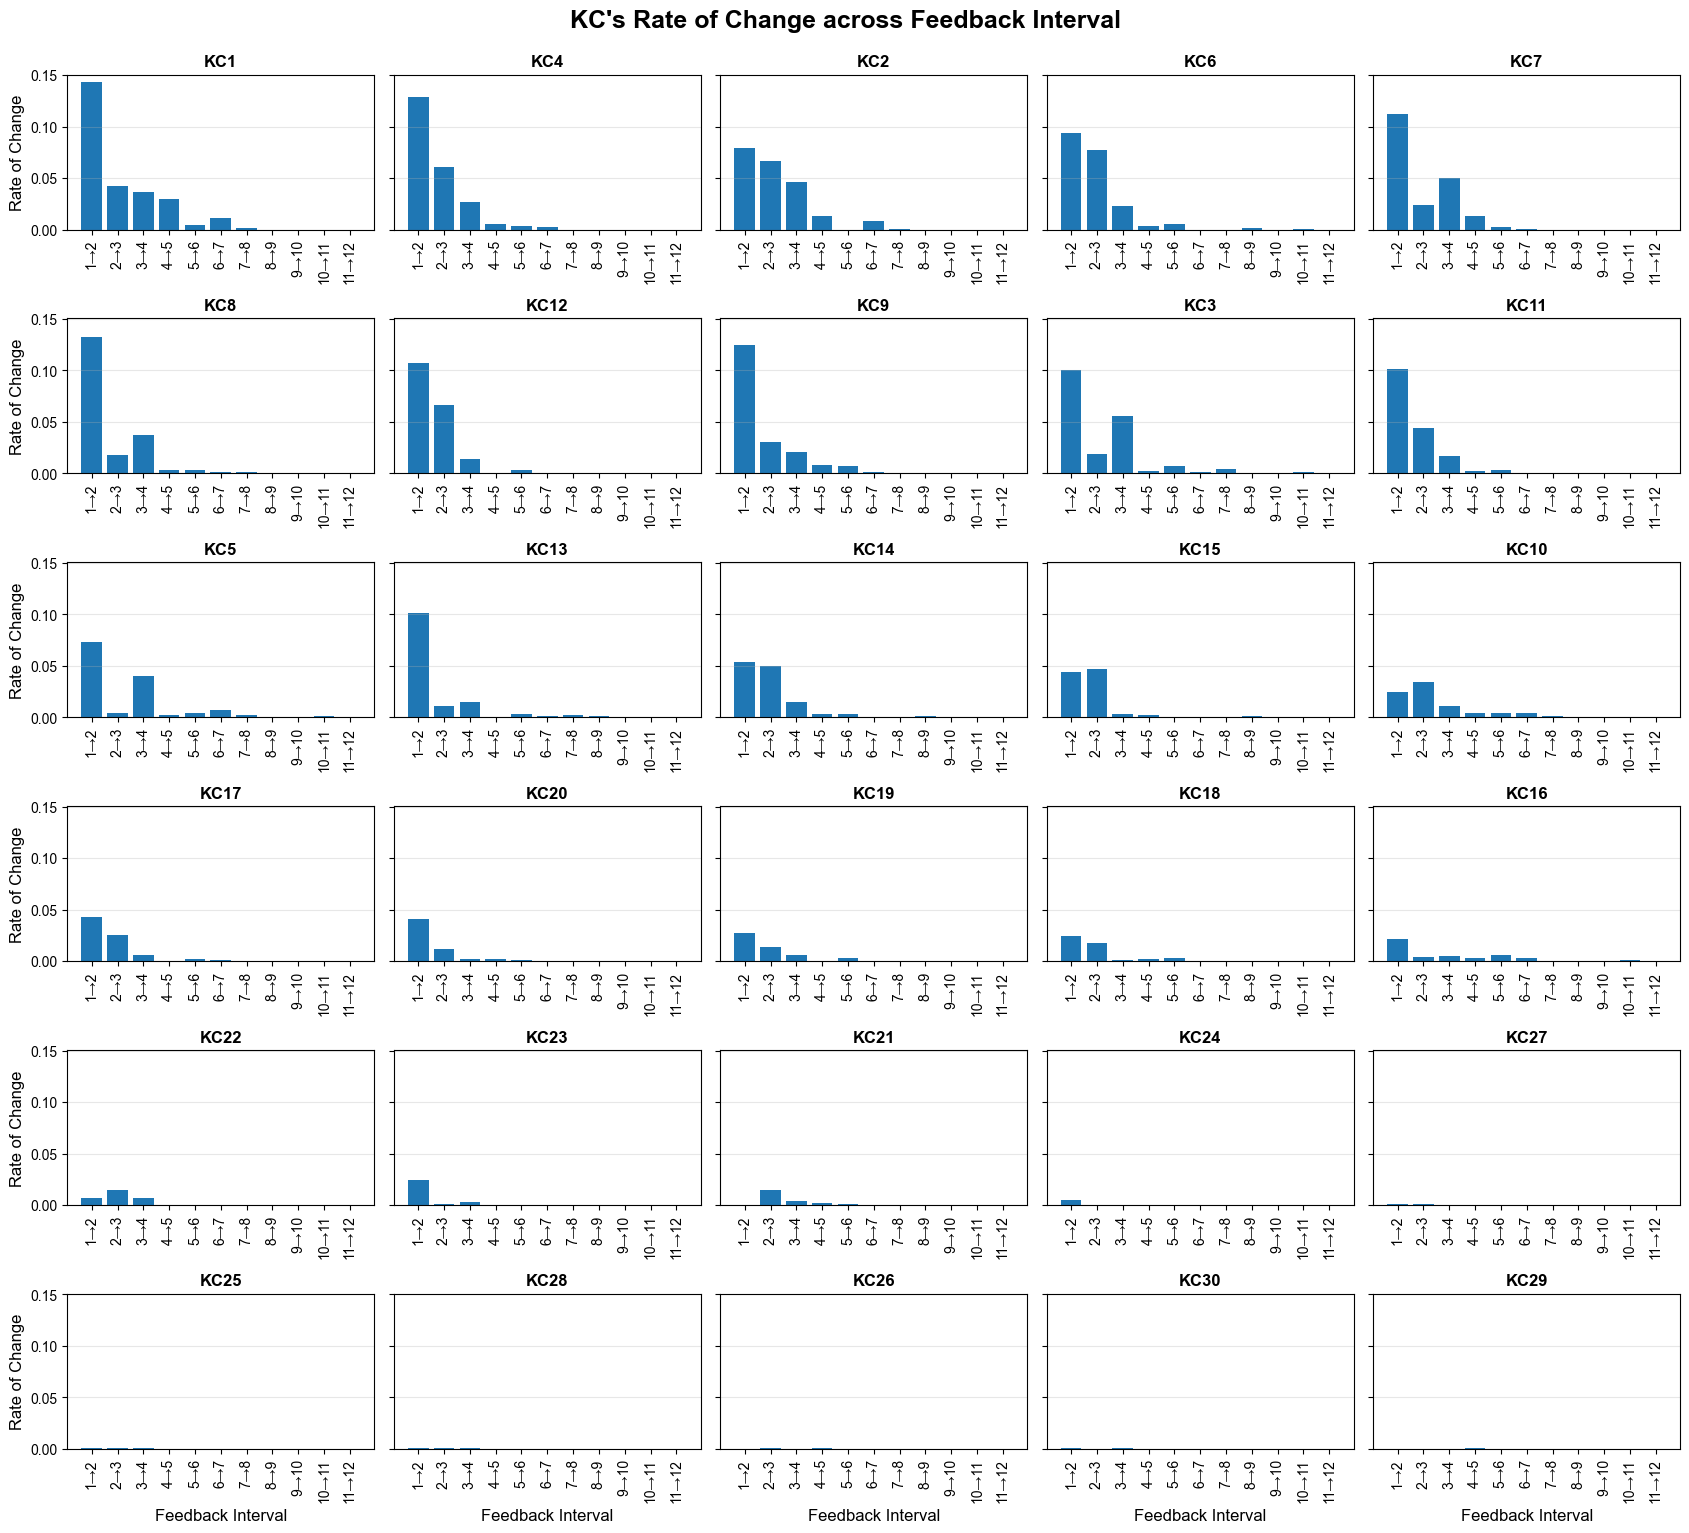

In [167]:
# subplots figure
fig, axes = bar_subplots_kc_gradients(
    grad_abs_df,
    cols=5,                 
    sharey=True,            
    order="sum",           
    annotate=False,        
    xtick_every=1
)

fig.suptitle("KC's Rate of Change across Feedback Interval", fontsize=18, fontweight="bold")
plt.show()

#fig.savefig("kc_gradients_subplots.png", dpi=300, bbox_inches="tight")

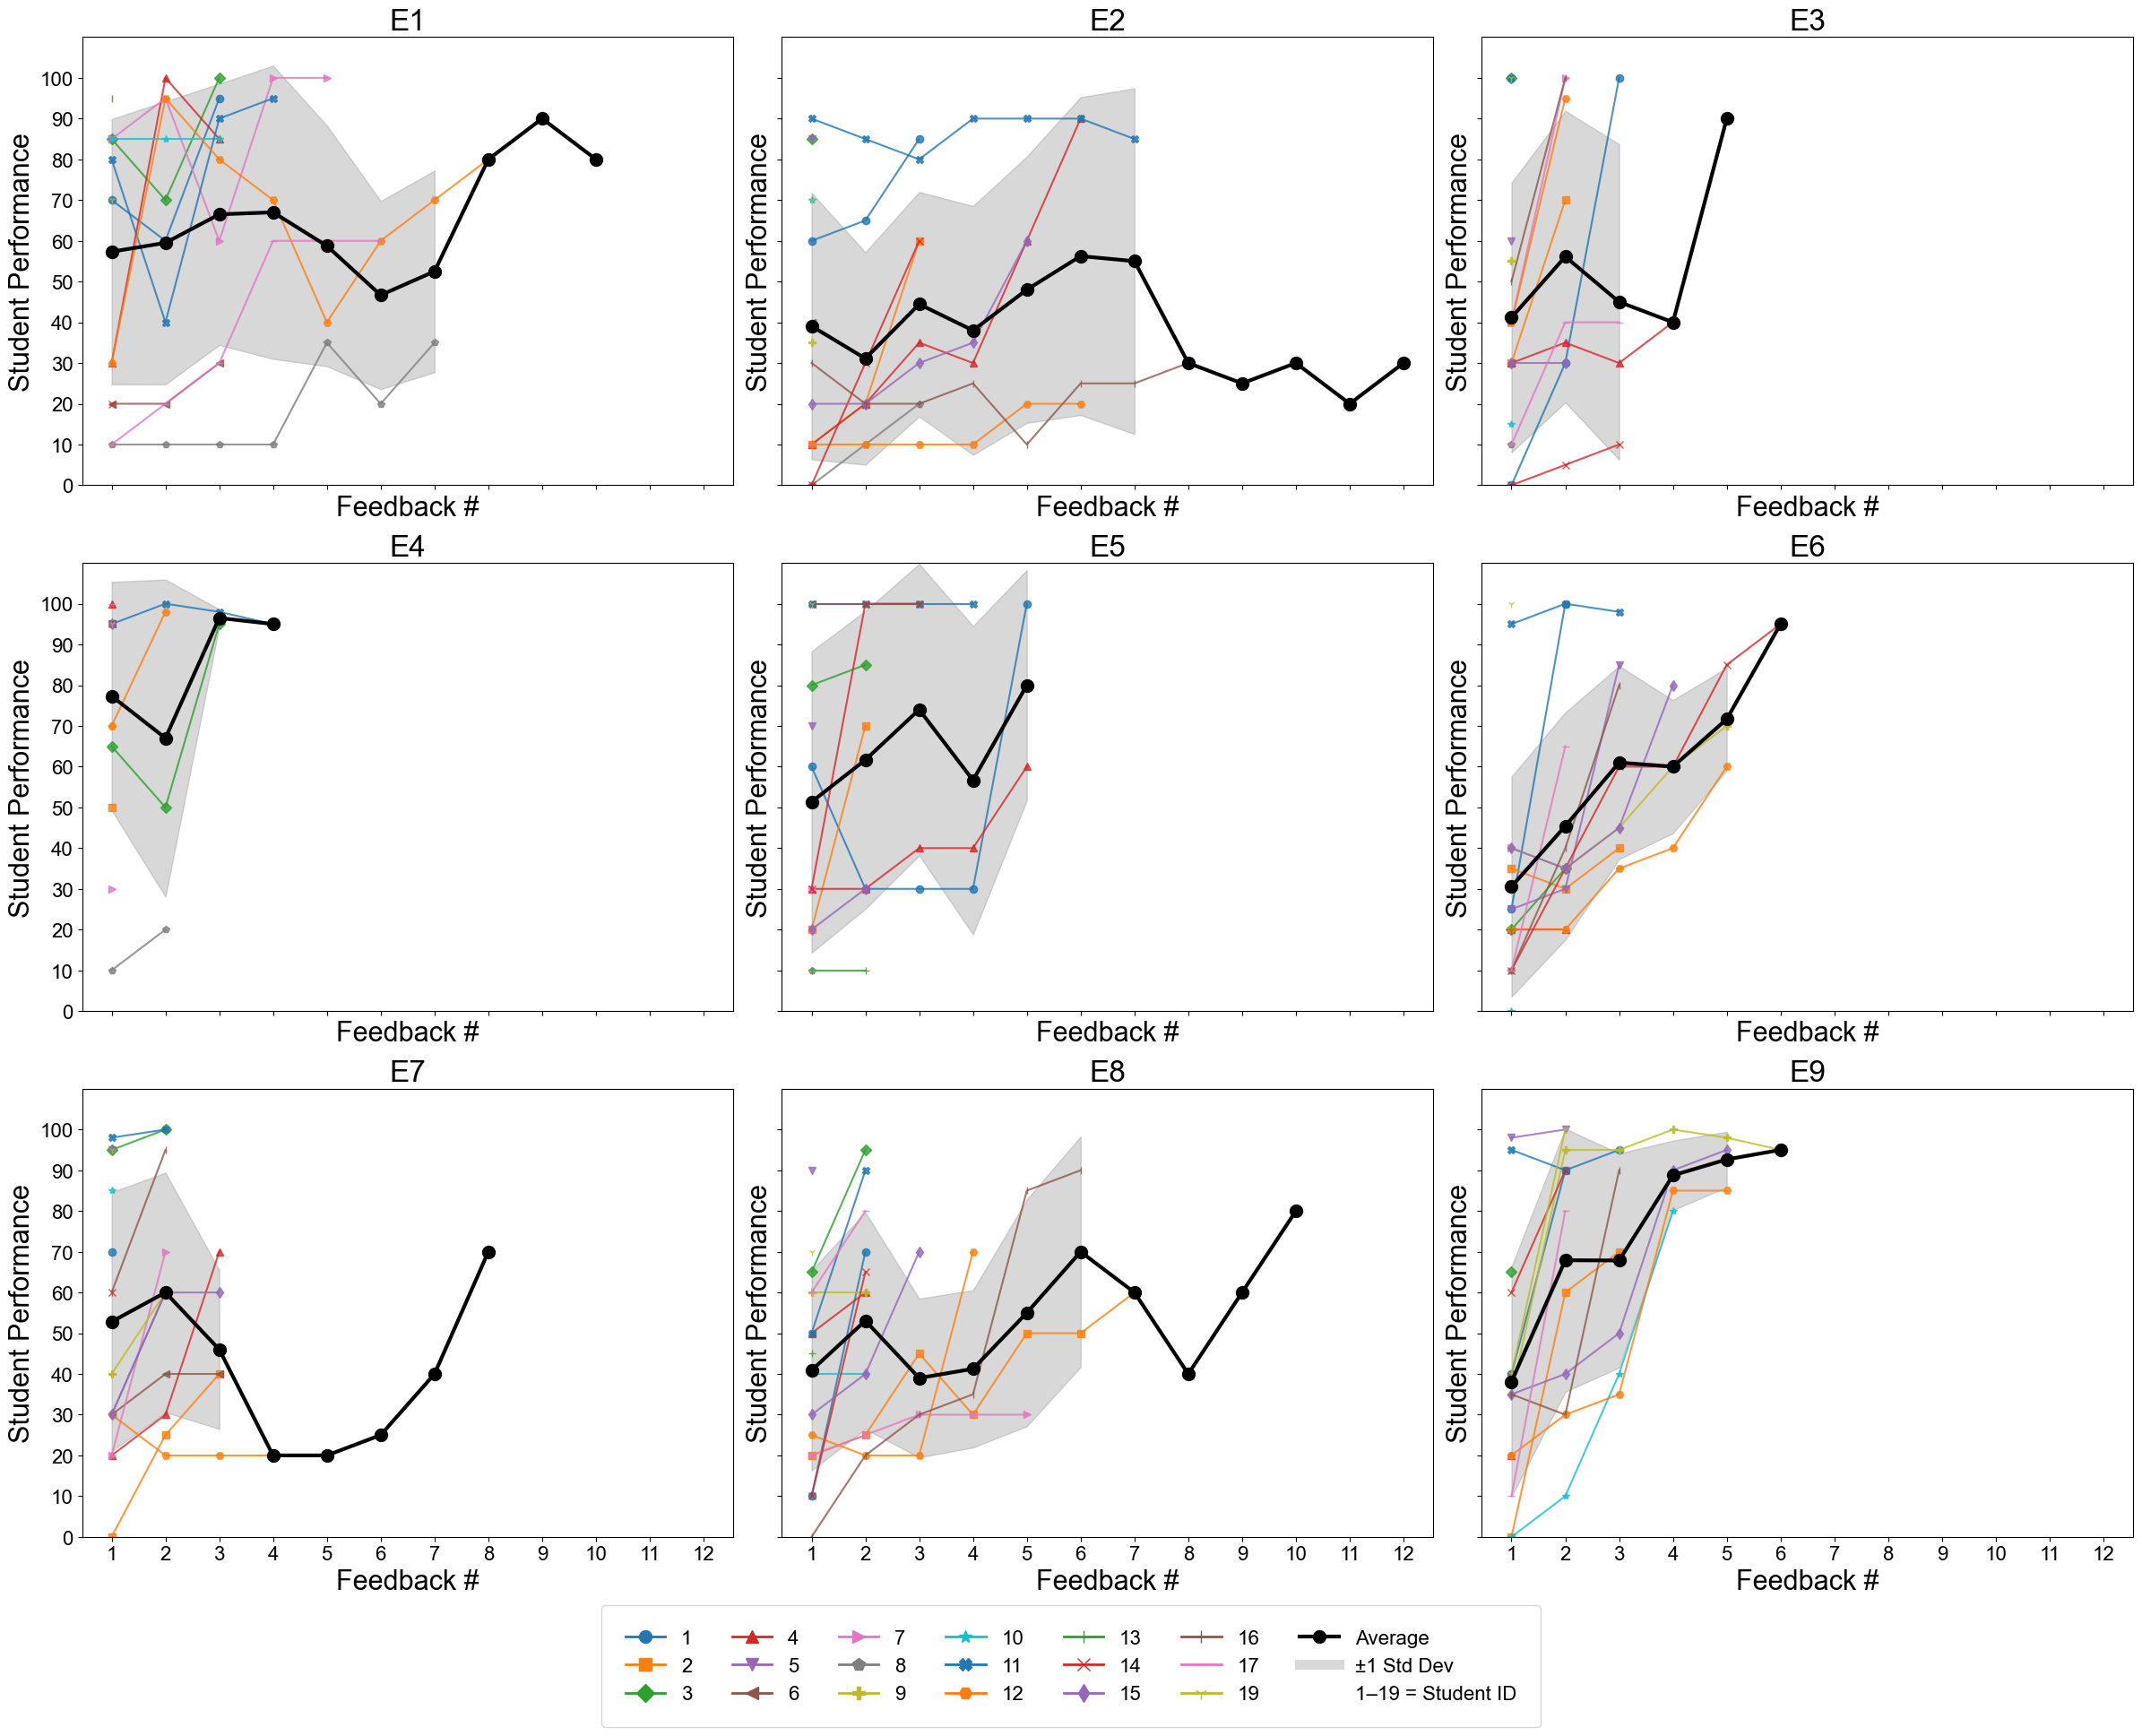

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from matplotlib import rcParams

# Load dataset
performance_df = pd.read_csv("./performance_df.csv")

rcParams['font.family'] = 'Arial'
df = performance_df.copy()
df = df.sort_values(by=["Student", "Feedback #"])

df["Student"] = df["Student"].str.replace("Student_", "").astype(int)

exercise_order = [586, 683, 760, 434, 568, 547, 2171, 1949, 2135]

exercise_mapping = {
    586: "E1",
    683: "E2",
    760: "E3",
    434: "E4",
    568: "E5",
    547: "E6",
    2171: "E7",
    1949: "E8",
    2135: "E9",
}

all_students = list(range(1, 20))   
colors = sns.color_palette("tab10", len(all_students))
markers = ["o", "s", "D", "^", "v", "<", ">", "p", "P", "*", "X", "H", "+", "x", "d", "|", "_", ".", "1"]

color_map = dict(zip(all_students, colors))
marker_map = dict(zip(all_students, markers))

fig, axes = plt.subplots(3, 3, figsize=(24, 18), sharex=True, sharey=True)
axes = axes.flatten()


for i, ex_id in enumerate(exercise_order):
    ax = axes[i]
    df_ex = df[df["Exercise"] == ex_id]

    # per students
    for student in all_students:
        df_stu = df_ex[df_ex["Student"] == student]
        if not df_stu.empty:
            ax.plot(
                df_stu["Feedback #"],
                df_stu["Grade"],
                label=str(student),   
                color=color_map[student],
                marker=marker_map[student],
                markersize=6,
                linewidth=1.5,
                alpha=0.8
            )

    df_group = (
        df_ex.groupby("Feedback #")["Grade"]
        .agg(["mean", "std"])
        .reset_index()
    )

    # avg line
    ax.plot(
        df_group["Feedback #"],
        df_group["mean"],
        color="black",
        linewidth=3,
        marker="o",
        markersize=10,
        label="Average"
    )

    ax.fill_between(
        df_group["Feedback #"],
        df_group["mean"] - df_group["std"],
        df_group["mean"] + df_group["std"],
        color="gray",
        alpha=0.3,
        label="±1 Std Dev"
    )

    
    ex_label = exercise_mapping.get(ex_id, f"Exercise {ex_id}")  
    ax.set_title(f"{ex_label}", fontsize=24)
    ax.set_xlabel("Feedback #", fontsize=22)
    ax.set_ylabel("Student Performance", fontsize=22)
    ax.set_xticks(range(1, 13))
    ax.set_ylim(0, 110)
    ax.set_yticks(range(0, 101, 10))
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)


students_with_data = df["Student"].unique()
student_handles = [
    Line2D([0], [0], color=color_map[s], marker=marker_map[s], linewidth=2, markersize=10, label=str(s))
    for s in all_students if s in students_with_data
]

avg_handle = Line2D([0], [0], color="black", marker="o", linewidth=3, markersize=10, label="Average")
std_handle = Line2D([0], [0], color="gray", linewidth=8, alpha=0.3, label="±1 Std Dev")

from matplotlib.lines import Line2D

note_handle = Line2D([], [], color="none", label="1-19 = Student ID")

fig.legend(
    handles=student_handles + [avg_handle, std_handle, note_handle],
    labels=[str(s) for s in all_students if s in students_with_data] + ["Average", "±1 Std Dev", "1-19 = Student ID"],
    loc='lower center',
    ncol=7,
    fontsize=16,
    frameon=True,
    fancybox=True,
    borderpad=1.2,
    bbox_to_anchor=(0.5, -0.08)
)

plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()
